In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

pd.set_option('display.max_rows', 300) # specifies number of rows to show
pd.options.display.float_format = '{:40,.4f}'.format # specifies default number format to 4 decimal places
plt.style.use('ggplot') # specifies that graphs should use ggplot styling
%matplotlib inline

## Data Cleaning and Sorting

In [2]:
cd = pd.read_csv('phe_cases_london_boroughs.csv')

In [3]:
ap = pd.read_csv('UK House price index Average Price.csv')

In [4]:
ip = pd.read_csv('UK House price index Index Price.csv')

In [5]:
sv = pd.read_csv('UK House price index Sales Volume.csv')
sv['Hackney and City of London']=sv['City of London']+sv['Hackney']

In [6]:
bt = pd.read_csv('Housing Data by Type.csv')

In [7]:
pp = pd.read_csv('London Population by Boroughs.csv')

In [8]:
ed = pd.read_csv('GCSE Score.csv')

In [9]:
gs = pd.read_csv('Green Space.csv')

### COVID-19 Data

In [10]:
cd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27584 entries, 0 to 27583
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   area_name    27584 non-null  object
 1   area_code    27584 non-null  object
 2   date         27584 non-null  object
 3   new_cases    27584 non-null  int64 
 4   total_cases  27584 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 1.1+ MB


In [11]:
cd.head()

,area_name,area_code,date,new_cases,total_cases
0,Barking and Dagenham,E09000002,2020/2/3,0,0
1,Barnet,E09000003,2020/2/3,0,0
2,Bexley,E09000004,2020/2/3,0,0
3,Brent,E09000005,2020/2/3,0,0
4,Bromley,E09000006,2020/2/3,0,0


In [12]:
cd2=cd[cd.area_code=='E09000002']

cd2["Barking_and_Dagenham_new_cases"] = cd2["new_cases"]
cd2["Barking_and_Dagenham_total_cases"] = cd2["total_cases"]
cd2.drop('new_cases', inplace=True, axis=1)
cd2.drop('total_cases', inplace=True, axis=1)
cd2.drop('area_code', inplace=True, axis=1)
cd2.drop('area_name', inplace=True, axis=1)

cd3=cd[cd.area_code=='E09000003']

cd3["Barnet_new_cases"] = cd3["new_cases"]
cd3["Barnet_total_cases"] = cd3["total_cases"]
cd3.drop('new_cases', inplace=True, axis=1)
cd3.drop('total_cases', inplace=True, axis=1)
cd3.drop('area_code', inplace=True, axis=1)
cd3.drop('area_name', inplace=True, axis=1)

cd4=cd[cd.area_code=='E09000004']

cd4["Bexley_new_cases"] = cd4["new_cases"]
cd4["Bexley_total_cases"] = cd4["total_cases"]
cd4.drop('new_cases', inplace=True, axis=1)
cd4.drop('total_cases', inplace=True, axis=1)
cd4.drop('area_code', inplace=True, axis=1)
cd4.drop('area_name', inplace=True, axis=1)

cd5=cd[cd.area_code=='E09000005']

cd5["Brent_new_cases"] = cd5["new_cases"]
cd5["Brent_total_cases"] = cd5["total_cases"]
cd5.drop('new_cases', inplace=True, axis=1)
cd5.drop('total_cases', inplace=True, axis=1)
cd5.drop('area_code', inplace=True, axis=1)
cd5.drop('area_name', inplace=True, axis=1)

cd6=cd[cd.area_code=='E09000006']

cd6["Bromley_new_cases"] = cd6["new_cases"]
cd6["Bromley_total_cases"] = cd6["total_cases"]
cd6.drop('new_cases', inplace=True, axis=1)
cd6.drop('total_cases', inplace=True, axis=1)
cd6.drop('area_code', inplace=True, axis=1)
cd6.drop('area_name', inplace=True, axis=1)

cd7=cd[cd.area_code=='E09000007']

cd7["Camden_new_cases"] = cd7["new_cases"]
cd7["Camden_total_cases"] = cd7["total_cases"]
cd7.drop('new_cases', inplace=True, axis=1)
cd7.drop('total_cases', inplace=True, axis=1)
cd7.drop('area_code', inplace=True, axis=1)
cd7.drop('area_name', inplace=True, axis=1)

cd8=cd[cd.area_code=='E09000008']

cd8["Croydon_new_cases"] = cd8["new_cases"]
cd8["Croydon_total_cases"] = cd8["total_cases"]
cd8.drop('new_cases', inplace=True, axis=1)
cd8.drop('total_cases', inplace=True, axis=1)
cd8.drop('area_code', inplace=True, axis=1)
cd8.drop('area_name', inplace=True, axis=1)

cd9=cd[cd.area_code=='E09000009']

cd9["Ealing_new_cases"] = cd9["new_cases"]
cd9["Ealing_total_cases"] = cd9["total_cases"]
cd9.drop('new_cases', inplace=True, axis=1)
cd9.drop('total_cases', inplace=True, axis=1)
cd9.drop('area_code', inplace=True, axis=1)
cd9.drop('area_name', inplace=True, axis=1)

cd10=cd[cd.area_code=='E09000010']

cd10["Enfield_new_cases"] = cd10["new_cases"]
cd10["Enfield_total_cases"] = cd10["total_cases"]
cd10.drop('new_cases', inplace=True, axis=1)
cd10.drop('total_cases', inplace=True, axis=1)
cd10.drop('area_code', inplace=True, axis=1)
cd10.drop('area_name', inplace=True, axis=1)

cd11=cd[cd.area_code=='E09000011']

cd11["Greenwich_new_cases"] = cd11["new_cases"]
cd11["Greenwich_total_cases"] = cd11["total_cases"]
cd11.drop('new_cases', inplace=True, axis=1)
cd11.drop('total_cases', inplace=True, axis=1)
cd11.drop('area_code', inplace=True, axis=1)
cd11.drop('area_name', inplace=True, axis=1)

cd12=cd[cd.area_code=='E09000012']

cd12["Hackney_and_City_of_London_new_cases"] = cd12["new_cases"]
cd12["Hackney_and_City_of_London_total_cases"] = cd12["total_cases"]
cd12.drop('new_cases', inplace=True, axis=1)
cd12.drop('total_cases', inplace=True, axis=1)
cd12.drop('area_code', inplace=True, axis=1)
cd12.drop('area_name', inplace=True, axis=1)

cd13=cd[cd.area_code=='E09000013']

cd13["Hammersmith_and_Fulham_new_cases"] = cd13["new_cases"]
cd13["Hammersmith_and_Fulham_total_cases"] = cd13["total_cases"]
cd13.drop('new_cases', inplace=True, axis=1)
cd13.drop('total_cases', inplace=True, axis=1)
cd13.drop('area_code', inplace=True, axis=1)
cd13.drop('area_name', inplace=True, axis=1)

cd14=cd[cd.area_code=='E09000014']

cd14["Haringey_new_cases"] = cd14["new_cases"]
cd14["Haringey_total_cases"] = cd14["total_cases"]
cd14.drop('new_cases', inplace=True, axis=1)
cd14.drop('total_cases', inplace=True, axis=1)
cd14.drop('area_code', inplace=True, axis=1)
cd14.drop('area_name', inplace=True, axis=1)

cd15=cd[cd.area_code=='E09000015']

cd15["Harrow_new_cases"] = cd15["new_cases"]
cd15["Harrow_total_cases"] = cd15["total_cases"]
cd15.drop('new_cases', inplace=True, axis=1)
cd15.drop('total_cases', inplace=True, axis=1)
cd15.drop('area_code', inplace=True, axis=1)
cd15.drop('area_name', inplace=True, axis=1)

cd16=cd[cd.area_code=='E09000016']

cd16["Havering_new_cases"] = cd16["new_cases"]
cd16["Havering_total_cases"] = cd16["total_cases"]
cd16.drop('new_cases', inplace=True, axis=1)
cd16.drop('total_cases', inplace=True, axis=1)
cd16.drop('area_code', inplace=True, axis=1)
cd16.drop('area_name', inplace=True, axis=1)

cd17=cd[cd.area_code=='E09000017']

cd17["Hillingdon_new_cases"] = cd17["new_cases"]
cd17["Hillingdon_total_cases"] = cd17["total_cases"]
cd17.drop('new_cases', inplace=True, axis=1)
cd17.drop('total_cases', inplace=True, axis=1)
cd17.drop('area_code', inplace=True, axis=1)
cd17.drop('area_name', inplace=True, axis=1)

cd18=cd[cd.area_code=='E09000018']

cd18["Hounslow_new_cases"] = cd18["new_cases"]
cd18["Hounslow_total_cases"] = cd18["total_cases"]
cd18.drop('new_cases', inplace=True, axis=1)
cd18.drop('total_cases', inplace=True, axis=1)
cd18.drop('area_code', inplace=True, axis=1)
cd18.drop('area_name', inplace=True, axis=1)

cd19=cd[cd.area_code=='E09000019']

cd19["Islington_new_cases"] = cd19["new_cases"]
cd19["Islington_total_cases"] = cd19["total_cases"]
cd19.drop('new_cases', inplace=True, axis=1)
cd19.drop('total_cases', inplace=True, axis=1)
cd19.drop('area_code', inplace=True, axis=1)
cd19.drop('area_name', inplace=True, axis=1)

cd20=cd[cd.area_code=='E09000020']

cd20["Kensington_and_Chelsea_new_cases"] = cd20["new_cases"]
cd20["Kensington_and_Chelsea_total_cases"] = cd20["total_cases"]
cd20.drop('new_cases', inplace=True, axis=1)
cd20.drop('total_cases', inplace=True, axis=1)
cd20.drop('area_code', inplace=True, axis=1)
cd20.drop('area_name', inplace=True, axis=1)

cd21=cd[cd.area_code=='E09000021']

cd21["Kingston_upon_Thames_new_cases"] = cd21["new_cases"]
cd21["Kingston_upon_Thames_total_cases"] = cd21["total_cases"]
cd21.drop('new_cases', inplace=True, axis=1)
cd21.drop('total_cases', inplace=True, axis=1)
cd21.drop('area_code', inplace=True, axis=1)
cd21.drop('area_name', inplace=True, axis=1)

cd22=cd[cd.area_code=='E09000022']

cd22["Lambeth_new_cases"] = cd22["new_cases"]
cd22["Lambeth_total_cases"] = cd22["total_cases"]
cd22.drop('new_cases', inplace=True, axis=1)
cd22.drop('total_cases', inplace=True, axis=1)
cd22.drop('area_code', inplace=True, axis=1)
cd22.drop('area_name', inplace=True, axis=1)

cd23=cd[cd.area_code=='E09000023']

cd23["Lewisham_new_cases"] = cd23["new_cases"]
cd23["Lewisham_total_cases"] = cd23["total_cases"]
cd23.drop('new_cases', inplace=True, axis=1)
cd23.drop('total_cases', inplace=True, axis=1)
cd23.drop('area_code', inplace=True, axis=1)
cd23.drop('area_name', inplace=True, axis=1)

cd24=cd[cd.area_code=='E09000024']

cd24["Merton_new_cases"] = cd24["new_cases"]
cd24["Merton_total_cases"] = cd24["total_cases"]
cd24.drop('new_cases', inplace=True, axis=1)
cd24.drop('total_cases', inplace=True, axis=1)
cd24.drop('area_code', inplace=True, axis=1)
cd24.drop('area_name', inplace=True, axis=1)

cd25=cd[cd.area_code=='E09000025']

cd25["Newham_new_cases"] = cd25["new_cases"]
cd25["Newham_total_cases"] = cd25["total_cases"]
cd25.drop('new_cases', inplace=True, axis=1)
cd25.drop('total_cases', inplace=True, axis=1)
cd25.drop('area_code', inplace=True, axis=1)
cd25.drop('area_name', inplace=True, axis=1)

cd26=cd[cd.area_code=='E09000026']

cd26["Redbridge_new_cases"] = cd26["new_cases"]
cd26["Redbridge_total_cases"] = cd26["total_cases"]
cd26.drop('new_cases', inplace=True, axis=1)
cd26.drop('total_cases', inplace=True, axis=1)
cd26.drop('area_code', inplace=True, axis=1)
cd26.drop('area_name', inplace=True, axis=1)

cd27=cd[cd.area_code=='E09000027']

cd27["Richmond_upon_Thames_new_cases"] = cd27["new_cases"]
cd27["Richmond_upon_Thames_total_cases"] = cd27["total_cases"]
cd27.drop('new_cases', inplace=True, axis=1)
cd27.drop('total_cases', inplace=True, axis=1)
cd27.drop('area_code', inplace=True, axis=1)
cd27.drop('area_name', inplace=True, axis=1)

cd28=cd[cd.area_code=='E09000028']

cd28["Southwark_new_cases"] = cd28["new_cases"]
cd28["Southwark_total_cases"] = cd28["total_cases"]
cd28.drop('new_cases', inplace=True, axis=1)
cd28.drop('total_cases', inplace=True, axis=1)
cd28.drop('area_code', inplace=True, axis=1)
cd28.drop('area_name', inplace=True, axis=1)

cd29=cd[cd.area_code=='E09000029']

cd29["Sutton_new_cases"] = cd29["new_cases"]
cd29["Sutton_total_cases"] = cd29["total_cases"]
cd29.drop('new_cases', inplace=True, axis=1)
cd29.drop('total_cases', inplace=True, axis=1)
cd29.drop('area_code', inplace=True, axis=1)
cd29.drop('area_name', inplace=True, axis=1)

cd30=cd[cd.area_code=='E09000030']

cd30["Tower_Hamlets_new_cases"] = cd30["new_cases"]
cd30["Tower_Hamlets_total_cases"] = cd30["total_cases"]
cd30.drop('new_cases', inplace=True, axis=1)
cd30.drop('total_cases', inplace=True, axis=1)
cd30.drop('area_code', inplace=True, axis=1)
cd30.drop('area_name', inplace=True, axis=1)

cd31=cd[cd.area_code=='E09000031']

cd31["Waltham_Forest_new_cases"] = cd31["new_cases"]
cd31["Waltham_Forest_total_cases"] = cd31["total_cases"]
cd31.drop('new_cases', inplace=True, axis=1)
cd31.drop('total_cases', inplace=True, axis=1)
cd31.drop('area_code', inplace=True, axis=1)
cd31.drop('area_name', inplace=True, axis=1)

cd32=cd[cd.area_code=='E09000032']

cd32["Wandsworth_new_cases"] = cd32["new_cases"]
cd32["Wandsworth_total_cases"] = cd32["total_cases"]
cd32.drop('new_cases', inplace=True, axis=1)
cd32.drop('total_cases', inplace=True, axis=1)
cd32.drop('area_code', inplace=True, axis=1)
cd32.drop('area_name', inplace=True, axis=1)

cd33=cd[cd.area_code=='E09000033']

cd33["Westminster_new_cases"] = cd33["new_cases"]
cd33["Westminster_total_cases"] = cd33["total_cases"]
cd33.drop('new_cases', inplace=True, axis=1)
cd33.drop('total_cases', inplace=True, axis=1)
cd33.drop('area_code', inplace=True, axis=1)
cd33.drop('area_name', inplace=True, axis=1)

<ipython-input-12-dfd0e89545bf>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cd2["Barking_and_Dagenham_new_cases"] = cd2["new_cases"]
<ipython-input-12-dfd0e89545bf>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cd2["Barking_and_Dagenham_total_cases"] = cd2["total_cases"]
D:\Anaconda\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

<ipython-input-12-dfd0e89545bf>:183: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cd22["Lambeth_new_cases"] = cd22["new_cases"]
<ipython-input-12-dfd0e89545bf>:184: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cd22["Lambeth_total_cases"] = cd22["total_cases"]
<ipython-input-12-dfd0e89545bf>:192: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/

In [13]:
cd2=pd.merge(cd2, cd3)
cd2=pd.merge(cd2, cd4)
cd2=pd.merge(cd2, cd5)
cd2=pd.merge(cd2, cd6)
cd2=pd.merge(cd2, cd7)
cd2=pd.merge(cd2, cd8)
cd2=pd.merge(cd2, cd9)
cd2=pd.merge(cd2, cd10)
cd2=pd.merge(cd2, cd11)
cd2=pd.merge(cd2, cd12)
cd2=pd.merge(cd2, cd13)
cd2=pd.merge(cd2, cd14)
cd2=pd.merge(cd2, cd15)
cd2=pd.merge(cd2, cd16)
cd2=pd.merge(cd2, cd17)
cd2=pd.merge(cd2, cd18)
cd2=pd.merge(cd2, cd19)
cd2=pd.merge(cd2, cd20)
cd2=pd.merge(cd2, cd21)
cd2=pd.merge(cd2, cd22)
cd2=pd.merge(cd2, cd23)
cd2=pd.merge(cd2, cd24)
cd2=pd.merge(cd2, cd25)
cd2=pd.merge(cd2, cd26)
cd2=pd.merge(cd2, cd27)
cd2=pd.merge(cd2, cd28)
cd2=pd.merge(cd2, cd29)
cd2=pd.merge(cd2, cd30)
cd2=pd.merge(cd2, cd31)
cd2=pd.merge(cd2, cd32)
cd2=pd.merge(cd2, cd33)

cd2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 862 entries, 0 to 861
Data columns (total 65 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   date                                    862 non-null    object
 1   Barking_and_Dagenham_new_cases          862 non-null    int64 
 2   Barking_and_Dagenham_total_cases        862 non-null    int64 
 3   Barnet_new_cases                        862 non-null    int64 
 4   Barnet_total_cases                      862 non-null    int64 
 5   Bexley_new_cases                        862 non-null    int64 
 6   Bexley_total_cases                      862 non-null    int64 
 7   Brent_new_cases                         862 non-null    int64 
 8   Brent_total_cases                       862 non-null    int64 
 9   Bromley_new_cases                       862 non-null    int64 
 10  Bromley_total_cases                     862 non-null    int64 
 11  Camden

In [14]:
cd2.head()

,date,Barking_and_Dagenham_new_cases,Barking_and_Dagenham_total_cases,Barnet_new_cases,Barnet_total_cases,Bexley_new_cases,Bexley_total_cases,Brent_new_cases,Brent_total_cases,Bromley_new_cases,...,Sutton_new_cases,Sutton_total_cases,Tower_Hamlets_new_cases,Tower_Hamlets_total_cases,Waltham_Forest_new_cases,Waltham_Forest_total_cases,Wandsworth_new_cases,Wandsworth_total_cases,Westminster_new_cases,Westminster_total_cases
0,2020/2/3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2020/2/4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2020/2/5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2020/2/6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2020/2/7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
cd2.date = pd.to_datetime(cd2.date)
cd_new=cd2[['date','Barking_and_Dagenham_new_cases','Barnet_new_cases','Bexley_new_cases','Brent_new_cases','Bromley_new_cases','Camden_new_cases',
            'Croydon_new_cases','Ealing_new_cases','Enfield_new_cases','Greenwich_new_cases','Hackney_and_City_of_London_new_cases',
            'Hammersmith_and_Fulham_new_cases','Haringey_new_cases','Harrow_new_cases','Havering_new_cases','Hillingdon_new_cases',
            'Hounslow_new_cases','Islington_new_cases','Kensington_and_Chelsea_new_cases','Kingston_upon_Thames_new_cases',
            'Lambeth_new_cases','Lewisham_new_cases','Merton_new_cases','Newham_new_cases','Redbridge_new_cases',
            'Richmond_upon_Thames_new_cases','Southwark_new_cases','Sutton_new_cases','Tower_Hamlets_new_cases','Waltham_Forest_new_cases'
            ,'Wandsworth_new_cases','Westminster_new_cases']]

cd_new = cd_new.set_index('date').resample('M').sum().reset_index()
cd_new.head()

,date,Barking_and_Dagenham_new_cases,Barnet_new_cases,Bexley_new_cases,Brent_new_cases,Bromley_new_cases,Camden_new_cases,Croydon_new_cases,Ealing_new_cases,Enfield_new_cases,...,Merton_new_cases,Newham_new_cases,Redbridge_new_cases,Richmond_upon_Thames_new_cases,Southwark_new_cases,Sutton_new_cases,Tower_Hamlets_new_cases,Waltham_Forest_new_cases,Wandsworth_new_cases,Westminster_new_cases
0,2020-02-29,0,1,0,0,0,1,0,2,1,...,1,0,1,0,2,0,0,0,0,1
1,2020-03-31,166,547,196,595,411,240,513,418,288,...,276,370,244,177,545,211,260,294,454,323
2,2020-04-30,382,774,574,891,804,355,1053,775,689,...,470,674,587,261,735,589,414,536,534,325
3,2020-05-31,118,204,213,180,264,67,227,265,146,...,149,142,187,71,121,157,75,122,113,68
4,2020-06-30,38,37,47,71,31,24,44,82,49,...,40,66,79,26,32,38,36,57,34,47


In [16]:
cd_total=cd2[['date','Barking_and_Dagenham_total_cases','Barnet_total_cases','Bexley_total_cases','Brent_total_cases','Bromley_total_cases','Camden_total_cases',
            'Croydon_total_cases','Ealing_total_cases','Enfield_total_cases','Greenwich_total_cases','Hackney_and_City_of_London_total_cases',
            'Hammersmith_and_Fulham_total_cases','Haringey_total_cases','Harrow_total_cases','Havering_total_cases','Hillingdon_total_cases',
            'Hounslow_total_cases','Islington_total_cases','Kensington_and_Chelsea_total_cases','Kingston_upon_Thames_total_cases',
            'Lambeth_total_cases','Lewisham_total_cases','Merton_total_cases','Newham_total_cases','Redbridge_total_cases',
            'Richmond_upon_Thames_total_cases','Southwark_total_cases','Sutton_total_cases','Tower_Hamlets_total_cases','Waltham_Forest_total_cases'
            ,'Wandsworth_total_cases','Westminster_total_cases']]

cd_total = cd_total.set_index('date').resample('M').max().reset_index()
cd_total.head()

,date,Barking_and_Dagenham_total_cases,Barnet_total_cases,Bexley_total_cases,Brent_total_cases,Bromley_total_cases,Camden_total_cases,Croydon_total_cases,Ealing_total_cases,Enfield_total_cases,...,Merton_total_cases,Newham_total_cases,Redbridge_total_cases,Richmond_upon_Thames_total_cases,Southwark_total_cases,Sutton_total_cases,Tower_Hamlets_total_cases,Waltham_Forest_total_cases,Wandsworth_total_cases,Westminster_total_cases
0,2020-02-29,0,1,0,0,0,1,0,2,1,...,1,0,1,0,2,0,0,0,0,1
1,2020-03-31,166,548,196,595,411,241,513,420,289,...,277,370,245,177,547,211,260,294,454,324
2,2020-04-30,548,1322,770,1486,1215,596,1566,1195,978,...,747,1044,832,438,1282,800,674,830,988,649
3,2020-05-31,666,1526,983,1666,1479,663,1793,1460,1124,...,896,1186,1019,509,1403,957,749,952,1101,717
4,2020-06-30,704,1563,1030,1737,1510,687,1837,1542,1173,...,936,1252,1098,535,1435,995,785,1009,1135,764


In [17]:
cd3=pd.merge(cd_new,cd_total)
cd3.head()

,date,Barking_and_Dagenham_new_cases,Barnet_new_cases,Bexley_new_cases,Brent_new_cases,Bromley_new_cases,Camden_new_cases,Croydon_new_cases,Ealing_new_cases,Enfield_new_cases,...,Merton_total_cases,Newham_total_cases,Redbridge_total_cases,Richmond_upon_Thames_total_cases,Southwark_total_cases,Sutton_total_cases,Tower_Hamlets_total_cases,Waltham_Forest_total_cases,Wandsworth_total_cases,Westminster_total_cases
0,2020-02-29,0,1,0,0,0,1,0,2,1,...,1,0,1,0,2,0,0,0,0,1
1,2020-03-31,166,547,196,595,411,240,513,418,288,...,277,370,245,177,547,211,260,294,454,324
2,2020-04-30,382,774,574,891,804,355,1053,775,689,...,747,1044,832,438,1282,800,674,830,988,649
3,2020-05-31,118,204,213,180,264,67,227,265,146,...,896,1186,1019,509,1403,957,749,952,1101,717
4,2020-06-30,38,37,47,71,31,24,44,82,49,...,936,1252,1098,535,1435,995,785,1009,1135,764


In [18]:
cd3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29 entries, 0 to 28
Data columns (total 65 columns):
 #   Column                                  Non-Null Count  Dtype         
---  ------                                  --------------  -----         
 0   date                                    29 non-null     datetime64[ns]
 1   Barking_and_Dagenham_new_cases          29 non-null     int64         
 2   Barnet_new_cases                        29 non-null     int64         
 3   Bexley_new_cases                        29 non-null     int64         
 4   Brent_new_cases                         29 non-null     int64         
 5   Bromley_new_cases                       29 non-null     int64         
 6   Camden_new_cases                        29 non-null     int64         
 7   Croydon_new_cases                       29 non-null     int64         
 8   Ealing_new_cases                        29 non-null     int64         
 9   Enfield_new_cases                       29 non-null     

In [19]:
cd3['date'] = cd3['date'].dt.strftime('20%y/%m')
cd3.head()

,date,Barking_and_Dagenham_new_cases,Barnet_new_cases,Bexley_new_cases,Brent_new_cases,Bromley_new_cases,Camden_new_cases,Croydon_new_cases,Ealing_new_cases,Enfield_new_cases,...,Merton_total_cases,Newham_total_cases,Redbridge_total_cases,Richmond_upon_Thames_total_cases,Southwark_total_cases,Sutton_total_cases,Tower_Hamlets_total_cases,Waltham_Forest_total_cases,Wandsworth_total_cases,Westminster_total_cases
0,2020/02,0,1,0,0,0,1,0,2,1,...,1,0,1,0,2,0,0,0,0,1
1,2020/03,166,547,196,595,411,240,513,418,288,...,277,370,245,177,547,211,260,294,454,324
2,2020/04,382,774,574,891,804,355,1053,775,689,...,747,1044,832,438,1282,800,674,830,988,649
3,2020/05,118,204,213,180,264,67,227,265,146,...,896,1186,1019,509,1403,957,749,952,1101,717
4,2020/06,38,37,47,71,31,24,44,82,49,...,936,1252,1098,535,1435,995,785,1009,1135,764


In [20]:
cd3['date'].astype(str)
cd3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29 entries, 0 to 28
Data columns (total 65 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   date                                    29 non-null     object
 1   Barking_and_Dagenham_new_cases          29 non-null     int64 
 2   Barnet_new_cases                        29 non-null     int64 
 3   Bexley_new_cases                        29 non-null     int64 
 4   Brent_new_cases                         29 non-null     int64 
 5   Bromley_new_cases                       29 non-null     int64 
 6   Camden_new_cases                        29 non-null     int64 
 7   Croydon_new_cases                       29 non-null     int64 
 8   Ealing_new_cases                        29 non-null     int64 
 9   Enfield_new_cases                       29 non-null     int64 
 10  Greenwich_new_cases                     29 non-null     int64 
 11  Hackney_

In [21]:
cd3[[ "year", "month"]] = cd3["date"].str.split("/", expand = True)
cd3.rename(columns = {'date':'Time'}, inplace = True)

cd3.head()

,Time,Barking_and_Dagenham_new_cases,Barnet_new_cases,Bexley_new_cases,Brent_new_cases,Bromley_new_cases,Camden_new_cases,Croydon_new_cases,Ealing_new_cases,Enfield_new_cases,...,Redbridge_total_cases,Richmond_upon_Thames_total_cases,Southwark_total_cases,Sutton_total_cases,Tower_Hamlets_total_cases,Waltham_Forest_total_cases,Wandsworth_total_cases,Westminster_total_cases,year,month
0,2020/02,0,1,0,0,0,1,0,2,1,...,1,0,2,0,0,0,0,1,2020,02
1,2020/03,166,547,196,595,411,240,513,418,288,...,245,177,547,211,260,294,454,324,2020,03
2,2020/04,382,774,574,891,804,355,1053,775,689,...,832,438,1282,800,674,830,988,649,2020,04
3,2020/05,118,204,213,180,264,67,227,265,146,...,1019,509,1403,957,749,952,1101,717,2020,05
4,2020/06,38,37,47,71,31,24,44,82,49,...,1098,535,1435,995,785,1009,1135,764,2020,06


In [22]:
cd=cd3
cd.head()

,Time,Barking_and_Dagenham_new_cases,Barnet_new_cases,Bexley_new_cases,Brent_new_cases,Bromley_new_cases,Camden_new_cases,Croydon_new_cases,Ealing_new_cases,Enfield_new_cases,...,Redbridge_total_cases,Richmond_upon_Thames_total_cases,Southwark_total_cases,Sutton_total_cases,Tower_Hamlets_total_cases,Waltham_Forest_total_cases,Wandsworth_total_cases,Westminster_total_cases,year,month
0,2020/02,0,1,0,0,0,1,0,2,1,...,1,0,2,0,0,0,0,1,2020,02
1,2020/03,166,547,196,595,411,240,513,418,288,...,245,177,547,211,260,294,454,324,2020,03
2,2020/04,382,774,574,891,804,355,1053,775,689,...,832,438,1282,800,674,830,988,649,2020,04
3,2020/05,118,204,213,180,264,67,227,265,146,...,1019,509,1403,957,749,952,1101,717,2020,05
4,2020/06,38,37,47,71,31,24,44,82,49,...,1098,535,1435,995,785,1009,1135,764,2020,06


In [23]:
pp['rate']=pp['Population']/1000
pp.head(40)

,Area code,Area name,Population,rate
0,E09000002,Barking and Dagenham,218900,218.9000
1,E09000003,Barnet,389300,389.3000
2,E09000004,Bexley,246500,246.5000
3,E09000005,Brent,339800,339.8000
4,E09000006,Bromley,330000,330.0000
5,E09000007,Camden,210100,210.1000
6,E09000008,Croydon,390800,390.8000
7,E09000009,Ealing,367100,367.1000
8,E09000010,Enfield,330000,330.0000
9,E09000011,Greenwich,289100,289.1000


In [24]:
cd_new2=cd[['Time','year','month','Barking_and_Dagenham_new_cases']]
cd_new2["new_cases"] = cd_new2["Barking_and_Dagenham_new_cases"]
cd_new2["area"] = 'Barking & Dagenham'
cd_new2["area_id"] = 'E09000002'
cd_new2['infection_rate'] = cd_new2["new_cases"]/218.9000
cd_new2.drop('Barking_and_Dagenham_new_cases', inplace=True, axis=1)

cd_new3=cd[['Time','year','month','Barnet_new_cases']]
cd_new3["new_cases"] = cd_new3["Barnet_new_cases"]
cd_new3["area"] = 'Barnet'
cd_new3["area_id"] = 'E09000003'
cd_new3['infection_rate'] = cd_new3["new_cases"]/389.3000
cd_new3.drop('Barnet_new_cases', inplace=True, axis=1)

cd_new4=cd[['Time','year','month','Bexley_new_cases']]
cd_new4["new_cases"] = cd_new4["Bexley_new_cases"]
cd_new4["area"] = 'Bexley'
cd_new4["area_id"] = 'E09000004'
cd_new4['infection_rate'] = cd_new4["new_cases"]/246.5000
cd_new4.drop('Bexley_new_cases', inplace=True, axis=1)

cd_new5=cd[['Time','year','month','Brent_new_cases']]
cd_new5["new_cases"] = cd_new5["Brent_new_cases"]
cd_new5["area"] = 'Brent'
cd_new5["area_id"] = 'E09000005'
cd_new5['infection_rate'] = cd_new5["new_cases"]/339.8000
cd_new5.drop('Brent_new_cases', inplace=True, axis=1)

cd_new6=cd[['Time','year','month','Bromley_new_cases']]
cd_new6["new_cases"] = cd_new6["Bromley_new_cases"]
cd_new6["area"] = 'Bromley'
cd_new6["area_id"] = 'E09000006'
cd_new6['infection_rate'] = cd_new6["new_cases"]/330.0000
cd_new6.drop('Bromley_new_cases', inplace=True, axis=1)

cd_new7=cd[['Time','year','month','Camden_new_cases']]
cd_new7["new_cases"] = cd_new7["Camden_new_cases"]
cd_new7["area"] = 'Camden'
cd["area_id"] = 'E09000007'
cd_new7['infection_rate'] = cd_new7["new_cases"]/210.1000
cd_new7.drop('Camden_new_cases', inplace=True, axis=1)

cd_new8=cd[['Time','year','month','Croydon_new_cases']]
cd_new8["new_cases"] = cd_new8["Croydon_new_cases"]
cd_new8["area"] = 'Croydon'
cd_new8["area_id"] = 'E09000008'
cd_new8['infection_rate'] = cd_new8["new_cases"]/390.8000
cd_new8.drop('Croydon_new_cases', inplace=True, axis=1)

cd_new9=cd[['Time','year','month','Ealing_new_cases']]
cd_new9["new_cases"] = cd_new9["Ealing_new_cases"]
cd_new9["area"] = 'Ealing'
cd_new9["area_id"] = 'E09000009'
cd_new9['infection_rate'] = cd_new9["new_cases"]/367.1000
cd_new9.drop('Ealing_new_cases', inplace=True, axis=1)

cd_new10=cd[['Time','year','month','Enfield_new_cases']]
cd_new10["new_cases"] = cd_new10["Enfield_new_cases"]
cd_new10["area"] = 'Enfield'
cd_new10["area_id"] = 'E090000010'
cd_new10['infection_rate'] = cd_new10["new_cases"]/330.0000
cd_new10.drop('Enfield_new_cases', inplace=True, axis=1)

cd_new11=cd[['Time','year','month','Greenwich_new_cases']]
cd_new11["new_cases"] = cd_new11["Greenwich_new_cases"]
cd_new11["area"] = 'Greenwich'
cd_new11["area_id"] = 'E090000011'
cd_new11['infection_rate'] = cd_new11["new_cases"]/289.1000
cd_new11.drop('Greenwich_new_cases', inplace=True, axis=1)

cd_new12=cd[['Time','year','month','Hackney_and_City_of_London_new_cases']]
cd_new12["new_cases"] = cd_new12["Hackney_and_City_of_London_new_cases"]
cd_new12["area"] = 'Hackney'
cd_new12["area_id"] = 'E090000012'
cd_new10['infection_rate'] = cd_new10["new_cases"]/267.8000
cd_new12.drop('Hackney_and_City_of_London_new_cases', inplace=True, axis=1)

cd_new13=cd[['Time','year','month','Hammersmith_and_Fulham_new_cases']]
cd_new13["new_cases"] = cd_new13["Hammersmith_and_Fulham_new_cases"]
cd_new13["area"] = 'Hammersmith & Fulham'
cd_new13["area_id"] = 'E090000013'
cd_new13['infection_rate'] = cd_new13["new_cases"]/183.2000
cd_new13.drop('Hammersmith_and_Fulham_new_cases', inplace=True, axis=1)

cd_new14=cd[['Time','year','month','Haringey_new_cases']]
cd_new14["new_cases"] = cd_new14["Haringey_new_cases"]
cd_new14["area"] = 'Haringey'
cd_new14["area_id"] = 'E090000014'
cd_new14['infection_rate'] = cd_new14["new_cases"]/264.2000
cd_new14.drop('Haringey_new_cases', inplace=True, axis=1)

cd_new15=cd[['Time','year','month','Harrow_new_cases']]
cd_new15["new_cases"] = cd_new15["Harrow_new_cases"]
cd_new15["area"] = 'Harrow'
cd_new15["area_id"] = 'E090000015'
cd_new15['infection_rate'] = cd_new15["new_cases"]/261.3000
cd_new15.drop('Harrow_new_cases', inplace=True, axis=1)

cd_new16=cd[['Time','year','month','Havering_new_cases']]
cd_new16["new_cases"] = cd_new16["Havering_new_cases"]
cd_new16["area"] = 'Havering'
cd_new16["area_id"] = 'E090000016'
cd_new16['infection_rate'] = cd_new16["new_cases"]/262.0000
cd_new16.drop('Havering_new_cases', inplace=True, axis=1)

cd_new17=cd[['Time','year','month','Hillingdon_new_cases']]
cd_new17["new_cases"] = cd_new17["Hillingdon_new_cases"]
cd_new17["area"] = 'Hillingdon'
cd_new17["area_id"] = 'E090000017'
cd_new17['infection_rate'] = cd_new17["new_cases"]/305.9000
cd_new17.drop('Hillingdon_new_cases', inplace=True, axis=1)

cd_new18=cd[['Time','year','month','Hounslow_new_cases']]
cd_new18["new_cases"] = cd_new18["Hounslow_new_cases"]
cd_new18["area"] = 'Hounslow'
cd_new18["area_id"] = 'E090000018'
cd_new18['infection_rate'] = cd_new18["new_cases"]/288.2000
cd_new18.drop('Hounslow_new_cases', inplace=True, axis=1)

cd_new19=cd[['Time','year','month','Islington_new_cases']]
cd_new19["new_cases"] = cd_new19["Islington_new_cases"]
cd_new19["area"] = 'Islington'
cd_new19["area_id"] = 'E090000019'
cd_new19['infection_rate'] = cd_new19["new_cases"]/216.6000
cd_new19.drop('Islington_new_cases', inplace=True, axis=1)

cd_new20=cd[['Time','year','month','Kensington_and_Chelsea_new_cases']]
cd_new20["new_cases"] = cd_new20["Kensington_and_Chelsea_new_cases"]
cd_new20["area"] = 'Kensington & Chelsea'
cd_new20["area_id"] = 'E090000020'
cd_new20['infection_rate'] = cd_new20["new_cases"]/143.4000
cd_new20.drop('Kensington_and_Chelsea_new_cases', inplace=True, axis=1)

cd_new21=cd[['Time','year','month','Kingston_upon_Thames_new_cases']]
cd_new21["new_cases"] = cd_new21["Kingston_upon_Thames_new_cases"]
cd_new21["area"] = 'Kingston upon Thames'
cd_new21["area_id"] = 'E090000021'
cd_new21['infection_rate'] = cd_new21["new_cases"]/168.0000
cd_new21.drop('Kingston_upon_Thames_new_cases', inplace=True, axis=1)

cd_new22=cd[['Time','year','month','Lambeth_new_cases']]
cd_new22["new_cases"] = cd_new22["Lambeth_new_cases"]
cd_new22["area"] = 'Lambeth'
cd_new22["area_id"] = 'E090000022'
cd_new22['infection_rate'] = cd_new22["new_cases"]/317.6000
cd_new22.drop('Lambeth_new_cases', inplace=True, axis=1)

cd_new23=cd[['Time','year','month','Lewisham_new_cases']]
cd_new23["new_cases"] = cd_new23["Lewisham_new_cases"]
cd_new23["area"] = 'Lewisham'
cd_new23["area_id"] = 'E090000023'
cd_new23['infection_rate'] = cd_new23["new_cases"]/300.6000
cd_new23.drop('Lewisham_new_cases', inplace=True, axis=1)

cd_new24=cd[['Time','year','month','Merton_new_cases']]
cd_new24["new_cases"] = cd_new24["Merton_new_cases"]
cd_new24["area"] = 'Merton'
cd_new24["area_id"] = 'E090000024'
cd_new24['infection_rate'] = cd_new24["new_cases"]/215.2000
cd_new24.drop('Merton_new_cases', inplace=True, axis=1)

cd_new25=cd[['Time','year','month','Newham_new_cases']]
cd_new25["new_cases"] = cd_new25["Newham_new_cases"]
cd_new25["area"] = 'Newham'
cd_new25["area_id"] = 'E090000025'
cd_new25['infection_rate'] = cd_new25["new_cases"]/351.1000
cd_new25.drop('Newham_new_cases', inplace=True, axis=1)

cd_new26=cd[['Time','year','month','Redbridge_new_cases']]
cd_new26["new_cases"] = cd_new26["Redbridge_new_cases"]
cd_new26["area"] = 'Redbridge'
cd_new26["area_id"] = 'E090000026'
cd_new26['infection_rate'] = cd_new26["new_cases"]/310.3000
cd_new26.drop('Redbridge_new_cases', inplace=True, axis=1)

cd_new27=cd[['Time','year','month','Richmond_upon_Thames_new_cases']]
cd_new27["new_cases"] = cd_new27["Richmond_upon_Thames_new_cases"]
cd_new27["area"] = 'Richmond upon Thames'
cd_new27["area_id"] = 'E090000027'
cd_new27['infection_rate'] = cd_new27["new_cases"]/195.2000
cd_new27.drop('Richmond_upon_Thames_new_cases', inplace=True, axis=1)

cd_new28=cd[['Time','year','month','Southwark_new_cases']]
cd_new28["new_cases"] = cd_new28["Southwark_new_cases"]
cd_new28["area"] = 'Southwark'
cd_new28["area_id"] = 'E090000028'
cd_new28['infection_rate'] = cd_new28["new_cases"]/307.7000
cd_new28.drop('Southwark_new_cases', inplace=True, axis=1)

cd_new29=cd[['Time','year','month','Sutton_new_cases']]
cd_new29["new_cases"] = cd_new29["Sutton_new_cases"]
cd_new29["area"] = 'Sutton'
cd_new29["area_id"] = 'E090000029'
cd_new29['infection_rate'] = cd_new29["new_cases"]/209.6000
cd_new29.drop('Sutton_new_cases', inplace=True, axis=1)

cd_new30=cd[['Time','year','month','Tower_Hamlets_new_cases']]
cd_new30["new_cases"] = cd_new30["Tower_Hamlets_new_cases"]
cd_new30["area"] = 'Tower Hamlets'
cd_new30["area_id"] = 'E090000030'
cd_new30['infection_rate'] = cd_new30["new_cases"]/310.3000
cd_new30.drop('Tower_Hamlets_new_cases', inplace=True, axis=1)

cd_new31=cd[['Time','year','month','Waltham_Forest_new_cases']]
cd_new31["new_cases"] = cd_new31["Waltham_Forest_new_cases"]
cd_new31["area"] = 'Waltham Forest'
cd_new31["area_id"] = 'E090000031'
cd_new31['infection_rate'] = cd_new31["new_cases"]/278.4000
cd_new31.drop('Waltham_Forest_new_cases', inplace=True, axis=1)

cd_new32=cd[['Time','year','month','Wandsworth_new_cases']]
cd_new32["new_cases"] = cd_new32["Wandsworth_new_cases"]
cd_new32["area"] = 'Wandsworth'
cd_new32["area_id"] = 'E090000032'
cd_new32['infection_rate'] = cd_new32["new_cases"]/327.5000
cd_new32.drop('Wandsworth_new_cases', inplace=True, axis=1)

cd_new33=cd[['Time','year','month','Westminster_new_cases']]
cd_new33["new_cases"] = cd_new33["Westminster_new_cases"]
cd_new33["area"] = 'Westminster'
cd_new33["area_id"] = 'E090000033'
cd_new33['infection_rate'] = cd_new33["new_cases"]/204.3000
cd_new33.drop('Westminster_new_cases', inplace=True, axis=1)

cd_new_cases=pd.concat([cd_new2,cd_new3,cd_new4,cd_new5,cd_new6,cd_new7,cd_new8,cd_new9,cd_new10,cd_new11,cd_new12,
                            cd_new13,cd_new14,cd_new15,cd_new16,cd_new17,cd_new18,cd_new19,cd_new20,cd_new21,cd_new22,
                            cd_new23,cd_new24,cd_new25,cd_new26,cd_new27,cd_new28,cd_new29,cd_new30,cd_new31,cd_new32,cd_new33], axis=0)

<ipython-input-24-16dad1a94e6b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cd_new2["new_cases"] = cd_new2["Barking_and_Dagenham_new_cases"]
<ipython-input-24-16dad1a94e6b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cd_new2["area"] = 'Barking & Dagenham'
<ipython-input-24-16dad1a94e6b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.or

<ipython-input-24-16dad1a94e6b>:191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cd_new29["new_cases"] = cd_new29["Sutton_new_cases"]
<ipython-input-24-16dad1a94e6b>:192: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cd_new29["area"] = 'Sutton'
<ipython-input-24-16dad1a94e6b>:193: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/sta

In [25]:
cd_new_cases.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 928 entries, 0 to 28
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Time            928 non-null    object 
 1   year            928 non-null    object 
 2   month           928 non-null    object 
 3   new_cases       928 non-null    int64  
 4   area            928 non-null    object 
 5   area_id         899 non-null    object 
 6   infection_rate  899 non-null    float64
dtypes: float64(1), int64(1), object(5)
memory usage: 58.0+ KB


In [26]:
ed.head(50)

,area,gcse_score
0,Barking and Dagenham,49.7000
1,Barnet,60.1000
2,Bexley,53.5000
3,Brent,53.1000
4,Bromley,54.5000
5,Camden,52.2000
6,Croydon,48.9000
7,Ealing,53.5000
8,Enfield,49.8000
9,Greenwich,50.2000


In [27]:
gs.head(50)

,area,Borough Green Space Surface
0,Barking & Dagenham,33.6000
1,Barnet,41.3000
2,Bexley,31.7000
3,Brent,21.9000
4,Bromley,57.8000
5,Camden,24.8000
6,Croydon,37.1000
7,Ealing,30.9000
8,Enfield,45.6000
9,Greenwich,34.4000


In [28]:
cd_total2=cd[['Time','year','month','Barking_and_Dagenham_total_cases']]
cd_total2["total_cases"] = cd_total2["Barking_and_Dagenham_total_cases"]
cd_total2["area"] = 'Barking & Dagenham'
cd_total2["area_id"] = 'E09000002'
cd_total2["gcse_score"] = '49.7'
cd_total2["green_space"] = '33.6'
cd_total2.drop('Barking_and_Dagenham_total_cases', inplace=True, axis=1)

cd_total3=cd[['Time','year','month','Barnet_total_cases']]
cd_total3["total_cases"] = cd_total3["Barnet_total_cases"]
cd_total3["area"] = 'Barnet'
cd_total3["area_id"] = 'E09000003'
cd_total3["gcse_score"] = '60.1'
cd_total3["green_space"] = '41.3'
cd_total3.drop('Barnet_total_cases', inplace=True, axis=1)

cd_total4=cd[['Time','year','month','Bexley_total_cases']]
cd_total4["total_cases"] = cd_total4["Bexley_total_cases"]
cd_total4["area"] = 'Bexley'
cd_total4["area_id"] = 'E09000004'
cd_total4["gcse_score"] = '53.5'
cd_total4["green_space"] = '31.7'
cd_total4.drop('Bexley_total_cases', inplace=True, axis=1)

cd_total5=cd[['Time','year','month','Brent_total_cases']]
cd_total5["total_cases"] = cd_total5["Brent_total_cases"]
cd_total5["area"] = 'Brent'
cd_total5["area_id"] = 'E09000005'
cd_total5["gcse_score"] = '53.1'
cd_total5["green_space"] = '21.9'
cd_total5.drop('Brent_total_cases', inplace=True, axis=1)

cd_total6=cd[['Time','year','month','Bromley_total_cases']]
cd_total6["total_cases"] = cd_total6["Bromley_total_cases"]
cd_total6["area"] = 'Bromley'
cd_total6["area_id"] = 'E09000006'
cd_total6["gcse_score"] = '54.5'
cd_total6["green_space"] = '57.8'
cd_total6.drop('Bromley_total_cases', inplace=True, axis=1)

cd_total7=cd[['Time','year','month','Camden_total_cases']]
cd_total7["total_cases"] = cd_total7["Camden_total_cases"]
cd_total7["area"] = 'Camden'
cd_total7["area_id"] = 'E09000007'
cd_total7["gcse_score"] = '52.2'
cd_total7["green_space"] = '24.8'
cd_total7.drop('Camden_total_cases', inplace=True, axis=1)

cd_total8=cd[['Time','year','month','Croydon_total_cases']]
cd_total8["total_cases"] = cd_total8["Croydon_total_cases"]
cd_total8["area"] = 'Croydon'
cd_total8["area_id"] = 'E09000008'
cd_total8["gcse_score"] = '48.9'
cd_total8["green_space"] = '31.7'
cd_total8.drop('Croydon_total_cases', inplace=True, axis=1)

cd_total9=cd[['Time','year','month','Ealing_total_cases']]
cd_total9["total_cases"] = cd_total9["Ealing_total_cases"]
cd_total9["area"] = 'Ealing'
cd_total9["area_id"] = 'E09000009'
cd_total9["gcse_score"] = '53.5'
cd_total9["green_space"] = '30.9'
cd_total9.drop('Ealing_total_cases', inplace=True, axis=1)

cd_total10=cd[['Time','year','month','Enfield_total_cases']]
cd_total10["total_cases"] = cd_total10["Enfield_total_cases"]
cd_total10["area"] = 'Enfield'
cd_total10["area_id"] = 'E090000010'
cd_total10["gcse_score"] = '49.8'
cd_total10["green_space"] = '45.6'
cd_total10.drop('Enfield_total_cases', inplace=True, axis=1)

cd_total11=cd[['Time','year','month','Greenwich_total_cases']]
cd_total11["total_cases"] = cd_total11["Greenwich_total_cases"]
cd_total11["area"] = 'Greenwich'
cd_total11["area_id"] = 'E090000011'
cd_total11["gcse_score"] = '50.2'
cd_total11["green_space"] = '34.6'
cd_total11.drop('Greenwich_total_cases', inplace=True, axis=1)

cd_total12=cd[['Time','year','month','Hackney_and_City_of_London_total_cases']]
cd_total12["total_cases"] = cd_total12["Hackney_and_City_of_London_total_cases"]
cd_total12["area"] = 'Hackney'
cd_total12["area_id"] = 'E090000012'
cd_total12["gcse_score"] = '53.2'
cd_total12["green_space"] = '23.2'
cd_total12.drop('Hackney_and_City_of_London_total_cases', inplace=True, axis=1)

cd_total13=cd[['Time','year','month','Hammersmith_and_Fulham_total_cases']]
cd_total13["total_cases"] = cd_total13["Hammersmith_and_Fulham_total_cases"]
cd_total13["area"] = 'Hammersmith & Fulham'
cd_total13["area_id"] = 'E090000013'
cd_total13["gcse_score"] = '56.1'
cd_total13["green_space"] = '19.1'
cd_total13.drop('Hammersmith_and_Fulham_total_cases', inplace=True, axis=1)

cd_total14=cd[['Time','year','month','Haringey_total_cases']]
cd_total14["total_cases"] = cd_total14["Haringey_total_cases"]
cd_total14["area"] = 'Haringey'
cd_total14["area_id"] = 'E090000014'
cd_total14["gcse_score"] = '51.4'
cd_total14["green_space"] = '25.5'
cd_total14.drop('Haringey_total_cases', inplace=True, axis=1)

cd_total15=cd[['Time','year','month','Harrow_total_cases']]
cd_total15["total_cases"] = cd_total15["Harrow_total_cases"]
cd_total15["area"] = 'Harrow'
cd_total15["area_id"] = 'E090000015'
cd_total15["gcse_score"] = '51.6'
cd_total15["green_space"] = '34.6'
cd_total15.drop('Harrow_total_cases', inplace=True, axis=1)

cd_total16=cd[['Time','year','month','Havering_total_cases']]
cd_total16["total_cases"] = cd_total16["Havering_total_cases"]
cd_total16["area"] = 'Havering'
cd_total16["area_id"] = 'E090000016'
cd_total16["gcse_score"] = '51.9'
cd_total16["green_space"] = '59.3'
cd_total16.drop('Havering_total_cases', inplace=True, axis=1)

cd_total17=cd[['Time','year','month','Hillingdon_total_cases']]
cd_total17["total_cases"] = cd_total17["Hillingdon_total_cases"]
cd_total17["area"] = 'Hillingdon'
cd_total17["area_id"] = 'E090000017'
cd_total17["gcse_score"] = '52.1'
cd_total17["green_space"] = '49.2'
cd_total17.drop('Hillingdon_total_cases', inplace=True, axis=1)

cd_total18=cd[['Time','year','month','Hounslow_total_cases']]
cd_total18["total_cases"] = cd_total18["Hounslow_total_cases"]
cd_total18["area"] = 'Hounslow'
cd_total18["area_id"] = 'E090000018'
cd_total18["gcse_score"] = '52.6'
cd_total18["green_space"] = '39.6'
cd_total18.drop('Hounslow_total_cases', inplace=True, axis=1)

cd_total19=cd[['Time','year','month','Islington_total_cases']]
cd_total19["total_cases"] = cd_total19["Islington_total_cases"]
cd_total19["area"] = 'Islington'
cd_total19["area_id"] = 'E090000019'
cd_total19["gcse_score"] = '49.7'
cd_total19["green_space"] = '12.4'
cd_total19.drop('Islington_total_cases', inplace=True, axis=1)

cd_total20=cd[['Time','year','month','Kensington_and_Chelsea_total_cases']]
cd_total20["total_cases"] = cd_total20["Kensington_and_Chelsea_total_cases"]
cd_total20["area"] = 'Kensington & Chelsea'
cd_total20["area_id"] = 'E090000020'
cd_total20["gcse_score"] = '58'
cd_total20["green_space"] = '15.1'
cd_total20.drop('Kensington_and_Chelsea_total_cases', inplace=True, axis=1)

cd_total21=cd[['Time','year','month','Kingston_upon_Thames_total_cases']]
cd_total21["total_cases"] = cd_total21["Kingston_upon_Thames_total_cases"]
cd_total21["area"] = 'Kingston upon Thames'
cd_total21["area_id"] = 'E090000021'
cd_total21["gcse_score"] = '58.9'
cd_total21["green_space"] = '36.4'
cd_total21.drop('Kingston_upon_Thames_total_cases', inplace=True, axis=1)

cd_total22=cd[['Time','year','month','Lambeth_total_cases']]
cd_total22["total_cases"] = cd_total22["Lambeth_total_cases"]
cd_total22["area"] = 'Lambeth'
cd_total22["area_id"] = 'E090000022'
cd_total22["gcse_score"] = '49.3'
cd_total22["green_space"] = '17.3'
cd_total22.drop('Lambeth_total_cases', inplace=True, axis=1)

cd_total23=cd[['Time','year','month','Lewisham_total_cases']]
cd_total23["total_cases"] = cd_total23["Lewisham_total_cases"]
cd_total23["area"] = 'Lewisham'
cd_total23["area_id"] = 'E090000023'
cd_total23["gcse_score"] = '48.4'
cd_total23["green_space"] = '22.5'
cd_total23.drop('Lewisham_total_cases', inplace=True, axis=1)

cd_total24=cd[['Time','year','month','Merton_total_cases']]
cd_total24["total_cases"] = cd_total24["Merton_total_cases"]
cd_total24["area"] = 'Merton'
cd_total24["area_id"] = 'E090000024'
cd_total24["gcse_score"] = '53.1'
cd_total24["green_space"] = '24.6'
cd_total24.drop('Merton_total_cases', inplace=True, axis=1)

cd_total25=cd[['Time','year','month','Newham_total_cases']]
cd_total25["total_cases"] = cd_total25["Newham_total_cases"]
cd_total25["area"] = 'Newham'
cd_total25["area_id"] = 'E090000025'
cd_total25["gcse_score"] = '53.1'
cd_total25["green_space"] = '23.9'
cd_total25.drop('Newham_total_cases', inplace=True, axis=1)

cd_total26=cd[['Time','year','month','Redbridge_total_cases']]
cd_total26["total_cases"] = cd_total26["Redbridge_total_cases"]
cd_total26["area"] = 'Redbridge'
cd_total26["area_id"] = 'E090000026'
cd_total26["gcse_score"] = '56'
cd_total26["green_space"] = '40.6'
cd_total26.drop('Redbridge_total_cases', inplace=True, axis=1)

cd_total27=cd[['Time','year','month','Richmond_upon_Thames_total_cases']]
cd_total27["total_cases"] = cd_total27["Richmond_upon_Thames_total_cases"]
cd_total27["area"] = 'Richmond upon Thames'
cd_total27["area_id"] = 'E090000027'
cd_total27["gcse_score"] = '57.5'
cd_total27["green_space"] = '50.8'
cd_total27.drop('Richmond_upon_Thames_total_cases', inplace=True, axis=1)

cd_total28=cd[['Time','year','month','Southwark_total_cases']]
cd_total28["total_cases"] = cd_total28["Southwark_total_cases"]
cd_total28["area"] = 'Southwark'
cd_total28["area_id"] = 'E090000028'
cd_total28["gcse_score"] = '53.7'
cd_total28["green_space"] = '24.9'
cd_total28.drop('Southwark_total_cases', inplace=True, axis=1)

cd_total29=cd[['Time','year','month','Sutton_total_cases']]
cd_total29["total_cases"] = cd_total29["Sutton_total_cases"]
cd_total29["area"] = 'Sutton'
cd_total29["area_id"] = 'E090000029'
cd_total29["gcse_score"] = '61.3'
cd_total29["green_space"] = '32'
cd_total29.drop('Sutton_total_cases', inplace=True, axis=1)

cd_total30=cd[['Time','year','month','Tower_Hamlets_total_cases']]
cd_total30["total_cases"] = cd_total30["Tower_Hamlets_total_cases"]
cd_total30["area"] = 'Tower Hamlets'
cd_total30["area_id"] = 'E090000030'
cd_total30["gcse_score"] = '50.1'
cd_total30["green_space"] = '15.2'
cd_total30.drop('Tower_Hamlets_total_cases', inplace=True, axis=1)

cd_total31=cd[['Time','year','month','Waltham_Forest_total_cases']]
cd_total31["total_cases"] = cd_total31["Waltham_Forest_total_cases"]
cd_total31["area"] = 'Waltham Forest'
cd_total31["area_id"] = 'E090000031'
cd_total31["gcse_score"] = '50'
cd_total31["green_space"] = '31.4'
cd_total31.drop('Waltham_Forest_total_cases', inplace=True, axis=1)

cd_total32=cd[['Time','year','month','Wandsworth_total_cases']]
cd_total32["total_cases"] = cd_total32["Wandsworth_total_cases"]
cd_total32["area"] = 'Wandsworth'
cd_total32["area_id"] = 'E090000032'
cd_total32["gcse_score"] = '52.7'
cd_total32["green_space"] = '26.9'
cd_total32.drop('Wandsworth_total_cases', inplace=True, axis=1)

cd_total33=cd[['Time','year','month','Westminster_total_cases']]
cd_total33["total_cases"] = cd_total33["Westminster_total_cases"]
cd_total33["area"] = 'Westminster'
cd_total33["area_id"] = 'E090000033'
cd_total33["gcse_score"] = '57.1'
cd_total33["green_space"] = '21.5'
cd_total33.drop('Westminster_total_cases', inplace=True, axis=1)

cd_total_cases=pd.concat([cd_total2,cd_total3,cd_total4,cd_total5,cd_total6,cd_total7,cd_total8,cd_total9,cd_total10,cd_total11,
                          cd_total12,cd_total13,cd_total14,cd_total15,cd_total16,cd_total17,cd_total18,cd_total19,cd_total20,
                          cd_total21,cd_total22,cd_total23,cd_total24,cd_total25,cd_total26,cd_total27,cd_total28,cd_total29,
                          cd_total30,cd_total31,cd_total32,cd_total33], axis=0)

<ipython-input-28-8c4b7bfe35f7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cd_total2["total_cases"] = cd_total2["Barking_and_Dagenham_total_cases"]
<ipython-input-28-8c4b7bfe35f7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cd_total2["area"] = 'Barking & Dagenham'
<ipython-input-28-8c4b7bfe35f7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas

<ipython-input-28-8c4b7bfe35f7>:202: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cd_total27["total_cases"] = cd_total27["Richmond_upon_Thames_total_cases"]
<ipython-input-28-8c4b7bfe35f7>:203: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cd_total27["area"] = 'Richmond upon Thames'
<ipython-input-28-8c4b7bfe35f7>:204: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: htt

In [29]:
cd_total_cases.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 928 entries, 0 to 28
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Time         928 non-null    object
 1   year         928 non-null    object
 2   month        928 non-null    object
 3   total_cases  928 non-null    int64 
 4   area         928 non-null    object
 5   area_id      928 non-null    object
 6   gcse_score   928 non-null    object
 7   green_space  928 non-null    object
dtypes: int64(1), object(7)
memory usage: 65.2+ KB


In [30]:
cd_final=pd.merge(cd_new_cases,cd_total_cases)
cd_final['gcse_score'] = cd_final['gcse_score'].astype(float)
cd_final['green_space'] = cd_final['green_space'].astype(float)

cd_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 899 entries, 0 to 898
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Time            899 non-null    object 
 1   year            899 non-null    object 
 2   month           899 non-null    object 
 3   new_cases       899 non-null    int64  
 4   area            899 non-null    object 
 5   area_id         899 non-null    object 
 6   infection_rate  870 non-null    float64
 7   total_cases     899 non-null    int64  
 8   gcse_score      899 non-null    float64
 9   green_space     899 non-null    float64
dtypes: float64(3), int64(2), object(5)
memory usage: 77.3+ KB


In [31]:
cd_final.head()

,Time,year,month,new_cases,area,area_id,infection_rate,total_cases,gcse_score,green_space
0,2020/02,2020,02,0,Barking & Dagenham,E09000002,0.0000,0,49.7000,33.6000
1,2020/03,2020,03,166,Barking & Dagenham,E09000002,0.7583,166,49.7000,33.6000
2,2020/04,2020,04,382,Barking & Dagenham,E09000002,1.7451,548,49.7000,33.6000
3,2020/05,2020,05,118,Barking & Dagenham,E09000002,0.5391,666,49.7000,33.6000
4,2020/06,2020,06,38,Barking & Dagenham,E09000002,0.1736,704,49.7000,33.6000


### Average Price

In [32]:
ap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 327 entries, 0 to 326
Data columns (total 46 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Time                  327 non-null    object
 1   City of London        327 non-null    int64 
 2   Barking & Dagenham    327 non-null    int64 
 3   Barnet                327 non-null    int64 
 4   Bexley                327 non-null    int64 
 5   Brent                 327 non-null    int64 
 6   Bromley               327 non-null    int64 
 7   Camden                327 non-null    int64 
 8   Croydon               327 non-null    int64 
 9   Ealing                327 non-null    int64 
 10  Enfield               327 non-null    int64 
 11  Greenwich             327 non-null    int64 
 12  Hackney               327 non-null    int64 
 13  Hammersmith & Fulham  327 non-null    int64 
 14  Haringey              327 non-null    int64 
 15  Harrow                327 non-null    in

In [33]:
ap.head()

,Time,City of London,Barking & Dagenham,Barnet,Bexley,Brent,Bromley,Camden,Croydon,Ealing,...,NORTH EAST,NORTH WEST,YORKS & THE HUMBER,EAST MIDLANDS,WEST MIDLANDS,EAST OF ENGLAND,LONDON,SOUTH EAST,SOUTH WEST,England
0,1995/01,91449,50460,93285,64958,71307,81671,120933,69158,79886,...,42076,43958,44803,45545,48528,56702,74436,64019,54705,53203
1,1995/02,82203,51086,93190,64788,72022,81658,119509,68951,80897,...,42572,43925,44529,46052,49341,56594,72778,63715,54356,53096
2,1995/03,79121,51269,92248,64367,72016,81449,120282,68712,81380,...,42370,44435,45200,45384,49442,56171,73897,64114,53583,53201
3,1995/04,77101,53134,90763,64278,72966,81124,120098,68610,82189,...,42096,44268,45614,46124,49456,56568,74455,64623,54786,53591
4,1995/05,84409,53042,90258,63997,73704,81543,119929,68845,82077,...,43266,44224,44831,45878,50370,56480,75432,64530,54699,53678


In [34]:
sv['city_rate']=sv['City of London']/sv['Hackney and City of London']
sv['hackney_rate']=sv['Hackney']/sv['Hackney and City of London']
ap['city']=ap['City of London']*sv['city_rate']
ap['hackney']=ap['Hackney']*sv['hackney_rate']
ap['Hackney and City of London']=ap['city'] + ap['hackney']
ap.drop('City of London', inplace=True, axis=1)
ap.drop('Hackney', inplace=True, axis=1)
ap.drop('city', inplace=True, axis=1)
ap.drop('hackney', inplace=True, axis=1)
ap.head()

,Time,Barking & Dagenham,Barnet,Bexley,Brent,Bromley,Camden,Croydon,Ealing,Enfield,...,NORTH WEST,YORKS & THE HUMBER,EAST MIDLANDS,WEST MIDLANDS,EAST OF ENGLAND,LONDON,SOUTH EAST,SOUTH WEST,England,Hackney and City of London
0,1995/01,50460,93285,64958,71307,81671,120933,69158,79886,72515,...,43958,44803,45545,48528,56702,74436,64019,54705,53203,"64,760.4054"
1,1995/02,51086,93190,64788,72022,81658,119509,68951,80897,73155,...,43925,44529,46052,49341,56594,72778,63715,54356,53096,"64,278.0820"
2,1995/03,51269,92248,64367,72016,81449,120282,68712,81380,72190,...,44435,45200,45384,49442,56171,73897,64114,53583,53201,"64,849.6012"
3,1995/04,53134,90763,64278,72966,81124,120098,68610,82189,71443,...,44268,45614,46124,49456,56568,74455,64623,54786,53591,"65,705.7230"
4,1995/05,53042,90258,63997,73704,81543,119929,68845,82077,70631,...,44224,44831,45878,50370,56480,75432,64530,54699,53678,"67,424.7432"


In [35]:
ap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 327 entries, 0 to 326
Data columns (total 45 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Time                        327 non-null    object 
 1   Barking & Dagenham          327 non-null    int64  
 2   Barnet                      327 non-null    int64  
 3   Bexley                      327 non-null    int64  
 4   Brent                       327 non-null    int64  
 5   Bromley                     327 non-null    int64  
 6   Camden                      327 non-null    int64  
 7   Croydon                     327 non-null    int64  
 8   Ealing                      327 non-null    int64  
 9   Enfield                     327 non-null    int64  
 10  Greenwich                   327 non-null    int64  
 11  Hammersmith & Fulham        327 non-null    int64  
 12  Haringey                    327 non-null    int64  
 13  Harrow                      327 non

In [36]:
ap[[ "year", "month"]] = ap["Time"].str.split("/", expand = True)
ap.head()

,Time,Barking & Dagenham,Barnet,Bexley,Brent,Bromley,Camden,Croydon,Ealing,Enfield,...,EAST MIDLANDS,WEST MIDLANDS,EAST OF ENGLAND,LONDON,SOUTH EAST,SOUTH WEST,England,Hackney and City of London,year,month
0,1995/01,50460,93285,64958,71307,81671,120933,69158,79886,72515,...,45545,48528,56702,74436,64019,54705,53203,"64,760.4054",1995,01
1,1995/02,51086,93190,64788,72022,81658,119509,68951,80897,73155,...,46052,49341,56594,72778,63715,54356,53096,"64,278.0820",1995,02
2,1995/03,51269,92248,64367,72016,81449,120282,68712,81380,72190,...,45384,49442,56171,73897,64114,53583,53201,"64,849.6012",1995,03
3,1995/04,53134,90763,64278,72966,81124,120098,68610,82189,71443,...,46124,49456,56568,74455,64623,54786,53591,"65,705.7230",1995,04
4,1995/05,53042,90258,63997,73704,81543,119929,68845,82077,70631,...,45878,50370,56480,75432,64530,54699,53678,"67,424.7432",1995,05


In [37]:
ap2=ap[['Time','year','month','Barking & Dagenham']]
ap2["average_price"] = ap2["Barking & Dagenham"]
ap2["area"] = 'Barking & Dagenham'
ap2["area_id"] = 'E09000002'
ap2['average_price_change'] =  ap2['average_price'].pct_change()
ap2.drop('Barking & Dagenham', inplace=True, axis=1)

ap3=ap[['Time','year','month','Barnet']]
ap3["average_price"] = ap3["Barnet"]
ap3["area"] = 'Barnet'
ap3["area_id"] = 'E09000003'
ap3['average_price_change'] =  ap3['average_price'].pct_change()
ap3.drop('Barnet', inplace=True, axis=1)

ap4=ap[['Time','year','month','Bexley']]
ap4["average_price"] = ap4["Bexley"]
ap4["area"] = 'Bexley'
ap4["area_id"] = 'E09000004'
ap4['average_price_change'] =  ap4['average_price'].pct_change()
ap4.drop('Bexley', inplace=True, axis=1)

ap5=ap[['Time','year','month','Brent']]
ap5["average_price"] = ap5["Brent"]
ap5["area"] = 'Brent'
ap5["area_id"] = 'E09000005'
ap5['average_price_change'] =  ap5['average_price'].pct_change()
ap5.drop('Brent', inplace=True, axis=1)

ap6=ap[['Time','year','month','Bromley']]
ap6["average_price"] = ap6["Bromley"]
ap6["area"] = 'Bromley'
ap6["area_id"] = 'E09000006'
ap6['average_price_change'] =  ap6['average_price'].pct_change()
ap6.drop('Bromley', inplace=True, axis=1)

ap7=ap[['Time','year','month','Camden']]
ap7["average_price"] = ap7["Camden"]
ap7["area"] = 'Camden'
ap7["area_id"] = 'E09000007'
ap7['average_price_change'] =  ap7['average_price'].pct_change()
ap7.drop('Camden', inplace=True, axis=1)

ap8=ap[['Time','year','month','Croydon']]
ap8["average_price"] = ap8["Croydon"]
ap8["area"] = 'Croydon'
ap8["area_id"] = 'E09000008'
ap8['average_price_change'] =  ap8['average_price'].pct_change()
ap8.drop('Croydon', inplace=True, axis=1)

ap9=ap[['Time','year','month','Ealing']]
ap9["average_price"] = ap9["Ealing"]
ap9["area"] = 'Ealing'
ap9["area_id"] = 'E09000009'
ap9['average_price_change'] =  ap9['average_price'].pct_change()
ap9.drop('Ealing', inplace=True, axis=1)

ap10=ap[['Time','year','month','Enfield']]
ap10["average_price"] = ap10["Enfield"]
ap10["area"] = 'Enfield'
ap10["area_id"] = 'E090000010'
ap10['average_price_change'] =  ap10['average_price'].pct_change()
ap10.drop('Enfield', inplace=True, axis=1)

ap11=ap[['Time','year','month','Greenwich']]
ap11["average_price"] = ap11["Greenwich"]
ap11["area"] = 'Greenwich'
ap11["area_id"] = 'E090000011'
ap11['average_price_change'] =  ap11['average_price'].pct_change()
ap11.drop('Greenwich', inplace=True, axis=1)

ap12=ap[['Time','year','month','Hackney and City of London']]
ap12["average_price"] = ap12["Hackney and City of London"]
ap12["area"] = 'Hackney and City of London'
ap12["area_id"] = 'E090000012'
ap12['average_price_change'] =  ap12['average_price'].pct_change()
ap12.drop('Hackney and City of London', inplace=True, axis=1)

ap13=ap[['Time','year','month','Hammersmith & Fulham']]
ap13["average_price"] = ap13["Hammersmith & Fulham"]
ap13["area"] = 'Hammersmith & Fulham'
ap13["area_id"] = 'E090000013'
ap13['average_price_change'] =  ap13['average_price'].pct_change()
ap13.drop('Hammersmith & Fulham', inplace=True, axis=1)

ap14=ap[['Time','year','month','Haringey']]
ap14["average_price"] = ap14["Haringey"]
ap14["area"] = 'Haringey'
ap14["area_id"] = 'E090000014'
ap14['average_price_change'] =  ap14['average_price'].pct_change()
ap14.drop('Haringey', inplace=True, axis=1)

ap15=ap[['Time','year','month','Harrow']]
ap15["average_price"] = ap15["Harrow"]
ap15["area"] = 'Harrow'
ap15["area_id"] = 'E090000015'
ap15['average_price_change'] =  ap15['average_price'].pct_change()
ap15.drop('Harrow', inplace=True, axis=1)

ap16=ap[['Time','year','month','Havering']]
ap16["average_price"] = ap16["Havering"]
ap16["area"] = 'Havering'
ap16["area_id"] = 'E090000016'
ap16['average_price_change'] =  ap16['average_price'].pct_change()
ap16.drop('Havering', inplace=True, axis=1)

ap17=ap[['Time','year','month','Hillingdon']]
ap17["average_price"] = ap17["Hillingdon"]
ap17["area"] = 'Hillingdon'
ap17["area_id"] = 'E090000017'
ap17['average_price_change'] =  ap17['average_price'].pct_change()
ap17.drop('Hillingdon', inplace=True, axis=1)

ap18=ap[['Time','year','month','Hounslow']]
ap18["average_price"] = ap18["Hounslow"]
ap18["area"] = 'Hounslow'
ap18["area_id"] = 'E090000018'
ap18['average_price_change'] =  ap18['average_price'].pct_change()
ap18.drop('Hounslow', inplace=True, axis=1)

ap19=ap[['Time','year','month','Islington']]
ap19["average_price"] = ap19["Islington"]
ap19["area"] = 'Islington'
ap19["area_id"] = 'E090000019'
ap19['average_price_change'] =  ap19['average_price'].pct_change()
ap19.drop('Islington', inplace=True, axis=1)

ap20=ap[['Time','year','month','Kensington & Chelsea']]
ap20["average_price"] = ap20["Kensington & Chelsea"]
ap20["area"] = 'Kensington & Chelsea'
ap20["area_id"] = 'E090000020'
ap20['average_price_change'] =  ap20['average_price'].pct_change()
ap20.drop('Kensington & Chelsea', inplace=True, axis=1)

ap21=ap[['Time','year','month','Kingston upon Thames']]
ap21["average_price"] = ap21["Kingston upon Thames"]
ap21["area"] = 'Kingston upon Thames'
ap21["area_id"] = 'E090000021'
ap21['average_price_change'] =  ap21['average_price'].pct_change()
ap21.drop('Kingston upon Thames', inplace=True, axis=1)

ap22=ap[['Time','year','month','Lambeth']]
ap22["average_price"] = ap22["Lambeth"]
ap22["area"] = 'Lambeth'
ap22["area_id"] = 'E090000022'
ap22['average_price_change'] =  ap22['average_price'].pct_change()
ap22.drop('Lambeth', inplace=True, axis=1)

ap23=ap[['Time','year','month','Lewisham']]
ap23["average_price"] = ap23["Lewisham"]
ap23["area"] = 'Lewisham'
ap23["area_id"] = 'E090000023'
ap23['average_price_change'] =  ap23['average_price'].pct_change()
ap23.drop('Lewisham', inplace=True, axis=1)

ap24=ap[['Time','year','month','Merton']]
ap24["average_price"] = ap24["Merton"]
ap24["area"] = 'Merton'
ap24["area_id"] = 'E090000024'
ap24['average_price_change'] =  ap24['average_price'].pct_change()
ap24.drop('Merton', inplace=True, axis=1)

ap25=ap[['Time','year','month','Newham']]
ap25["average_price"] = ap25["Newham"]
ap25["area"] = 'Newham'
ap25["area_id"] = 'E090000025'
ap25['average_price_change'] =  ap25['average_price'].pct_change()
ap25.drop('Newham', inplace=True, axis=1)

ap26=ap[['Time','year','month','Redbridge']]
ap26["average_price"] = ap26["Redbridge"]
ap26["area"] = 'Redbridge'
ap26["area_id"] = 'E090000026'
ap26['average_price_change'] =  ap26['average_price'].pct_change()
ap26.drop('Redbridge', inplace=True, axis=1)

ap27=ap[['Time','year','month','Richmond upon Thames']]
ap27["average_price"] = ap27["Richmond upon Thames"]
ap27["area"] = 'Richmond upon Thames'
ap27["area_id"] = 'E090000027'
ap27['average_price_change'] =  ap27['average_price'].pct_change()
ap27.drop('Richmond upon Thames', inplace=True, axis=1)

ap28=ap[['Time','year','month','Southwark']]
ap28["average_price"] = ap28["Southwark"]
ap28["area"] = 'Southwark'
ap28["area_id"] = 'E090000028'
ap28['average_price_change'] =  ap28['average_price'].pct_change()
ap28.drop('Southwark', inplace=True, axis=1)

ap29=ap[['Time','year','month','Sutton']]
ap29["average_price"] = ap29["Sutton"]
ap29["area"] = 'Sutton'
ap29["area_id"] = 'E090000029'
ap29['average_price_change'] =  ap29['average_price'].pct_change()
ap29.drop('Sutton', inplace=True, axis=1)

ap30=ap[['Time','year','month','Tower Hamlets']]
ap30["average_price"] = ap30["Tower Hamlets"]
ap30["area"] = 'Tower Hamlets'
ap30["area_id"] = 'E090000030'
ap30['average_price_change'] =  ap30['average_price'].pct_change()
ap30.drop('Tower Hamlets', inplace=True, axis=1)

ap31=ap[['Time','year','month','Waltham Forest']]
ap31["average_price"] = ap31["Waltham Forest"]
ap31["area"] = 'Waltham Forest'
ap31["area_id"] = 'E090000031'
ap31['average_price_change'] =  ap31['average_price'].pct_change()
ap31.drop('Waltham Forest', inplace=True, axis=1)

ap32=ap[['Time','year','month','Wandsworth']]
ap32["average_price"] = ap32["Wandsworth"]
ap32["area"] = 'Wandsworth'
ap32["area_id"] = 'E090000032'
ap32['average_price_change'] =  ap32['average_price'].pct_change()
ap32.drop('Wandsworth', inplace=True, axis=1)

ap33=ap[['Time','year','month','Westminster']]
ap33["average_price"] = ap33["Westminster"]
ap33["area"] = 'Westminster'
ap33["area_id"] = 'E090000033'
ap33.drop('Westminster', inplace=True, axis=1)

<ipython-input-37-68180d54ee67>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ap2["average_price"] = ap2["Barking & Dagenham"]
<ipython-input-37-68180d54ee67>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ap2["area"] = 'Barking & Dagenham'
<ipython-input-37-68180d54ee67>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable

<ipython-input-37-68180d54ee67>:180: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ap27['average_price_change'] =  ap27['average_price'].pct_change()
<ipython-input-37-68180d54ee67>:184: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ap28["average_price"] = ap28["Southwark"]
<ipython-input-37-68180d54ee67>:185: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://panda

In [38]:
ap_final=pd.concat([ap2,ap3,ap4,ap5,ap6,ap7,ap8,ap9,ap10,ap11,ap12,ap13,ap14,ap15,ap16,ap17,ap18,ap19,ap20,
                    ap21,ap22,ap23,ap24,ap25,ap26,ap27,ap28,ap29,ap30,ap31,ap32,ap33], axis=0)
ap_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10464 entries, 0 to 326
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Time                  10464 non-null  object 
 1   year                  10464 non-null  object 
 2   month                 10464 non-null  object 
 3   average_price         10462 non-null  float64
 4   area                  10464 non-null  object 
 5   area_id               10464 non-null  object 
 6   average_price_change  10106 non-null  float64
dtypes: float64(2), object(5)
memory usage: 654.0+ KB


In [39]:
ap_final.head(11000)

,Time,year,month,average_price,area,area_id,average_price_change
0,1995/01,1995,01,"50,460.0000",Barking & Dagenham,E09000002,nan
1,1995/02,1995,02,"51,086.0000",Barking & Dagenham,E09000002,0.0124
2,1995/03,1995,03,"51,269.0000",Barking & Dagenham,E09000002,0.0036
3,1995/04,1995,04,"53,134.0000",Barking & Dagenham,E09000002,0.0364
4,1995/05,1995,05,"53,042.0000",Barking & Dagenham,E09000002,-0.0017
...,...,...,...,...,...,...,...
322,2021/11,2021,11,"953,677.0000",Westminster,E090000033,nan
323,2021/12,2021,12,"986,549.0000",Westminster,E090000033,nan
324,2022/01,2022,01,"974,653.0000",Westminster,E090000033,nan
325,2022/02,2022,02,"1,006,150.0000",Westminster,E090000033,nan


In [40]:
ap_final=ap_final.dropna()

In [41]:
ap_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10104 entries, 1 to 326
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Time                  10104 non-null  object 
 1   year                  10104 non-null  object 
 2   month                 10104 non-null  object 
 3   average_price         10104 non-null  float64
 4   area                  10104 non-null  object 
 5   area_id               10104 non-null  object 
 6   average_price_change  10104 non-null  float64
dtypes: float64(2), object(5)
memory usage: 631.5+ KB


### Index Price

In [42]:
ip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 328 entries, 0 to 327
Data columns (total 49 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Time                  327 non-null    object 
 1   City of London        327 non-null    float64
 2   Barking & Dagenham    327 non-null    float64
 3   Barnet                327 non-null    float64
 4   Bexley                327 non-null    float64
 5   Brent                 327 non-null    float64
 6   Bromley               327 non-null    float64
 7   Camden                327 non-null    float64
 8   Croydon               327 non-null    float64
 9   Ealing                327 non-null    float64
 10  Enfield               327 non-null    float64
 11  Greenwich             327 non-null    float64
 12  Hackney               327 non-null    float64
 13  Hammersmith & Fulham  327 non-null    float64
 14  Haringey              327 non-null    float64
 15  Harrow                3

In [43]:
ip.head()

,Time,City of London,Barking & Dagenham,Barnet,Bexley,Brent,Bromley,Camden,Croydon,Ealing,...,NORTH WEST,YORKS & THE HUMBER,EAST MIDLANDS,WEST MIDLANDS,EAST OF ENGLAND,LONDON,SOUTH EAST,SOUTH WEST,Unnamed: 47,England
0,1995/01,11.7000,22.9000,20.2000,24.8000,16.9000,21.9000,15.7000,23.9000,19.4000,...,32.3000,32.9000,29.6000,30.6000,24.8000,18.5000,24.2000,25.7000,nan,26.2000
1,1995/02,10.5000,23.2000,20.2000,24.8000,17.0000,21.9000,15.5000,23.9000,19.6000,...,32.3000,32.7000,30.0000,31.1000,24.8000,18.1000,24.1000,25.5000,nan,26.2000
2,1995/03,10.1000,23.3000,20.0000,24.6000,17.0000,21.8000,15.6000,23.8000,19.7000,...,32.7000,33.2000,29.5000,31.2000,24.6000,18.3000,24.2000,25.2000,nan,26.2000
3,1995/04,9.8000,24.1000,19.7000,24.6000,17.3000,21.8000,15.6000,23.8000,19.9000,...,32.5000,33.5000,30.0000,31.2000,24.8000,18.5000,24.4000,25.7000,nan,26.4000
4,1995/05,10.8000,24.1000,19.6000,24.4000,17.4000,21.9000,15.6000,23.8000,19.9000,...,32.5000,32.9000,29.9000,31.7000,24.7000,18.7000,24.4000,25.7000,nan,26.5000


In [44]:
ip['hackney_and_city']=ip['City of London'] + ip['Hackney']
ip['Hackney and City of London'] = ip['hackney_and_city']/2
ip.drop('City of London', inplace=True, axis=1)
ip.drop('Hackney', inplace=True, axis=1)
ip.drop('hackney_and_city', inplace=True, axis=1)
ip.head()

,Time,Barking & Dagenham,Barnet,Bexley,Brent,Bromley,Camden,Croydon,Ealing,Enfield,...,YORKS & THE HUMBER,EAST MIDLANDS,WEST MIDLANDS,EAST OF ENGLAND,LONDON,SOUTH EAST,SOUTH WEST,Unnamed: 47,England,Hackney and City of London
0,1995/01,22.9000,20.2000,24.8000,16.9000,21.9000,15.7000,23.9000,19.4000,22.9000,...,32.9000,29.6000,30.6000,24.8000,18.5000,24.2000,25.7000,nan,26.2000,12.4000
1,1995/02,23.2000,20.2000,24.8000,17.0000,21.9000,15.5000,23.9000,19.6000,23.1000,...,32.7000,30.0000,31.1000,24.8000,18.1000,24.1000,25.5000,nan,26.2000,12.0000
2,1995/03,23.3000,20.0000,24.6000,17.0000,21.8000,15.6000,23.8000,19.7000,22.8000,...,33.2000,29.5000,31.2000,24.6000,18.3000,24.2000,25.2000,nan,26.2000,11.8000
3,1995/04,24.1000,19.7000,24.6000,17.3000,21.8000,15.6000,23.8000,19.9000,22.6000,...,33.5000,30.0000,31.2000,24.8000,18.5000,24.4000,25.7000,nan,26.4000,11.8500
4,1995/05,24.1000,19.6000,24.4000,17.4000,21.9000,15.6000,23.8000,19.9000,22.3000,...,32.9000,29.9000,31.7000,24.7000,18.7000,24.4000,25.7000,nan,26.5000,12.4500


In [45]:
ip[[ "year", "month"]] = ip["Time"].str.split("/", expand = True)
ip.head()

,Time,Barking & Dagenham,Barnet,Bexley,Brent,Bromley,Camden,Croydon,Ealing,Enfield,...,WEST MIDLANDS,EAST OF ENGLAND,LONDON,SOUTH EAST,SOUTH WEST,Unnamed: 47,England,Hackney and City of London,year,month
0,1995/01,22.9000,20.2000,24.8000,16.9000,21.9000,15.7000,23.9000,19.4000,22.9000,...,30.6000,24.8000,18.5000,24.2000,25.7000,nan,26.2000,12.4000,1995,01
1,1995/02,23.2000,20.2000,24.8000,17.0000,21.9000,15.5000,23.9000,19.6000,23.1000,...,31.1000,24.8000,18.1000,24.1000,25.5000,nan,26.2000,12.0000,1995,02
2,1995/03,23.3000,20.0000,24.6000,17.0000,21.8000,15.6000,23.8000,19.7000,22.8000,...,31.2000,24.6000,18.3000,24.2000,25.2000,nan,26.2000,11.8000,1995,03
3,1995/04,24.1000,19.7000,24.6000,17.3000,21.8000,15.6000,23.8000,19.9000,22.6000,...,31.2000,24.8000,18.5000,24.4000,25.7000,nan,26.4000,11.8500,1995,04
4,1995/05,24.1000,19.6000,24.4000,17.4000,21.9000,15.6000,23.8000,19.9000,22.3000,...,31.7000,24.7000,18.7000,24.4000,25.7000,nan,26.5000,12.4500,1995,05


In [46]:
ip2=ip[['Time','year','month','Barking & Dagenham']]
ip2["index_price"] = ip2["Barking & Dagenham"]
ip2["area"] = 'Barking & Dagenham'
ip2["area_id"] = 'E09000002'
ip2['index_price_change'] =  ip2['index_price'].pct_change()
ip2.drop('Barking & Dagenham', inplace=True, axis=1)

ip3=ip[['Time','year','month','Barnet']]
ip3["index_price"] = ip3["Barnet"]
ip3["area"] = 'Barnet'
ip3["area_id"] = 'E09000003'
ip3['index_price_change'] =  ip3['index_price'].pct_change()
ip3.drop('Barnet', inplace=True, axis=1)

ip4=ip[['Time','year','month','Bexley']]
ip4["index_price"] = ip4["Bexley"]
ip4["area"] = 'Bexley'
ip4["area_id"] = 'E09000004'
ip4['index_price_change'] =  ip4['index_price'].pct_change()
ip4.drop('Bexley', inplace=True, axis=1)

ip5=ip[['Time','year','month','Brent']]
ip5["index_price"] = ip5["Brent"]
ip5["area"] = 'Brent'
ip5["area_id"] = 'E09000005'
ip5['index_price_change'] =  ip5['index_price'].pct_change()
ip5.drop('Brent', inplace=True, axis=1)

ip6=ip[['Time','year','month','Bromley']]
ip6["index_price"] = ip6["Bromley"]
ip6["area"] = 'Bromley'
ip6["area_id"] = 'E09000006'
ip6['index_price_change'] =  ip6['index_price'].pct_change()
ip6.drop('Bromley', inplace=True, axis=1)

ip7=ip[['Time','year','month','Camden']]
ip7["index_price"] = ip7["Camden"]
ip7["area"] = 'Camden'
ip7["area_id"] = 'E09000007'
ip7['index_price_change'] =  ip7['index_price'].pct_change()
ip7.drop('Camden', inplace=True, axis=1)

ip8=ip[['Time','year','month','Croydon']]
ip8["index_price"] = ip8["Croydon"]
ip8["area"] = 'Croydon'
ip8["area_id"] = 'E09000008'
ip8['index_price_change'] =  ip8['index_price'].pct_change()
ip8.drop('Croydon', inplace=True, axis=1)

ip9=ip[['Time','year','month','Ealing']]
ip9["index_price"] = ip9["Ealing"]
ip9["area"] = 'Ealing'
ip9["area_id"] = 'E09000009'
ip9['index_price_change'] =  ip9['index_price'].pct_change()
ip9.drop('Ealing', inplace=True, axis=1)

ip10=ip[['Time','year','month','Enfield']]
ip10["index_price"] = ip10["Enfield"]
ip10["area"] = 'Enfield'
ip10["area_id"] = 'E090000010'
ip10['index_price_change'] =  ip10['index_price'].pct_change()
ip10.drop('Enfield', inplace=True, axis=1)

ip11=ip[['Time','year','month','Greenwich']]
ip11["index_price"] = ip11["Greenwich"]
ip11["area"] = 'Greenwich'
ip11["area_id"] = 'E090000011'
ip11['index_price_change'] =  ip11['index_price'].pct_change()
ip11.drop('Greenwich', inplace=True, axis=1)

ip12=ip[['Time','year','month','Hackney and City of London']]
ip12["index_price"] = ip12["Hackney and City of London"]
ip12["area"] = 'Hackney and City of London'
ip12["area_id"] = 'E090000012'
ip12['index_price_change'] =  ip12['index_price'].pct_change()
ip12.drop('Hackney and City of London', inplace=True, axis=1)

ip13=ip[['Time','year','month','Hammersmith & Fulham']]
ip13["index_price"] = ip13["Hammersmith & Fulham"]
ip13["area"] = 'Hammersmith & Fulham'
ip13["area_id"] = 'E090000013'
ip13['index_price_change'] =  ip13['index_price'].pct_change()
ip13.drop('Hammersmith & Fulham', inplace=True, axis=1)

ip14=ip[['Time','year','month','Haringey']]
ip14["index_price"] = ip14["Haringey"]
ip14["area"] = 'Haringey'
ip14["area_id"] = 'E090000014'
ip14['index_price_change'] =  ip14['index_price'].pct_change()
ip14.drop('Haringey', inplace=True, axis=1)

ip15=ip[['Time','year','month','Harrow']]
ip15["index_price"] = ip15["Harrow"]
ip15["area"] = 'Harrow'
ip15["area_id"] = 'E090000015'
ip15['index_price_change'] =  ip15['index_price'].pct_change()
ip15.drop('Harrow', inplace=True, axis=1)

ip16=ip[['Time','year','month','Havering']]
ip16["index_price"] = ip16["Havering"]
ip16["area"] = 'Havering'
ip16["area_id"] = 'E090000016'
ip16['index_price_change'] =  ip16['index_price'].pct_change()
ip16.drop('Havering', inplace=True, axis=1)

ip17=ip[['Time','year','month','Hillingdon']]
ip17["index_price"] = ip17["Hillingdon"]
ip17["area"] = 'Hillingdon'
ip17["area_id"] = 'E090000017'
ip17['index_price_change'] =  ip17['index_price'].pct_change()
ip17.drop('Hillingdon', inplace=True, axis=1)

ip18=ip[['Time','year','month','Hounslow']]
ip18["index_price"] = ip18["Hounslow"]
ip18["area"] = 'Hounslow'
ip18["area_id"] = 'E090000018'
ip18['index_price_change'] =  ip18['index_price'].pct_change()
ip18.drop('Hounslow', inplace=True, axis=1)

ip19=ip[['Time','year','month','Islington']]
ip19["index_price"] = ip19["Islington"]
ip19["area"] = 'Islington'
ip19["area_id"] = 'E090000019'
ip19['index_price_change'] =  ip19['index_price'].pct_change()
ip19.drop('Islington', inplace=True, axis=1)

ip20=ip[['Time','year','month','Kensington & Chelsea']]
ip20["index_price"] = ip20["Kensington & Chelsea"]
ip20["area"] = 'Kensington & Chelsea'
ip20["area_id"] = 'E090000020'
ip20['index_price_change'] =  ip20['index_price'].pct_change()
ip20.drop('Kensington & Chelsea', inplace=True, axis=1)

ip21=ip[['Time','year','month','Kingston upon Thames']]
ip21["index_price"] = ip21["Kingston upon Thames"]
ip21["area"] = 'Kingston upon Thames'
ip21["area_id"] = 'E090000021'
ip21['index_price_change'] =  ip21['index_price'].pct_change()
ip21.drop('Kingston upon Thames', inplace=True, axis=1)

ip22=ip[['Time','year','month','Lambeth']]
ip22["index_price"] = ip22["Lambeth"]
ip22["area"] = 'Lambeth'
ip22["area_id"] = 'E090000022'
ip22['index_price_change'] =  ip22['index_price'].pct_change()
ip22.drop('Lambeth', inplace=True, axis=1)

ip23=ip[['Time','year','month','Lewisham']]
ip23["index_price"] = ip23["Lewisham"]
ip23["area"] = 'Lewisham'
ip23["area_id"] = 'E090000023'
ip23['index_price_change'] =  ip23['index_price'].pct_change()
ip23.drop('Lewisham', inplace=True, axis=1)

ip24=ip[['Time','year','month','Merton']]
ip24["index_price"] = ip24["Merton"]
ip24["area"] = 'Merton'
ip24["area_id"] = 'E090000024'
ip24['index_price_change'] =  ip24['index_price'].pct_change()
ip24.drop('Merton', inplace=True, axis=1)

ip25=ip[['Time','year','month','Newham']]
ip25["index_price"] = ip25["Newham"]
ip25["area"] = 'Newham'
ip25["area_id"] = 'E090000025'
ip25['index_price_change'] =  ip25['index_price'].pct_change()
ip25.drop('Newham', inplace=True, axis=1)

ip26=ip[['Time','year','month','Redbridge']]
ip26["index_price"] = ip26["Redbridge"]
ip26["area"] = 'Redbridge'
ip26["area_id"] = 'E090000026'
ip26['index_price_change'] =  ip26['index_price'].pct_change()
ip26.drop('Redbridge', inplace=True, axis=1)

ip27=ip[['Time','year','month','Richmond upon Thames']]
ip27["index_price"] = ip27["Richmond upon Thames"]
ip27["area"] = 'Richmond upon Thames'
ip27["area_id"] = 'E090000027'
ip27['index_price_change'] =  ip27['index_price'].pct_change()
ip27.drop('Richmond upon Thames', inplace=True, axis=1)

ip28=ip[['Time','year','month','Southwark']]
ip28["index_price"] = ip28["Southwark"]
ip28["area"] = 'Southwark'
ip28["area_id"] = 'E090000028'
ip28['index_price_change'] =  ip28['index_price'].pct_change()
ip28.drop('Southwark', inplace=True, axis=1)

ip29=ip[['Time','year','month','Sutton']]
ip29["index_price"] = ip29["Sutton"]
ip29["area"] = 'Sutton'
ip29["area_id"] = 'E090000029'
ip29['index_price_change'] =  ip29['index_price'].pct_change()
ip29.drop('Sutton', inplace=True, axis=1)

ip30=ip[['Time','year','month','Tower Hamlets']]
ip30["index_price"] = ip30["Tower Hamlets"]
ip30["area"] = 'Tower Hamlets'
ip30["area_id"] = 'E090000030'
ip30['index_price_change'] =  ip30['index_price'].pct_change()
ip30.drop('Tower Hamlets', inplace=True, axis=1)

ip31=ip[['Time','year','month','Waltham Forest']]
ip31["index_price"] = ip31["Waltham Forest"]
ip31["area"] = 'Waltham Forest'
ip31["area_id"] = 'E090000031'
ip31['index_price_change'] =  ip31['index_price'].pct_change()
ip31.drop('Waltham Forest', inplace=True, axis=1)

ip32=ip[['Time','year','month','Wandsworth']]
ip32["index_price"] = ip32["Wandsworth"]
ip32["area"] = 'Wandsworth'
ip32["area_id"] = 'E090000032'
ip32['index_price_change'] =  ip32['index_price'].pct_change()
ip32.drop('Wandsworth', inplace=True, axis=1)

ip33=ip[['Time','year','month','Westminster']]
ip33["index_price"] = ip33["Westminster"]
ip33["area"] = 'Westminster'
ip33["area_id"] = 'E090000033'
ip33.drop('Westminster', inplace=True, axis=1)

<ipython-input-46-0b495d7898dd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ip2["index_price"] = ip2["Barking & Dagenham"]
<ipython-input-46-0b495d7898dd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ip2["area"] = 'Barking & Dagenham'
<ipython-input-46-0b495d7898dd>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/u

<ipython-input-46-0b495d7898dd>:185: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ip28["area"] = 'Southwark'
<ipython-input-46-0b495d7898dd>:186: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ip28["area_id"] = 'E090000028'
<ipython-input-46-0b495d7898dd>:187: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing

In [47]:
ip_final=pd.concat([ip2,ip3,ip4,ip5,ip6,ip7,ip8,ip9,ip10,ip11,ip12,ip13,ip14,ip15,ip16,ip17,ip18,ip19,ip20,
                    ip21,ip22,ip23,ip24,ip25,ip26,ip27,ip28,ip29,ip30,ip31,ip32,ip33], axis=0)
ip_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10496 entries, 0 to 327
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Time                10464 non-null  object 
 1   year                10464 non-null  object 
 2   month               10464 non-null  object 
 3   index_price         10464 non-null  float64
 4   area                10496 non-null  object 
 5   area_id             10496 non-null  object 
 6   index_price_change  10137 non-null  float64
dtypes: float64(2), object(5)
memory usage: 656.0+ KB


In [48]:
ip_final.head(11000)

,Time,year,month,index_price,area,area_id,index_price_change
0,1995/01,1995,01,22.9000,Barking & Dagenham,E09000002,nan
1,1995/02,1995,02,23.2000,Barking & Dagenham,E09000002,0.0131
2,1995/03,1995,03,23.3000,Barking & Dagenham,E09000002,0.0043
3,1995/04,1995,04,24.1000,Barking & Dagenham,E09000002,0.0343
4,1995/05,1995,05,24.1000,Barking & Dagenham,E09000002,0.0000
...,...,...,...,...,...,...,...
323,2021/12,2021,12,101.0000,Westminster,E090000033,nan
324,2022/01,2022,01,99.8000,Westminster,E090000033,nan
325,2022/02,2022,02,103.0000,Westminster,E090000033,nan
326,2022/03,2022,03,105.5000,Westminster,E090000033,nan


In [49]:
ip_final=ip_final.dropna()

In [50]:
ip_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10106 entries, 1 to 326
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Time                10106 non-null  object 
 1   year                10106 non-null  object 
 2   month               10106 non-null  object 
 3   index_price         10106 non-null  float64
 4   area                10106 non-null  object 
 5   area_id             10106 non-null  object 
 6   index_price_change  10106 non-null  float64
dtypes: float64(2), object(5)
memory usage: 631.6+ KB


### Sales Volume

In [51]:
sv.drop('City of London', inplace=True, axis=1)
sv.drop('Hackney', inplace=True, axis=1)
sv.drop('city_rate', inplace=True, axis=1)
sv.drop('hackney_rate', inplace=True, axis=1)
sv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 328 entries, 0 to 327
Data columns (total 45 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Time                        327 non-null    object 
 1   Barking & Dagenham          325 non-null    float64
 2   Barnet                      325 non-null    float64
 3   Bexley                      325 non-null    float64
 4   Brent                       325 non-null    float64
 5   Bromley                     325 non-null    float64
 6   Camden                      325 non-null    float64
 7   Croydon                     325 non-null    float64
 8   Ealing                      325 non-null    float64
 9   Enfield                     325 non-null    float64
 10  Greenwich                   325 non-null    float64
 11  Hammersmith & Fulham        325 non-null    float64
 12  Haringey                    325 non-null    float64
 13  Harrow                      325 non

In [52]:
sv.head()

,Time,Barking & Dagenham,Barnet,Bexley,Brent,Bromley,Camden,Croydon,Ealing,Enfield,...,NORTH WEST,YORKS & THE HUMBER,EAST MIDLANDS,WEST MIDLANDS,EAST OF ENGLAND,LONDON,SOUTH EAST,SOUTH WEST,England,Hackney and City of London
0,1995/01,96.0000,332.0000,269.0000,233.0000,323.0000,198.0000,375.0000,303.0000,327.0000,...,"5,801.0000","4,489.0000","3,990.0000","4,199.0000","5,812.0000","7,506.0000","8,809.0000","5,050.0000","47,639.0000",148.0000
1,1995/02,95.0000,327.0000,207.0000,220.0000,326.0000,194.0000,342.0000,242.0000,302.0000,...,"6,129.0000","4,349.0000","4,211.0000","4,633.0000","5,928.0000","6,873.0000","8,658.0000","5,113.0000","47,880.0000",122.0000
2,1995/03,144.0000,384.0000,318.0000,320.0000,449.0000,207.0000,447.0000,377.0000,437.0000,...,"8,375.0000","6,149.0000","5,840.0000","6,262.0000","8,374.0000","9,639.0000","12,177.0000","7,157.0000","67,025.0000",173.0000
3,1995/04,109.0000,304.0000,253.0000,249.0000,362.0000,174.0000,377.0000,270.0000,337.0000,...,"6,714.0000","5,338.0000","4,892.0000","5,218.0000","7,004.0000","8,053.0000","10,941.0000","6,359.0000","56,925.0000",148.0000
4,1995/05,149.0000,393.0000,317.0000,293.0000,428.0000,220.0000,449.0000,345.0000,393.0000,...,"7,641.0000","6,200.0000","5,377.0000","6,094.0000","7,765.0000","9,293.0000","11,975.0000","6,990.0000","64,192.0000",148.0000


In [53]:
sv[[ "year", "month"]] = sv["Time"].str.split("/", expand = True)
sv.head()

,Time,Barking & Dagenham,Barnet,Bexley,Brent,Bromley,Camden,Croydon,Ealing,Enfield,...,EAST MIDLANDS,WEST MIDLANDS,EAST OF ENGLAND,LONDON,SOUTH EAST,SOUTH WEST,England,Hackney and City of London,year,month
0,1995/01,96.0000,332.0000,269.0000,233.0000,323.0000,198.0000,375.0000,303.0000,327.0000,...,"3,990.0000","4,199.0000","5,812.0000","7,506.0000","8,809.0000","5,050.0000","47,639.0000",148.0000,1995,01
1,1995/02,95.0000,327.0000,207.0000,220.0000,326.0000,194.0000,342.0000,242.0000,302.0000,...,"4,211.0000","4,633.0000","5,928.0000","6,873.0000","8,658.0000","5,113.0000","47,880.0000",122.0000,1995,02
2,1995/03,144.0000,384.0000,318.0000,320.0000,449.0000,207.0000,447.0000,377.0000,437.0000,...,"5,840.0000","6,262.0000","8,374.0000","9,639.0000","12,177.0000","7,157.0000","67,025.0000",173.0000,1995,03
3,1995/04,109.0000,304.0000,253.0000,249.0000,362.0000,174.0000,377.0000,270.0000,337.0000,...,"4,892.0000","5,218.0000","7,004.0000","8,053.0000","10,941.0000","6,359.0000","56,925.0000",148.0000,1995,04
4,1995/05,149.0000,393.0000,317.0000,293.0000,428.0000,220.0000,449.0000,345.0000,393.0000,...,"5,377.0000","6,094.0000","7,765.0000","9,293.0000","11,975.0000","6,990.0000","64,192.0000",148.0000,1995,05


In [54]:
sv2=sv[['Time','year','month','Barking & Dagenham']]
sv2["sales_volume"] = sv2["Barking & Dagenham"]
sv2["area"] = 'Barking & Dagenham'
sv2["area_id"] = 'E09000002'
sv2['sales_volume_change'] =  sv2['sales_volume'].pct_change()
sv2.drop('Barking & Dagenham', inplace=True, axis=1)

sv3=sv[['Time','year','month','Barnet']]
sv3["sales_volume"] = sv3["Barnet"]
sv3["area"] = 'Barnet'
sv3["area_id"] = 'E09000003'
sv3['sales_volume_change'] =  sv3['sales_volume'].pct_change()
sv3.drop('Barnet', inplace=True, axis=1)

sv4=sv[['Time','year','month','Bexley']]
sv4["sales_volume"] = sv4["Bexley"]
sv4["area"] = 'Bexley'
sv4["area_id"] = 'E09000004'
sv4['sales_volume_change'] =  sv4['sales_volume'].pct_change()
sv4.drop('Bexley', inplace=True, axis=1)

sv5=sv[['Time','year','month','Brent']]
sv5["sales_volume"] = sv5["Brent"]
sv5["area"] = 'Brent'
sv5["area_id"] = 'E09000005'
sv5['sales_volume_change'] =  sv5['sales_volume'].pct_change()
sv5.drop('Brent', inplace=True, axis=1)

sv6=sv[['Time','year','month','Bromley']]
sv6["sales_volume"] = sv6["Bromley"]
sv6["area"] = 'Bromley'
sv6["area_id"] = 'E09000006'
sv6['sales_volume_change'] =  sv6['sales_volume'].pct_change()
sv6.drop('Bromley', inplace=True, axis=1)

sv7=sv[['Time','year','month','Camden']]
sv7["sales_volume"] = sv7["Camden"]
sv7["area"] = 'Camden'
sv7["area_id"] = 'E09000007'
sv7['sales_volume_change'] =  sv7['sales_volume'].pct_change()
sv7.drop('Camden', inplace=True, axis=1)

sv8=sv[['Time','year','month','Croydon']]
sv8["sales_volume"] = sv8["Croydon"]
sv8["area"] = 'Croydon'
sv8["area_id"] = 'E09000008'
sv8['sales_volume_change'] =  sv8['sales_volume'].pct_change()
sv8.drop('Croydon', inplace=True, axis=1)

sv9=sv[['Time','year','month','Ealing']]
sv9["sales_volume"] = sv9["Ealing"]
sv9["area"] = 'Ealing'
sv9["area_id"] = 'E09000009'
sv9['sales_volume_change'] =  sv9['sales_volume'].pct_change()
sv9.drop('Ealing', inplace=True, axis=1)

sv10=sv[['Time','year','month','Enfield']]
sv10["sales_volume"] = sv10["Enfield"]
sv10["area"] = 'Enfield'
sv10["area_id"] = 'E090000010'
sv10['sales_volume_change'] =  sv10['sales_volume'].pct_change()
sv10.drop('Enfield', inplace=True, axis=1)

sv11=sv[['Time','year','month','Greenwich']]
sv11["sales_volume"] = sv11["Greenwich"]
sv11["area"] = 'Greenwich'
sv11["area_id"] = 'E090000011'
sv11['sales_volume_change'] =  sv11['sales_volume'].pct_change()
sv11.drop('Greenwich', inplace=True, axis=1)

sv12=sv[['Time','year','month','Hackney and City of London']]
sv12["sales_volume"] = sv12["Hackney and City of London"]
sv12["area"] = 'Hackney and City of London'
sv12["area_id"] = 'E090000012'
sv12['sales_volume_change'] =  sv12['sales_volume'].pct_change()
sv12.drop('Hackney and City of London', inplace=True, axis=1)

sv13=sv[['Time','year','month','Hammersmith & Fulham']]
sv13["sales_volume"] = sv13["Hammersmith & Fulham"]
sv13["area"] = 'Hammersmith & Fulham'
sv13["area_id"] = 'E090000013'
sv13['sales_volume_change'] =  sv13['sales_volume'].pct_change()
sv13.drop('Hammersmith & Fulham', inplace=True, axis=1)

sv14=sv[['Time','year','month','Haringey']]
sv14["sales_volume"] = sv14["Haringey"]
sv14["area"] = 'Haringey'
sv14["area_id"] = 'E090000014'
sv14['sales_volume_change'] =  sv14['sales_volume'].pct_change()
sv14.drop('Haringey', inplace=True, axis=1)

sv15=sv[['Time','year','month','Harrow']]
sv15["sales_volume"] = sv15["Harrow"]
sv15["area"] = 'Harrow'
sv15["area_id"] = 'E090000015'
sv15['sales_volume_change'] =  sv15['sales_volume'].pct_change()
sv15.drop('Harrow', inplace=True, axis=1)

sv16=sv[['Time','year','month','Havering']]
sv16["sales_volume"] = sv16["Havering"]
sv16["area"] = 'Havering'
sv16["area_id"] = 'E090000016'
sv16['sales_volume_change'] =  sv16['sales_volume'].pct_change()
sv16.drop('Havering', inplace=True, axis=1)

sv17=sv[['Time','year','month','Hillingdon']]
sv17["sales_volume"] = sv17["Hillingdon"]
sv17["area"] = 'Hillingdon'
sv17["area_id"] = 'E090000017'
sv17['sales_volume_change'] =  sv17['sales_volume'].pct_change()
sv17.drop('Hillingdon', inplace=True, axis=1)

sv18=sv[['Time','year','month','Hounslow']]
sv18["sales_volume"] = sv18["Hounslow"]
sv18["area"] = 'Hounslow'
sv18["area_id"] = 'E090000018'
sv18['sales_volume_change'] =  sv18['sales_volume'].pct_change()
sv18.drop('Hounslow', inplace=True, axis=1)

sv19=sv[['Time','year','month','Islington']]
sv19["sales_volume"] = sv19["Islington"]
sv19["area"] = 'Islington'
sv19["area_id"] = 'E090000019'
sv19['sales_volume_change'] =  sv19['sales_volume'].pct_change()
sv19.drop('Islington', inplace=True, axis=1)

sv20=sv[['Time','year','month','Kensington & Chelsea']]
sv20["sales_volume"] = sv20["Kensington & Chelsea"]
sv20["area"] = 'Kensington & Chelsea'
sv20["area_id"] = 'E090000020'
sv20['sales_volume_change'] =  sv20['sales_volume'].pct_change()
sv20.drop('Kensington & Chelsea', inplace=True, axis=1)

sv21=sv[['Time','year','month','Kingston upon Thames']]
sv21["sales_volume"] = sv21["Kingston upon Thames"]
sv21["area"] = 'Kingston upon Thames'
sv21["area_id"] = 'E090000021'
sv21['sales_volume_change'] =  sv21['sales_volume'].pct_change()
sv21.drop('Kingston upon Thames', inplace=True, axis=1)

sv22=sv[['Time','year','month','Lambeth']]
sv22["sales_volume"] = sv22["Lambeth"]
sv22["area"] = 'Lambeth'
sv22["area_id"] = 'E090000022'
sv22['sales_volume_change'] =  sv22['sales_volume'].pct_change()
sv22.drop('Lambeth', inplace=True, axis=1)

sv23=sv[['Time','year','month','Lewisham']]
sv23["sales_volume"] = sv23["Lewisham"]
sv23["area"] = 'Lewisham'
sv23["area_id"] = 'E090000023'
sv23['sales_volume_change'] =  sv23['sales_volume'].pct_change()
sv23.drop('Lewisham', inplace=True, axis=1)

sv24=sv[['Time','year','month','Merton']]
sv24["sales_volume"] = sv24["Merton"]
sv24["area"] = 'Merton'
sv24["area_id"] = 'E090000024'
sv24['sales_volume_change'] =  sv24['sales_volume'].pct_change()
sv24.drop('Merton', inplace=True, axis=1)

sv25=sv[['Time','year','month','Newham']]
sv25["sales_volume"] = sv25["Newham"]
sv25["area"] = 'Newham'
sv25["area_id"] = 'E090000025'
sv25['sales_volume_change'] =  sv25['sales_volume'].pct_change()
sv25.drop('Newham', inplace=True, axis=1)

sv26=sv[['Time','year','month','Redbridge']]
sv26["sales_volume"] = sv26["Redbridge"]
sv26["area"] = 'Redbridge'
sv26["area_id"] = 'E090000026'
sv26['sales_volume_change'] =  sv26['sales_volume'].pct_change()
sv26.drop('Redbridge', inplace=True, axis=1)

sv27=sv[['Time','year','month','Richmond upon Thames']]
sv27["sales_volume"] = sv27["Richmond upon Thames"]
sv27["area"] = 'Richmond upon Thames'
sv27["area_id"] = 'E090000027'
sv27['sales_volume_change'] =  sv27['sales_volume'].pct_change()
sv27.drop('Richmond upon Thames', inplace=True, axis=1)

sv28=sv[['Time','year','month','Southwark']]
sv28["sales_volume"] = sv28["Southwark"]
sv28["area"] = 'Southwark'
sv28["area_id"] = 'E090000028'
sv28['sales_volume_change'] =  sv28['sales_volume'].pct_change()
sv28.drop('Southwark', inplace=True, axis=1)

sv29=sv[['Time','year','month','Sutton']]
sv29["sales_volume"] = sv29["Sutton"]
sv29["area"] = 'Sutton'
sv29["area_id"] = 'E090000029'
sv29['sales_volume_change'] =  sv29['sales_volume'].pct_change()
sv29.drop('Sutton', inplace=True, axis=1)

sv30=sv[['Time','year','month','Tower Hamlets']]
sv30["sales_volume"] = sv30["Tower Hamlets"]
sv30["area"] = 'Tower Hamlets'
sv30["area_id"] = 'E090000030'
sv30['sales_volume_change'] =  sv30['sales_volume'].pct_change()
sv30.drop('Tower Hamlets', inplace=True, axis=1)

sv31=sv[['Time','year','month','Waltham Forest']]
sv31["sales_volume"] = sv31["Waltham Forest"]
sv31["area"] = 'Waltham Forest'
sv31["area_id"] = 'E090000031'
sv31['sales_volume_change'] =  sv31['sales_volume'].pct_change()
sv31.drop('Waltham Forest', inplace=True, axis=1)

sv32=sv[['Time','year','month','Wandsworth']]
sv32["sales_volume"] = sv32["Wandsworth"]
sv32["area"] = 'Wandsworth'
sv32["area_id"] = 'E090000032'
sv32['sales_volume_change'] =  sv32['sales_volume'].pct_change()
sv32.drop('Wandsworth', inplace=True, axis=1)

sv33=sv[['Time','year','month','Westminster']]
sv33["sales_volume"] = sv33["Westminster"]
sv33["area"] = 'Westminster'
sv33["area_id"] = 'E090000033'
sv33.drop('Westminster', inplace=True, axis=1)

<ipython-input-54-730d0d767115>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sv2["sales_volume"] = sv2["Barking & Dagenham"]
<ipython-input-54-730d0d767115>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sv2["area"] = 'Barking & Dagenham'
<ipython-input-54-730d0d767115>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

<ipython-input-54-730d0d767115>:163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sv25["sales_volume"] = sv25["Newham"]
<ipython-input-54-730d0d767115>:164: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sv25["area"] = 'Newham'
<ipython-input-54-730d0d767115>:165: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/inde

In [55]:
sv_final=pd.concat([sv2,sv3,sv4,sv5,sv6,sv7,sv8,sv9,sv10,sv11,sv12,sv13,sv14,sv15,sv16,sv17,sv18,sv19,sv20,
                    sv21,sv22,sv23,sv24,sv25,sv26,sv27,sv28,sv29,sv30,sv31,sv32,sv33], axis=0)
sv_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10496 entries, 0 to 327
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Time                 10464 non-null  object 
 1   year                 10464 non-null  object 
 2   month                10464 non-null  object 
 3   sales_volume         10400 non-null  float64
 4   area                 10496 non-null  object 
 5   area_id              10496 non-null  object 
 6   sales_volume_change  10137 non-null  float64
dtypes: float64(2), object(5)
memory usage: 656.0+ KB


In [56]:
sv_final.head(11000)

,Time,year,month,sales_volume,area,area_id,sales_volume_change
0,1995/01,1995,01,96.0000,Barking & Dagenham,E09000002,nan
1,1995/02,1995,02,95.0000,Barking & Dagenham,E09000002,-0.0104
2,1995/03,1995,03,144.0000,Barking & Dagenham,E09000002,0.5158
3,1995/04,1995,04,109.0000,Barking & Dagenham,E09000002,-0.2431
4,1995/05,1995,05,149.0000,Barking & Dagenham,E09000002,0.3670
...,...,...,...,...,...,...,...
323,2021/12,2021,12,97.0000,Westminster,E090000033,nan
324,2022/01,2022,01,80.0000,Westminster,E090000033,nan
325,2022/02,2022,02,nan,Westminster,E090000033,nan
326,2022/03,2022,03,nan,Westminster,E090000033,nan


In [57]:
sv_final=sv_final.dropna()

In [58]:
sv_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10044 entries, 1 to 324
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Time                 10044 non-null  object 
 1   year                 10044 non-null  object 
 2   month                10044 non-null  object 
 3   sales_volume         10044 non-null  float64
 4   area                 10044 non-null  object 
 5   area_id              10044 non-null  object 
 6   sales_volume_change  10044 non-null  float64
dtypes: float64(2), object(5)
memory usage: 627.8+ KB


### Housing Data by Type

In [59]:
bt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 327 entries, 0 to 326
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Time                 327 non-null    object 
 1   Detached Price       327 non-null    int64  
 2   Semi Detached Price  327 non-null    int64  
 3   Terraced Price       327 non-null    int64  
 4   Flat Price           327 non-null    int64  
 5   Detached Index       327 non-null    float64
 6   Semi Detached Index  327 non-null    float64
 7   Terraced Index       327 non-null    float64
 8   Flat Index           327 non-null    float64
dtypes: float64(4), int64(4), object(1)
memory usage: 23.1+ KB


In [60]:
bt.head()

,Time,Detached Price,Semi Detached Price,Terraced Price,Flat Price,Detached Index,Semi Detached Index,Terraced Index,Flat Index
0,1995/01,161449,95898,73706,64619,21.7000,20.3000,18.0000,17.9000
1,1995/02,157449,96084,73757,60359,21.2000,20.4000,18.0000,16.7000
2,1995/03,156090,94981,73571,64186,21.0000,20.1000,18.0000,17.7000
3,1995/04,156932,95193,73990,65099,21.1000,20.2000,18.1000,18.0000
4,1995/05,158778,96727,75063,65718,21.4000,20.5000,18.4000,18.2000


### Joining Data

In [61]:
df=pd.merge(cd_final,ap_final)
df=pd.merge(df,ip_final)
df=pd.merge(df,sv_final)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 696 entries, 0 to 695
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Time                  696 non-null    object 
 1   year                  696 non-null    object 
 2   month                 696 non-null    object 
 3   new_cases             696 non-null    int64  
 4   area                  696 non-null    object 
 5   area_id               696 non-null    object 
 6   infection_rate        696 non-null    float64
 7   total_cases           696 non-null    int64  
 8   gcse_score            696 non-null    float64
 9   green_space           696 non-null    float64
 10  average_price         696 non-null    float64
 11  average_price_change  696 non-null    float64
 12  index_price           696 non-null    float64
 13  index_price_change    696 non-null    float64
 14  sales_volume          696 non-null    float64
 15  sales_volume_change   6

In [62]:
df.head()

,Time,year,month,new_cases,area,area_id,infection_rate,total_cases,gcse_score,green_space,average_price,average_price_change,index_price,index_price_change,sales_volume,sales_volume_change
0,2020/02,2020,02,0,Barking & Dagenham,E09000002,0.0000,0,49.7000,33.6000,"302,697.0000",-0.0012,137.5000,-0.0015,126.0000,-0.0156
1,2020/03,2020,03,166,Barking & Dagenham,E09000002,0.7583,166,49.7000,33.6000,"301,413.0000",-0.0042,137.0000,-0.0036,91.0000,-0.2778
2,2020/04,2020,04,382,Barking & Dagenham,E09000002,1.7451,548,49.7000,33.6000,"293,603.0000",-0.0259,133.4000,-0.0263,47.0000,-0.4835
3,2020/05,2020,05,118,Barking & Dagenham,E09000002,0.5391,666,49.7000,33.6000,"293,816.0000",0.0007,133.5000,0.0007,48.0000,0.0213
4,2020/06,2020,06,38,Barking & Dagenham,E09000002,0.1736,704,49.7000,33.6000,"300,526.0000",0.0228,136.6000,0.0232,91.0000,0.8958


#### Create Lag Covid Varibale

In [63]:
df['lag_infection_rate'] = df['infection_rate'].shift(3)
df=df.dropna()

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 693 entries, 3 to 695
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Time                  693 non-null    object 
 1   year                  693 non-null    object 
 2   month                 693 non-null    object 
 3   new_cases             693 non-null    int64  
 4   area                  693 non-null    object 
 5   area_id               693 non-null    object 
 6   infection_rate        693 non-null    float64
 7   total_cases           693 non-null    int64  
 8   gcse_score            693 non-null    float64
 9   green_space           693 non-null    float64
 10  average_price         693 non-null    float64
 11  average_price_change  693 non-null    float64
 12  index_price           693 non-null    float64
 13  index_price_change    693 non-null    float64
 14  sales_volume          693 non-null    float64
 15  sales_volume_change   6

In [65]:
df.head()

,Time,year,month,new_cases,area,area_id,infection_rate,total_cases,gcse_score,green_space,average_price,average_price_change,index_price,index_price_change,sales_volume,sales_volume_change,lag_infection_rate
3,2020/05,2020,05,118,Barking & Dagenham,E09000002,0.5391,666,49.7000,33.6000,"293,816.0000",0.0007,133.5000,0.0007,48.0000,0.0213,0.0000
4,2020/06,2020,06,38,Barking & Dagenham,E09000002,0.1736,704,49.7000,33.6000,"300,526.0000",0.0228,136.6000,0.0232,91.0000,0.8958,0.7583
5,2020/07,2020,07,58,Barking & Dagenham,E09000002,0.2650,762,49.7000,33.6000,"304,556.0000",0.0134,138.4000,0.0132,86.0000,-0.0549,1.7451
6,2020/08,2020,08,120,Barking & Dagenham,E09000002,0.5482,882,49.7000,33.6000,"304,924.0000",0.0012,138.6000,0.0014,103.0000,0.1977,0.5391
7,2020/09,2020,09,413,Barking & Dagenham,E09000002,1.8867,1295,49.7000,33.6000,"301,702.0000",-0.0106,137.1000,-0.0108,119.0000,0.1553,0.1736


## Descriptive analysis

D:\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 65288 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 65289 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 65288 missing from current font.
  font.set_text(s, 0, flags=flags)
D:\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 65289 missing from current font.
  font.set_text(s, 0, flags=flags)


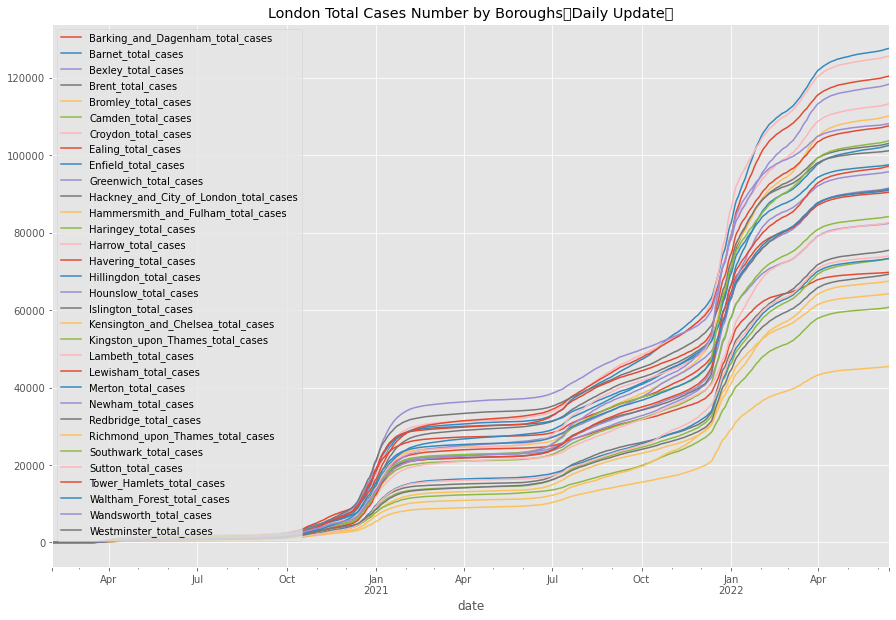

In [66]:
# Setup matplotlib
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))
plt.title('London Total Cases Number by Boroughs（Daily Update）')

# Create an axes object 
axes = plt.gca()

# pass the axes object to plot function
cd2.plot(kind='line', x='date', y='Barking_and_Dagenham_total_cases', ax=axes);
cd2.plot(kind='line', x='date', y='Barnet_total_cases', ax=axes);
cd2.plot(kind='line', x='date', y='Bexley_total_cases', ax=axes);
cd2.plot(kind='line', x='date', y='Brent_total_cases', ax=axes);
cd2.plot(kind='line', x='date', y='Bromley_total_cases', ax=axes);
cd2.plot(kind='line', x='date', y='Camden_total_cases', ax=axes);
cd2.plot(kind='line', x='date', y='Croydon_total_cases', ax=axes);
cd2.plot(kind='line', x='date', y='Ealing_total_cases', ax=axes);
cd2.plot(kind='line', x='date', y='Enfield_total_cases', ax=axes);
cd2.plot(kind='line', x='date', y='Greenwich_total_cases', ax=axes);
cd2.plot(kind='line', x='date', y='Hackney_and_City_of_London_total_cases', ax=axes);
cd2.plot(kind='line', x='date', y='Hammersmith_and_Fulham_total_cases', ax=axes);
cd2.plot(kind='line', x='date', y='Haringey_total_cases', ax=axes);
cd2.plot(kind='line', x='date', y='Harrow_total_cases', ax=axes);
cd2.plot(kind='line', x='date', y='Havering_total_cases', ax=axes);
cd2.plot(kind='line', x='date', y='Hillingdon_total_cases', ax=axes);
cd2.plot(kind='line', x='date', y='Hounslow_total_cases', ax=axes);
cd2.plot(kind='line', x='date', y='Islington_total_cases', ax=axes);
cd2.plot(kind='line', x='date', y='Kensington_and_Chelsea_total_cases', ax=axes);
cd2.plot(kind='line', x='date', y='Kingston_upon_Thames_total_cases', ax=axes);
cd2.plot(kind='line', x='date', y='Lambeth_total_cases', ax=axes);
cd2.plot(kind='line', x='date', y='Lewisham_total_cases', ax=axes);
cd2.plot(kind='line', x='date', y='Merton_total_cases', ax=axes);
cd2.plot(kind='line', x='date', y='Newham_total_cases', ax=axes);
cd2.plot(kind='line', x='date', y='Redbridge_total_cases', ax=axes);
cd2.plot(kind='line', x='date', y='Richmond_upon_Thames_total_cases', ax=axes);
cd2.plot(kind='line', x='date', y='Southwark_total_cases', ax=axes);
cd2.plot(kind='line', x='date', y='Sutton_total_cases', ax=axes);
cd2.plot(kind='line', x='date', y='Tower_Hamlets_total_cases', ax=axes);
cd2.plot(kind='line', x='date', y='Waltham_Forest_total_cases', ax=axes);
cd2.plot(kind='line', x='date', y='Wandsworth_total_cases', ax=axes);
cd2.plot(kind='line', x='date', y='Westminster_total_cases', ax=axes);

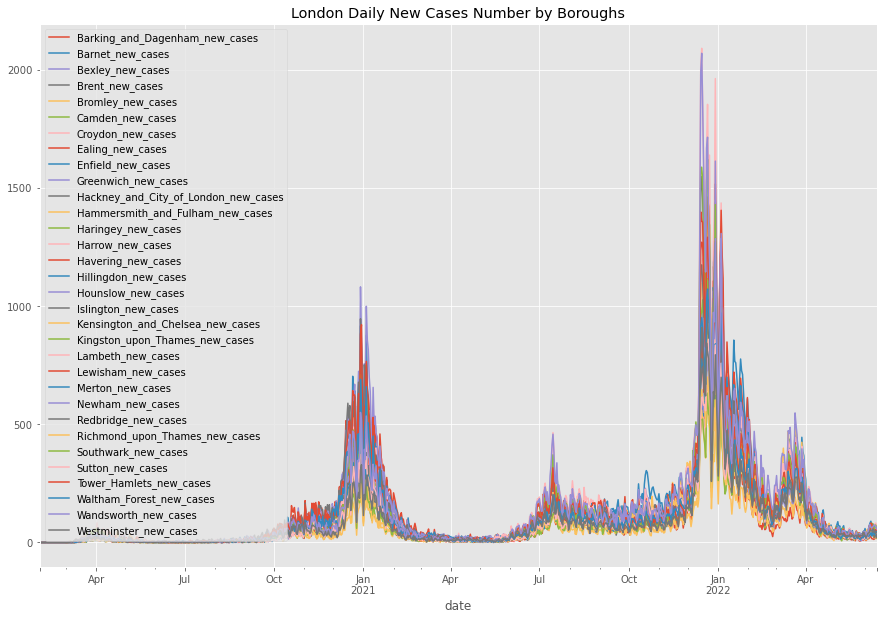

In [67]:
plt.figure(figsize=(15,10))
plt.title('London Daily New Cases Number by Boroughs')

axes = plt.gca()

cd2.plot(kind='line', x='date', y='Barking_and_Dagenham_new_cases', ax=axes);
cd2.plot(kind='line', x='date', y='Barnet_new_cases', ax=axes);
cd2.plot(kind='line', x='date', y='Bexley_new_cases', ax=axes);
cd2.plot(kind='line', x='date', y='Brent_new_cases', ax=axes);
cd2.plot(kind='line', x='date', y='Bromley_new_cases', ax=axes);
cd2.plot(kind='line', x='date', y='Camden_new_cases', ax=axes);
cd2.plot(kind='line', x='date', y='Croydon_new_cases', ax=axes);
cd2.plot(kind='line', x='date', y='Ealing_new_cases', ax=axes);
cd2.plot(kind='line', x='date', y='Enfield_new_cases', ax=axes);
cd2.plot(kind='line', x='date', y='Greenwich_new_cases', ax=axes);
cd2.plot(kind='line', x='date', y='Hackney_and_City_of_London_new_cases', ax=axes);
cd2.plot(kind='line', x='date', y='Hammersmith_and_Fulham_new_cases', ax=axes);
cd2.plot(kind='line', x='date', y='Haringey_new_cases', ax=axes);
cd2.plot(kind='line', x='date', y='Harrow_new_cases', ax=axes);
cd2.plot(kind='line', x='date', y='Havering_new_cases', ax=axes);
cd2.plot(kind='line', x='date', y='Hillingdon_new_cases', ax=axes);
cd2.plot(kind='line', x='date', y='Hounslow_new_cases', ax=axes);
cd2.plot(kind='line', x='date', y='Islington_new_cases', ax=axes);
cd2.plot(kind='line', x='date', y='Kensington_and_Chelsea_new_cases', ax=axes);
cd2.plot(kind='line', x='date', y='Kingston_upon_Thames_new_cases', ax=axes);
cd2.plot(kind='line', x='date', y='Lambeth_new_cases', ax=axes);
cd2.plot(kind='line', x='date', y='Lewisham_new_cases', ax=axes);
cd2.plot(kind='line', x='date', y='Merton_new_cases', ax=axes);
cd2.plot(kind='line', x='date', y='Newham_new_cases', ax=axes);
cd2.plot(kind='line', x='date', y='Redbridge_new_cases', ax=axes);
cd2.plot(kind='line', x='date', y='Richmond_upon_Thames_new_cases', ax=axes);
cd2.plot(kind='line', x='date', y='Southwark_new_cases', ax=axes);
cd2.plot(kind='line', x='date', y='Sutton_new_cases', ax=axes);
cd2.plot(kind='line', x='date', y='Tower_Hamlets_new_cases', ax=axes);
cd2.plot(kind='line', x='date', y='Waltham_Forest_new_cases', ax=axes);
cd2.plot(kind='line', x='date', y='Wandsworth_new_cases', ax=axes);
cd2.plot(kind='line', x='date', y='Westminster_new_cases', ax=axes);

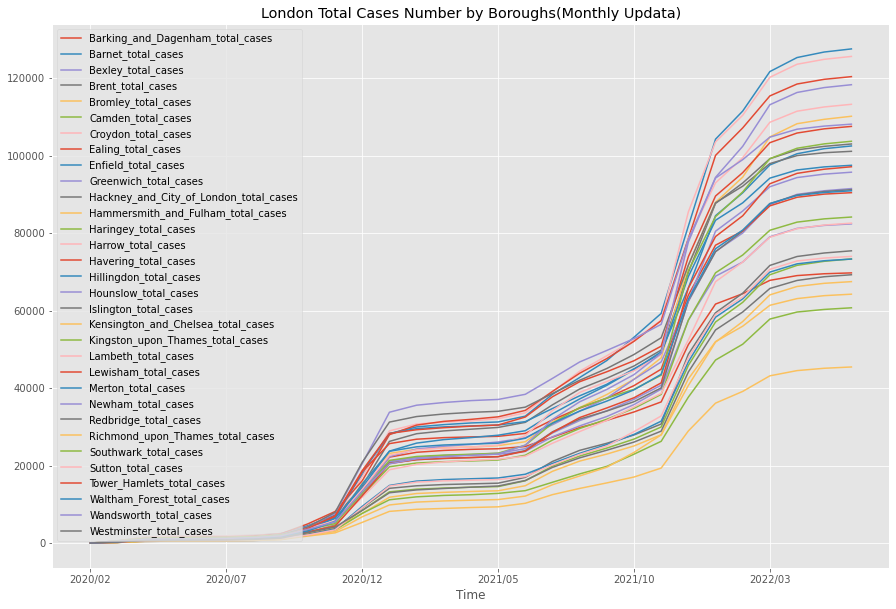

In [68]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))
plt.title('London Total Cases Number by Boroughs(Monthly Updata)')

axes = plt.gca()

cd3.plot(kind='line', x='Time', y='Barking_and_Dagenham_total_cases', ax=axes);
cd3.plot(kind='line', x='Time', y='Barnet_total_cases', ax=axes);
cd3.plot(kind='line', x='Time', y='Bexley_total_cases', ax=axes);
cd3.plot(kind='line', x='Time', y='Brent_total_cases', ax=axes);
cd3.plot(kind='line', x='Time', y='Bromley_total_cases', ax=axes);
cd3.plot(kind='line', x='Time', y='Camden_total_cases', ax=axes);
cd3.plot(kind='line', x='Time', y='Croydon_total_cases', ax=axes);
cd3.plot(kind='line', x='Time', y='Ealing_total_cases', ax=axes);
cd3.plot(kind='line', x='Time', y='Enfield_total_cases', ax=axes);
cd3.plot(kind='line', x='Time', y='Greenwich_total_cases', ax=axes);
cd3.plot(kind='line', x='Time', y='Hackney_and_City_of_London_total_cases', ax=axes);
cd3.plot(kind='line', x='Time', y='Hammersmith_and_Fulham_total_cases', ax=axes);
cd3.plot(kind='line', x='Time', y='Haringey_total_cases', ax=axes);
cd3.plot(kind='line', x='Time', y='Harrow_total_cases', ax=axes);
cd3.plot(kind='line', x='Time', y='Havering_total_cases', ax=axes);
cd3.plot(kind='line', x='Time', y='Hillingdon_total_cases', ax=axes);
cd3.plot(kind='line', x='Time', y='Hounslow_total_cases', ax=axes);
cd3.plot(kind='line', x='Time', y='Islington_total_cases', ax=axes);
cd3.plot(kind='line', x='Time', y='Kensington_and_Chelsea_total_cases', ax=axes);
cd3.plot(kind='line', x='Time', y='Kingston_upon_Thames_total_cases', ax=axes);
cd3.plot(kind='line', x='Time', y='Lambeth_total_cases', ax=axes);
cd3.plot(kind='line', x='Time', y='Lewisham_total_cases', ax=axes);
cd3.plot(kind='line', x='Time', y='Merton_total_cases', ax=axes);
cd3.plot(kind='line', x='Time', y='Newham_total_cases', ax=axes);
cd3.plot(kind='line', x='Time', y='Redbridge_total_cases', ax=axes);
cd3.plot(kind='line', x='Time', y='Richmond_upon_Thames_total_cases', ax=axes);
cd3.plot(kind='line', x='Time', y='Southwark_total_cases', ax=axes);
cd3.plot(kind='line', x='Time', y='Sutton_total_cases', ax=axes);
cd3.plot(kind='line', x='Time', y='Tower_Hamlets_total_cases', ax=axes);
cd3.plot(kind='line', x='Time', y='Waltham_Forest_total_cases', ax=axes);
cd3.plot(kind='line', x='Time', y='Wandsworth_total_cases', ax=axes);
cd3.plot(kind='line', x='Time', y='Westminster_total_cases', ax=axes);

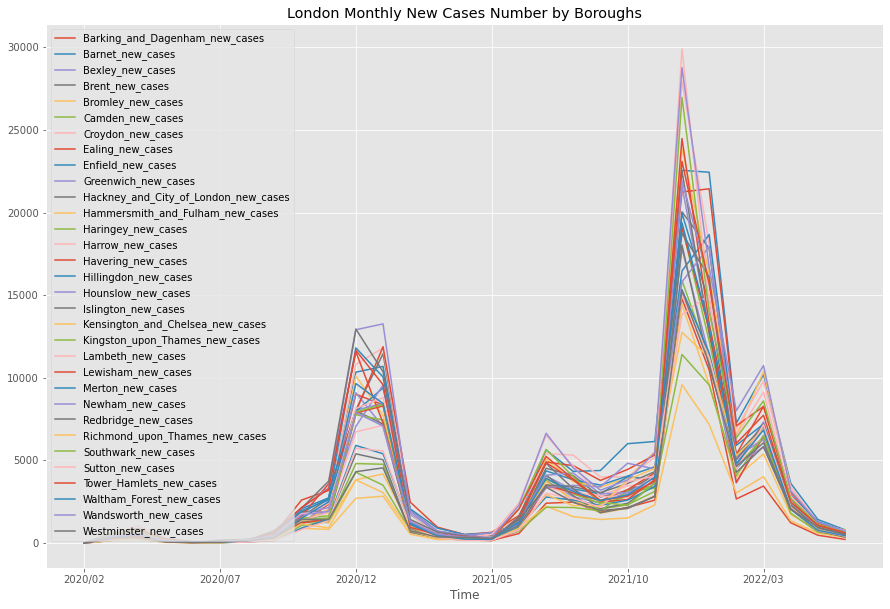

In [69]:
plt.figure(figsize=(15,10))
plt.title('London Monthly New Cases Number by Boroughs')

axes = plt.gca()

cd3.plot(kind='line', x='Time', y='Barking_and_Dagenham_new_cases', ax=axes);
cd3.plot(kind='line', x='Time', y='Barnet_new_cases', ax=axes);
cd3.plot(kind='line', x='Time', y='Bexley_new_cases', ax=axes);
cd3.plot(kind='line', x='Time', y='Brent_new_cases', ax=axes);
cd3.plot(kind='line', x='Time', y='Bromley_new_cases', ax=axes);
cd3.plot(kind='line', x='Time', y='Camden_new_cases', ax=axes);
cd3.plot(kind='line', x='Time', y='Croydon_new_cases', ax=axes);
cd3.plot(kind='line', x='Time', y='Ealing_new_cases', ax=axes);
cd3.plot(kind='line', x='Time', y='Enfield_new_cases', ax=axes);
cd3.plot(kind='line', x='Time', y='Greenwich_new_cases', ax=axes);
cd3.plot(kind='line', x='Time', y='Hackney_and_City_of_London_new_cases', ax=axes);
cd3.plot(kind='line', x='Time', y='Hammersmith_and_Fulham_new_cases', ax=axes);
cd3.plot(kind='line', x='Time', y='Haringey_new_cases', ax=axes);
cd3.plot(kind='line', x='Time', y='Harrow_new_cases', ax=axes);
cd3.plot(kind='line', x='Time', y='Havering_new_cases', ax=axes);
cd3.plot(kind='line', x='Time', y='Hillingdon_new_cases', ax=axes);
cd3.plot(kind='line', x='Time', y='Hounslow_new_cases', ax=axes);
cd3.plot(kind='line', x='Time', y='Islington_new_cases', ax=axes);
cd3.plot(kind='line', x='Time', y='Kensington_and_Chelsea_new_cases', ax=axes);
cd3.plot(kind='line', x='Time', y='Kingston_upon_Thames_new_cases', ax=axes);
cd3.plot(kind='line', x='Time', y='Lambeth_new_cases', ax=axes);
cd3.plot(kind='line', x='Time', y='Lewisham_new_cases', ax=axes);
cd3.plot(kind='line', x='Time', y='Merton_new_cases', ax=axes);
cd3.plot(kind='line', x='Time', y='Newham_new_cases', ax=axes);
cd3.plot(kind='line', x='Time', y='Redbridge_new_cases', ax=axes);
cd3.plot(kind='line', x='Time', y='Richmond_upon_Thames_new_cases', ax=axes);
cd3.plot(kind='line', x='Time', y='Southwark_new_cases', ax=axes);
cd3.plot(kind='line', x='Time', y='Sutton_new_cases', ax=axes);
cd3.plot(kind='line', x='Time', y='Tower_Hamlets_new_cases', ax=axes);
cd3.plot(kind='line', x='Time', y='Waltham_Forest_new_cases', ax=axes);
cd3.plot(kind='line', x='Time', y='Wandsworth_new_cases', ax=axes);
cd3.plot(kind='line', x='Time', y='Westminster_new_cases', ax=axes);

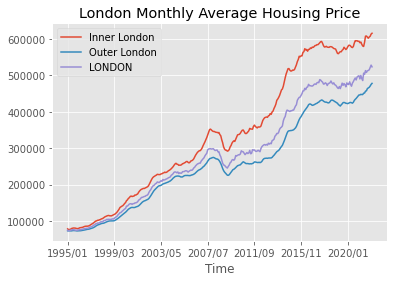

In [70]:
# Setup matplotlib
import matplotlib.pyplot as plt

plt.title('London Monthly Average Housing Price')

# Create an axes object 
axes = plt.gca()

# pass the axes object to plot function
ap.plot(kind='line', x='Time', y='Inner London', ax=axes);
ap.plot(kind='line', x='Time', y='Outer London', ax=axes);
ap.plot(kind='line', x='Time', y='LONDON', ax=axes);

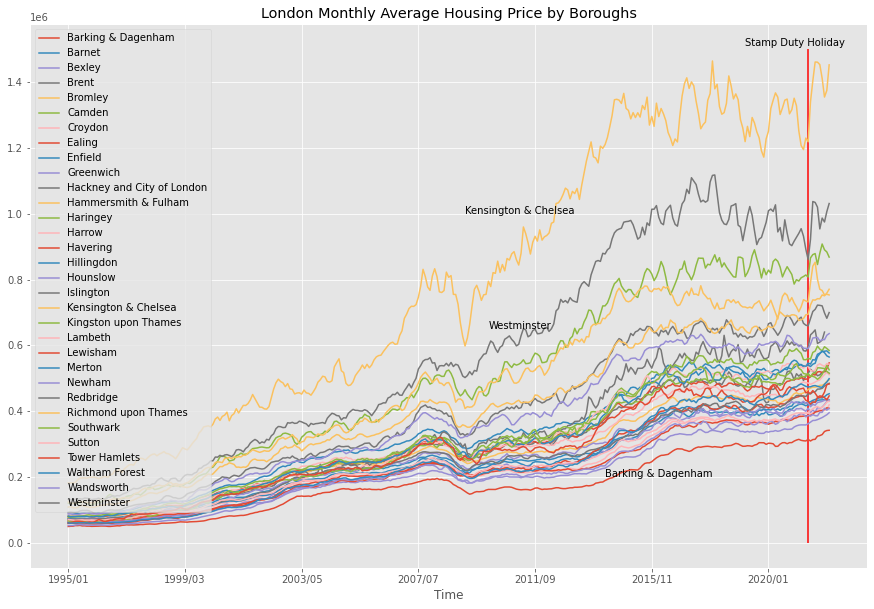

In [71]:
# Setup matplotlib
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))
plt.title('London Monthly Average Housing Price by Boroughs')
plt.text(170, 1000000, 'Kensington & Chelsea')
plt.text(180, 650000, 'Westminster')
plt.text(230, 200000, 'Barking & Dagenham')
plt.vlines(317, 0, 1500000, color='red')
plt.text(290, 1510000, 'Stamp Duty Holiday')


# Create an axes object 
axes = plt.gca()

# pass the axes object to plot function
ap.plot(kind='line', x='Time', y='Barking & Dagenham', ax=axes);
ap.plot(kind='line', x='Time', y='Barnet', ax=axes);
ap.plot(kind='line', x='Time', y='Bexley', ax=axes);
ap.plot(kind='line', x='Time', y='Brent', ax=axes);
ap.plot(kind='line', x='Time', y='Bromley', ax=axes);
ap.plot(kind='line', x='Time', y='Camden', ax=axes);
ap.plot(kind='line', x='Time', y='Croydon', ax=axes);
ap.plot(kind='line', x='Time', y='Ealing', ax=axes);
ap.plot(kind='line', x='Time', y='Enfield', ax=axes);
ap.plot(kind='line', x='Time', y='Greenwich', ax=axes);
ap.plot(kind='line', x='Time', y='Hackney and City of London', ax=axes);
ap.plot(kind='line', x='Time', y='Hammersmith & Fulham', ax=axes);
ap.plot(kind='line', x='Time', y='Haringey', ax=axes);
ap.plot(kind='line', x='Time', y='Harrow', ax=axes);
ap.plot(kind='line', x='Time', y='Havering', ax=axes);
ap.plot(kind='line', x='Time', y='Hillingdon', ax=axes);
ap.plot(kind='line', x='Time', y='Hounslow', ax=axes);
ap.plot(kind='line', x='Time', y='Islington', ax=axes);
ap.plot(kind='line', x='Time', y='Kensington & Chelsea', ax=axes);
ap.plot(kind='line', x='Time', y='Kingston upon Thames', ax=axes);
ap.plot(kind='line', x='Time', y='Lambeth', ax=axes);
ap.plot(kind='line', x='Time', y='Lewisham', ax=axes);
ap.plot(kind='line', x='Time', y='Merton', ax=axes);
ap.plot(kind='line', x='Time', y='Newham', ax=axes);
ap.plot(kind='line', x='Time', y='Redbridge', ax=axes);
ap.plot(kind='line', x='Time', y='Richmond upon Thames', ax=axes);
ap.plot(kind='line', x='Time', y='Southwark', ax=axes);
ap.plot(kind='line', x='Time', y='Sutton', ax=axes);
ap.plot(kind='line', x='Time', y='Tower Hamlets', ax=axes);
ap.plot(kind='line', x='Time', y='Waltham Forest', ax=axes);
ap.plot(kind='line', x='Time', y='Wandsworth', ax=axes);
ap.plot(kind='line', x='Time', y='Westminster', ax=axes);

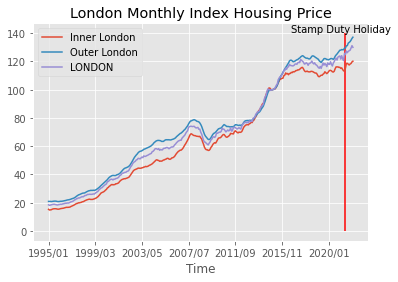

In [72]:
# Setup matplotlib
import matplotlib.pyplot as plt
plt.title('London Monthly Index Housing Price')
plt.vlines(317, 0, 140, color='red')
plt.text(260, 141, 'Stamp Duty Holiday')

# Create an axes object 
axes = plt.gca()

# pass the axes object to plot function
ip.plot(kind='line', x='Time', y='Inner London', ax=axes);
ip.plot(kind='line', x='Time', y='Outer London', ax=axes);
ip.plot(kind='line', x='Time', y='LONDON', ax=axes);

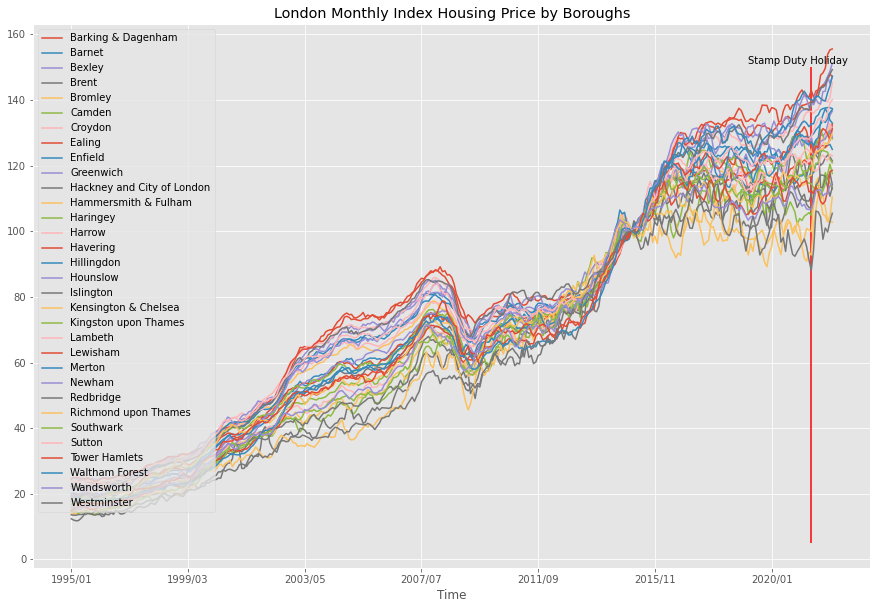

In [73]:
# Setup matplotlib
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))
plt.title('London Monthly Index Housing Price by Boroughs')
plt.vlines(317, 5, 150, color='red')
plt.text(290, 151, 'Stamp Duty Holiday')

# Create an axes object 
axes = plt.gca()

# pass the axes object to plot function
ip.plot(kind='line', x='Time', y='Barking & Dagenham', ax=axes);
ip.plot(kind='line', x='Time', y='Barnet', ax=axes);
ip.plot(kind='line', x='Time', y='Bexley', ax=axes);
ip.plot(kind='line', x='Time', y='Brent', ax=axes);
ip.plot(kind='line', x='Time', y='Bromley', ax=axes);
ip.plot(kind='line', x='Time', y='Camden', ax=axes);
ip.plot(kind='line', x='Time', y='Croydon', ax=axes);
ip.plot(kind='line', x='Time', y='Ealing', ax=axes);
ip.plot(kind='line', x='Time', y='Enfield', ax=axes);
ip.plot(kind='line', x='Time', y='Greenwich', ax=axes);
ip.plot(kind='line', x='Time', y='Hackney and City of London', ax=axes);
ip.plot(kind='line', x='Time', y='Hammersmith & Fulham', ax=axes);
ip.plot(kind='line', x='Time', y='Haringey', ax=axes);
ip.plot(kind='line', x='Time', y='Harrow', ax=axes);
ip.plot(kind='line', x='Time', y='Havering', ax=axes);
ip.plot(kind='line', x='Time', y='Hillingdon', ax=axes);
ip.plot(kind='line', x='Time', y='Hounslow', ax=axes);
ip.plot(kind='line', x='Time', y='Islington', ax=axes);
ip.plot(kind='line', x='Time', y='Kensington & Chelsea', ax=axes);
ip.plot(kind='line', x='Time', y='Kingston upon Thames', ax=axes);
ip.plot(kind='line', x='Time', y='Lambeth', ax=axes);
ip.plot(kind='line', x='Time', y='Lewisham', ax=axes);
ip.plot(kind='line', x='Time', y='Merton', ax=axes);
ip.plot(kind='line', x='Time', y='Newham', ax=axes);
ip.plot(kind='line', x='Time', y='Redbridge', ax=axes);
ip.plot(kind='line', x='Time', y='Richmond upon Thames', ax=axes);
ip.plot(kind='line', x='Time', y='Southwark', ax=axes);
ip.plot(kind='line', x='Time', y='Sutton', ax=axes);
ip.plot(kind='line', x='Time', y='Tower Hamlets', ax=axes);
ip.plot(kind='line', x='Time', y='Waltham Forest', ax=axes);
ip.plot(kind='line', x='Time', y='Wandsworth', ax=axes);
ip.plot(kind='line', x='Time', y='Westminster', ax=axes);

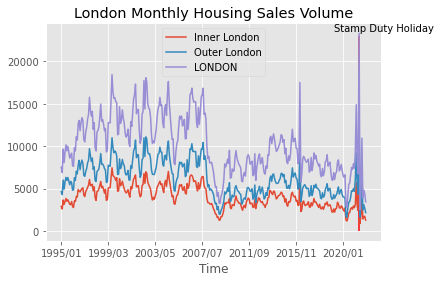

In [74]:
# Setup matplotlib
import matplotlib.pyplot as plt

plt.title('London Monthly Housing Sales Volume')
plt.vlines(317, 1, 23000, color='red')
plt.text(290, 23500, 'Stamp Duty Holiday')

# Create an axes object 
axes = plt.gca()

# pass the axes object to plot function
sv.plot(kind='line', x='Time', y='Inner London', ax=axes);
sv.plot(kind='line', x='Time', y='Outer London', ax=axes);
sv.plot(kind='line', x='Time', y='LONDON', ax=axes);

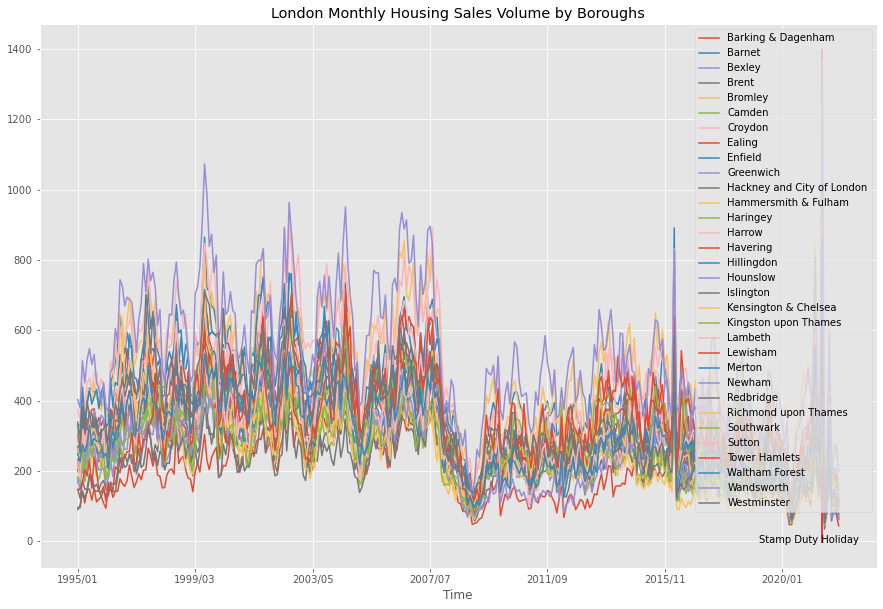

In [75]:
# Setup matplotlib
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))
plt.title('London Monthly Housing Sales Volume by Boroughs')
plt.vlines(317, -5, 1400, color='red')
plt.text(290, -6, 'Stamp Duty Holiday')

# Create an axes object 
axes = plt.gca()

# pass the axes object to plot function
sv.plot(kind='line', x='Time', y='Barking & Dagenham', ax=axes);
sv.plot(kind='line', x='Time', y='Barnet', ax=axes);
sv.plot(kind='line', x='Time', y='Bexley', ax=axes);
sv.plot(kind='line', x='Time', y='Brent', ax=axes);
sv.plot(kind='line', x='Time', y='Bromley', ax=axes);
sv.plot(kind='line', x='Time', y='Camden', ax=axes);
sv.plot(kind='line', x='Time', y='Croydon', ax=axes);
sv.plot(kind='line', x='Time', y='Ealing', ax=axes);
sv.plot(kind='line', x='Time', y='Enfield', ax=axes);
sv.plot(kind='line', x='Time', y='Greenwich', ax=axes);
sv.plot(kind='line', x='Time', y='Hackney and City of London', ax=axes);
sv.plot(kind='line', x='Time', y='Hammersmith & Fulham', ax=axes);
sv.plot(kind='line', x='Time', y='Haringey', ax=axes);
sv.plot(kind='line', x='Time', y='Harrow', ax=axes);
sv.plot(kind='line', x='Time', y='Havering', ax=axes);
sv.plot(kind='line', x='Time', y='Hillingdon', ax=axes);
sv.plot(kind='line', x='Time', y='Hounslow', ax=axes);
sv.plot(kind='line', x='Time', y='Islington', ax=axes);
sv.plot(kind='line', x='Time', y='Kensington & Chelsea', ax=axes);
sv.plot(kind='line', x='Time', y='Kingston upon Thames', ax=axes);
sv.plot(kind='line', x='Time', y='Lambeth', ax=axes);
sv.plot(kind='line', x='Time', y='Lewisham', ax=axes);
sv.plot(kind='line', x='Time', y='Merton', ax=axes);
sv.plot(kind='line', x='Time', y='Newham', ax=axes);
sv.plot(kind='line', x='Time', y='Redbridge', ax=axes);
sv.plot(kind='line', x='Time', y='Richmond upon Thames', ax=axes);
sv.plot(kind='line', x='Time', y='Southwark', ax=axes);
sv.plot(kind='line', x='Time', y='Sutton', ax=axes);
sv.plot(kind='line', x='Time', y='Tower Hamlets', ax=axes);
sv.plot(kind='line', x='Time', y='Waltham Forest', ax=axes);
sv.plot(kind='line', x='Time', y='Wandsworth', ax=axes);
sv.plot(kind='line', x='Time', y='Westminster', ax=axes);

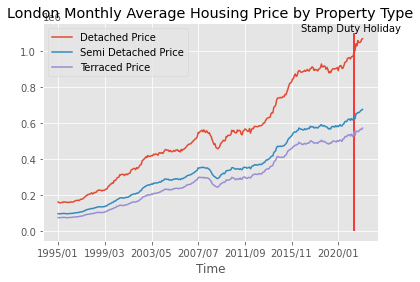

In [76]:
# Setup matplotlib
import matplotlib.pyplot as plt

plt.title('London Monthly Average Housing Price by Property Type')
plt.vlines(317, 5, 1100000, color='red')
plt.text(260, 1110000, 'Stamp Duty Holiday')

# Create an axes object 
axes = plt.gca()

# pass the axes object to plot function
bt.plot(kind='line', x='Time', y='Detached Price', ax=axes);
bt.plot(kind='line', x='Time', y='Semi Detached Price', ax=axes);
bt.plot(kind='line', x='Time', y='Terraced Price', ax=axes);

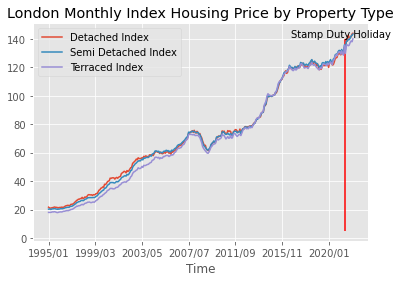

In [77]:
# Setup matplotlib
import matplotlib.pyplot as plt

plt.title('London Monthly Index Housing Price by Property Type')
plt.vlines(317, 5, 140, color='red')
plt.text(260, 141, 'Stamp Duty Holiday')

# Create an axes object 
axes = plt.gca()

# pass the axes object to plot function
bt.plot(kind='line', x='Time', y='Detached Index', ax=axes);
bt.plot(kind='line', x='Time', y='Semi Detached Index', ax=axes);
bt.plot(kind='line', x='Time', y='Terraced Index', ax=axes);

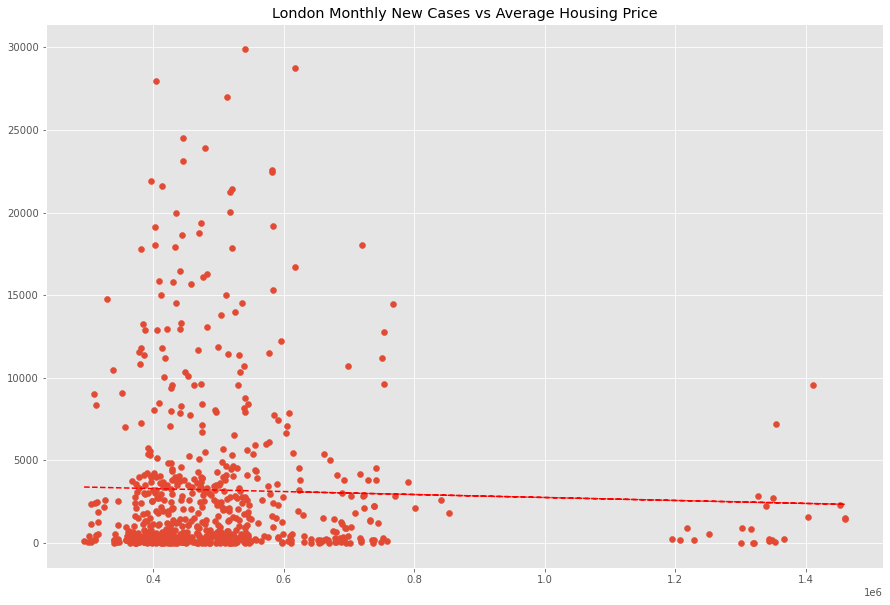

In [78]:
plt.figure(figsize=(15,10))
x = df['average_price']
y = df['new_cases']
plt.scatter(x, y)
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.title('London Monthly New Cases vs Average Housing Price')
plt.show()

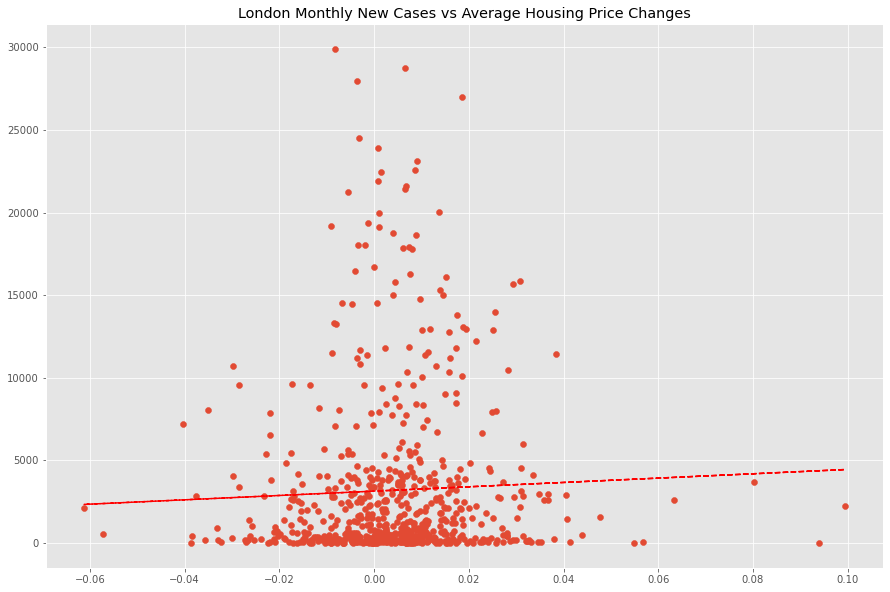

In [79]:
plt.figure(figsize=(15,10))
x = df['average_price_change']
y = df['new_cases']
plt.scatter(x, y)
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.title('London Monthly New Cases vs Average Housing Price Changes')
plt.show()

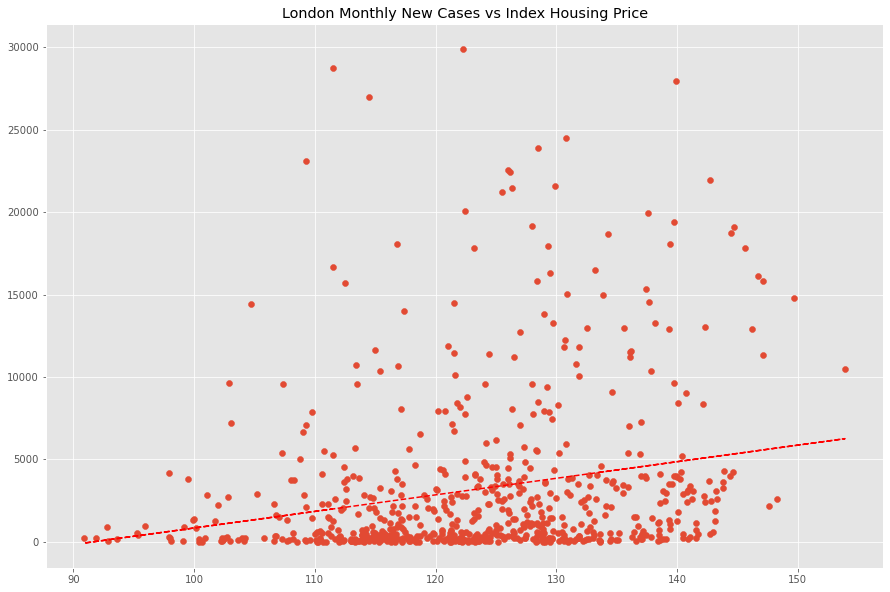

In [80]:
plt.figure(figsize=(15,10))
x = df['index_price']
y = df['new_cases']
plt.scatter(x, y)
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.title('London Monthly New Cases vs Index Housing Price')
plt.show()

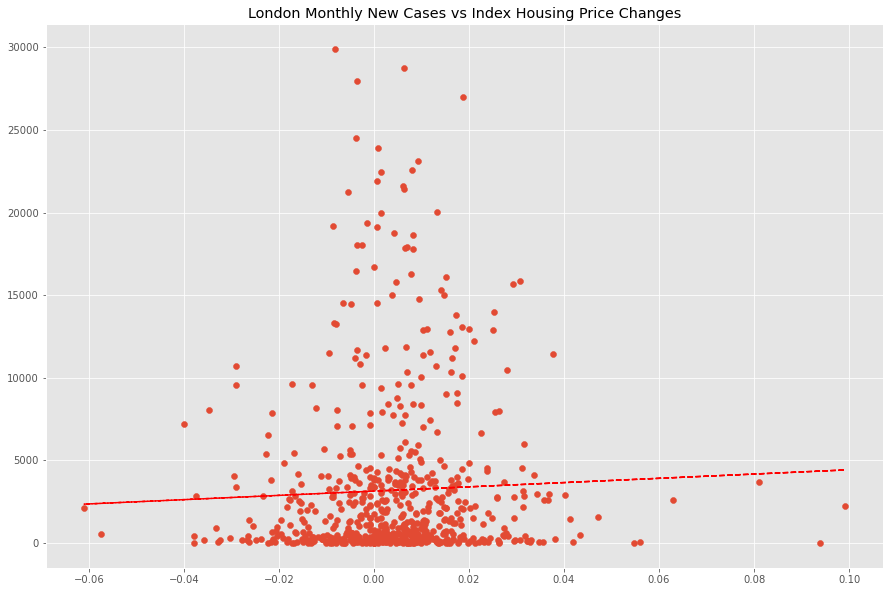

In [81]:
plt.figure(figsize=(15,10))
x = df['index_price_change']
y = df['new_cases']
plt.scatter(x, y)
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.title('London Monthly New Cases vs Index Housing Price Changes')
plt.show()

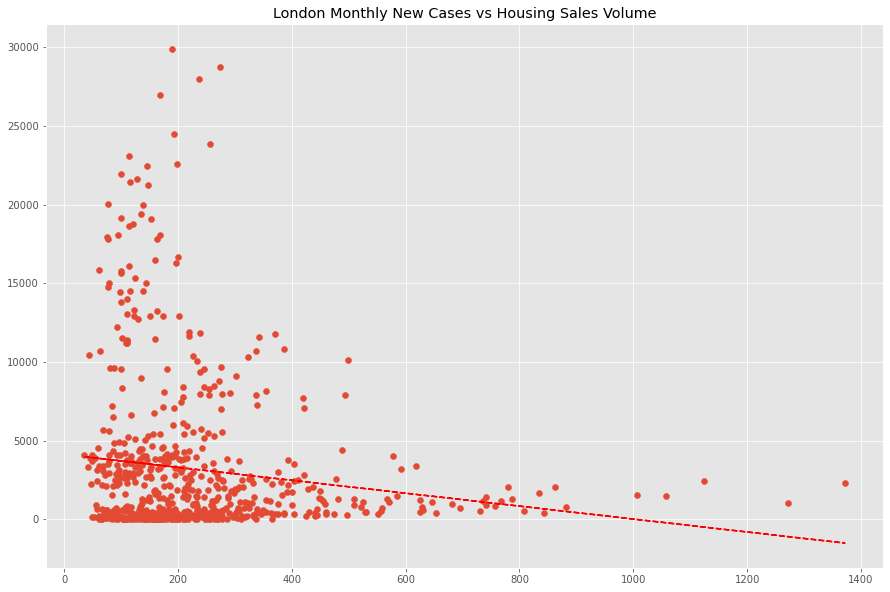

In [82]:
plt.figure(figsize=(15,10))
x = df['sales_volume']
y = df['new_cases']
plt.scatter(x, y)
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.title('London Monthly New Cases vs Housing Sales Volume')
plt.show()

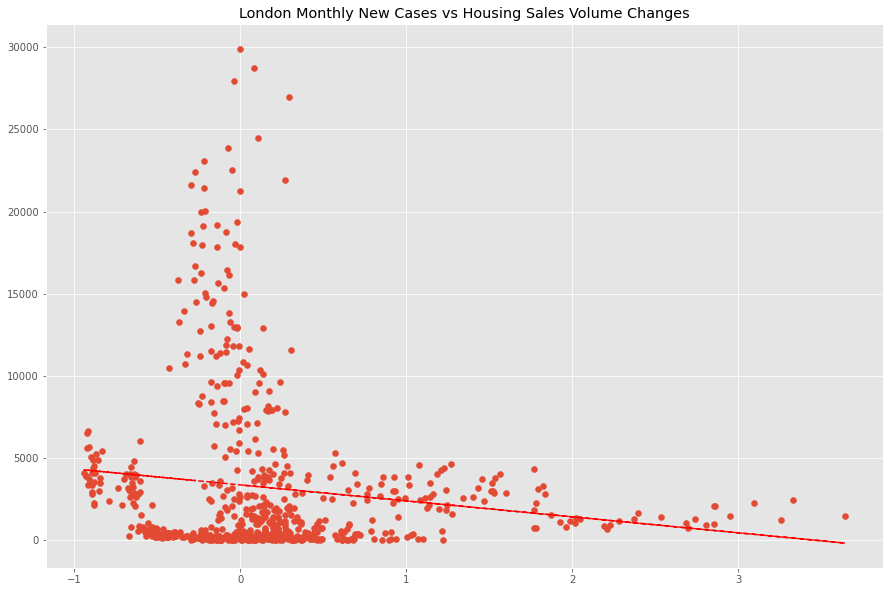

In [83]:
plt.figure(figsize=(15,10))
x = df['sales_volume_change']
y = df['new_cases']
plt.scatter(x, y)
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.title('London Monthly New Cases vs Housing Sales Volume Changes')
plt.show()

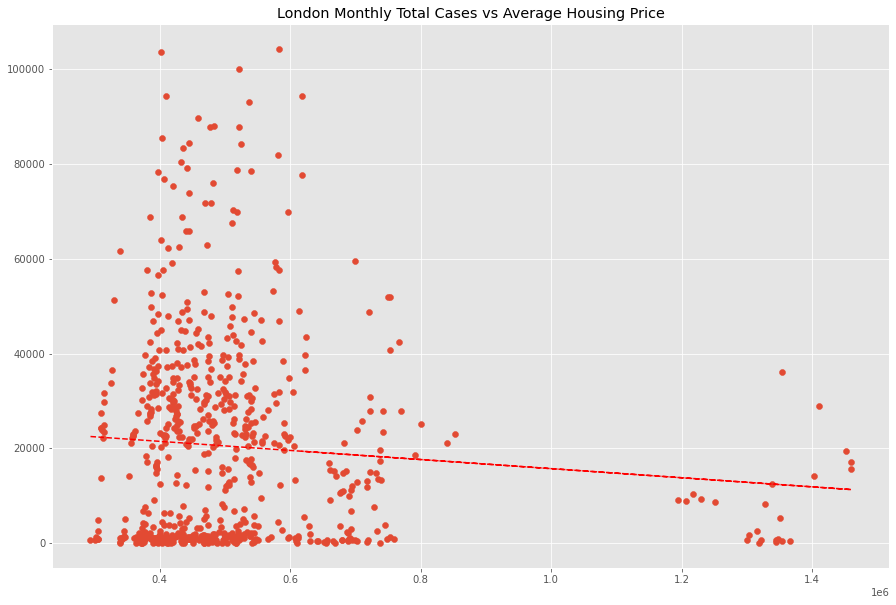

In [84]:
plt.figure(figsize=(15,10))
x = df['average_price']
y = df['total_cases']
plt.scatter(x, y)
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.title('London Monthly Total Cases vs Average Housing Price')
plt.show()

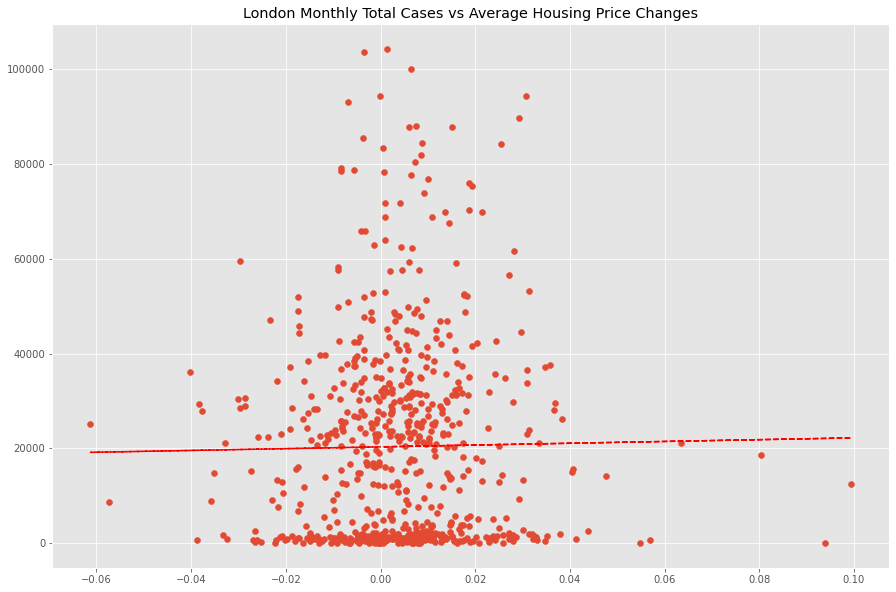

In [85]:
plt.figure(figsize=(15,10))
x = df['average_price_change']
y = df['total_cases']
plt.scatter(x, y)
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.title('London Monthly Total Cases vs Average Housing Price Changes')
plt.show()

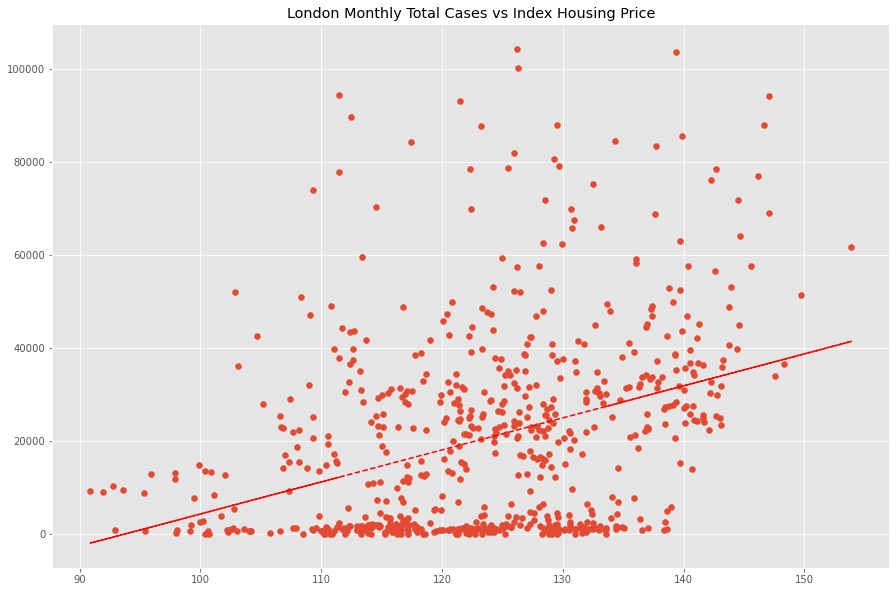

In [86]:
plt.figure(figsize=(15,10))
x = df['index_price']
y = df['total_cases']
plt.scatter(x, y)
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.title('London Monthly Total Cases vs Index Housing Price')
plt.show()

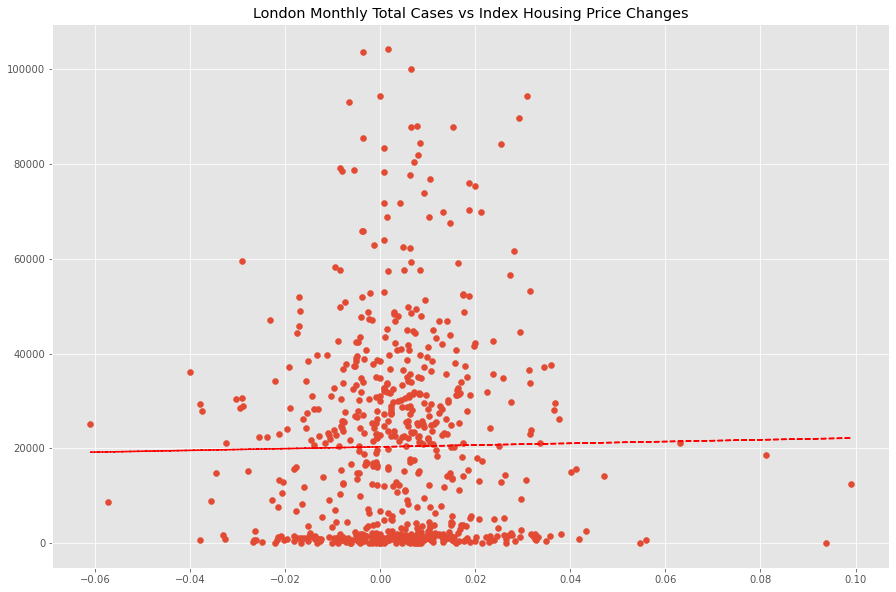

In [87]:
plt.figure(figsize=(15,10))
x = df['index_price_change']
y = df['total_cases']
plt.scatter(x, y)
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.title('London Monthly Total Cases vs Index Housing Price Changes')
plt.show()

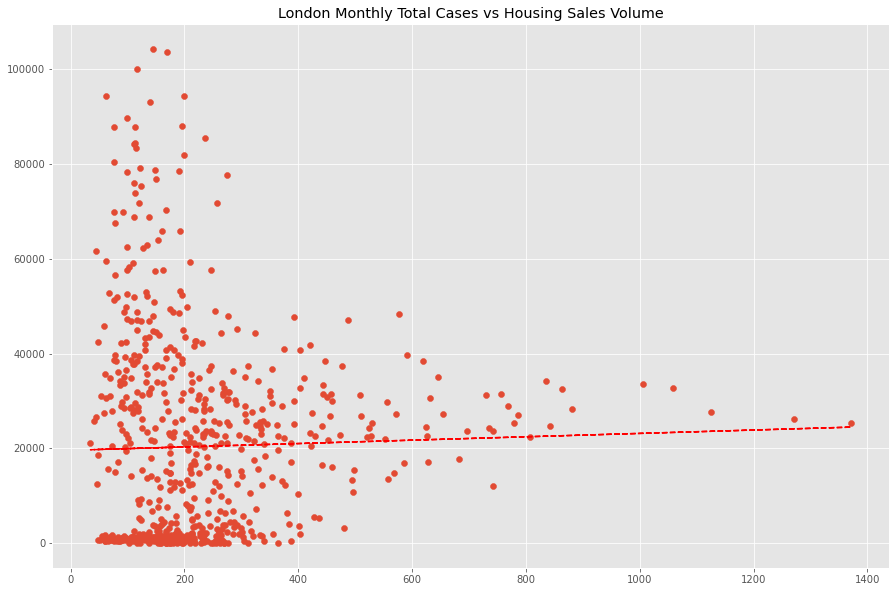

In [88]:
plt.figure(figsize=(15,10))
x = df['sales_volume']
y = df['total_cases']
plt.scatter(x, y)
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.title('London Monthly Total Cases vs Housing Sales Volume')
plt.show()

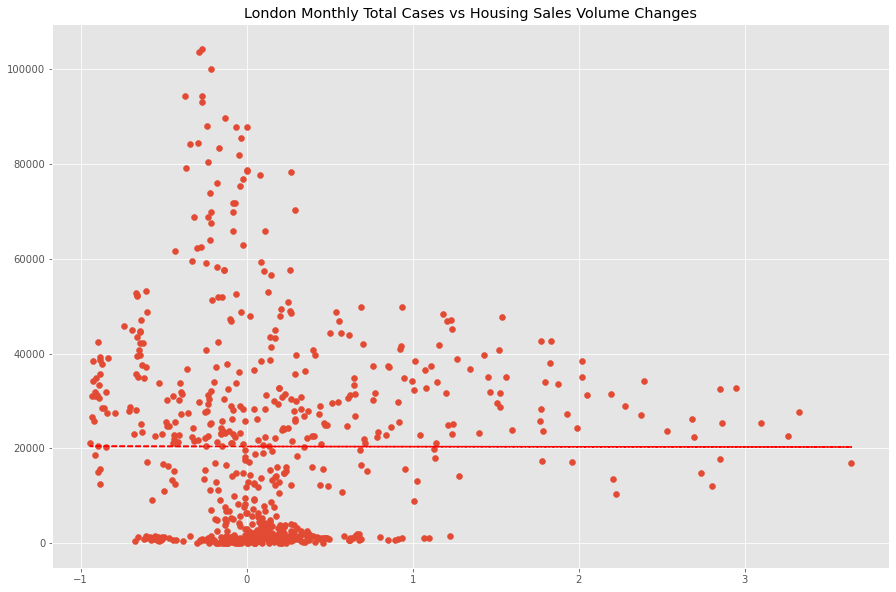

In [89]:
plt.figure(figsize=(15,10))
x = df['sales_volume_change']
y = df['total_cases']
plt.scatter(x, y)
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.title('London Monthly Total Cases vs Housing Sales Volume Changes')
plt.show()

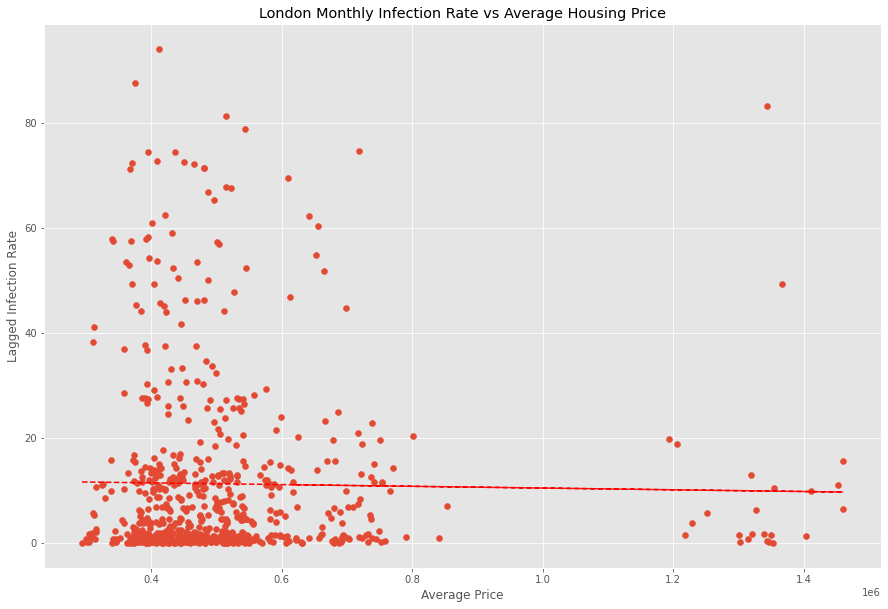

In [90]:
plt.figure(figsize=(15,10))
x = df['average_price']
y = df['lag_infection_rate']
plt.scatter(x, y)
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.title('London Monthly Infection Rate vs Average Housing Price')
plt.xlabel("Average Price")
plt.ylabel("Lagged Infection Rate")
plt.show()

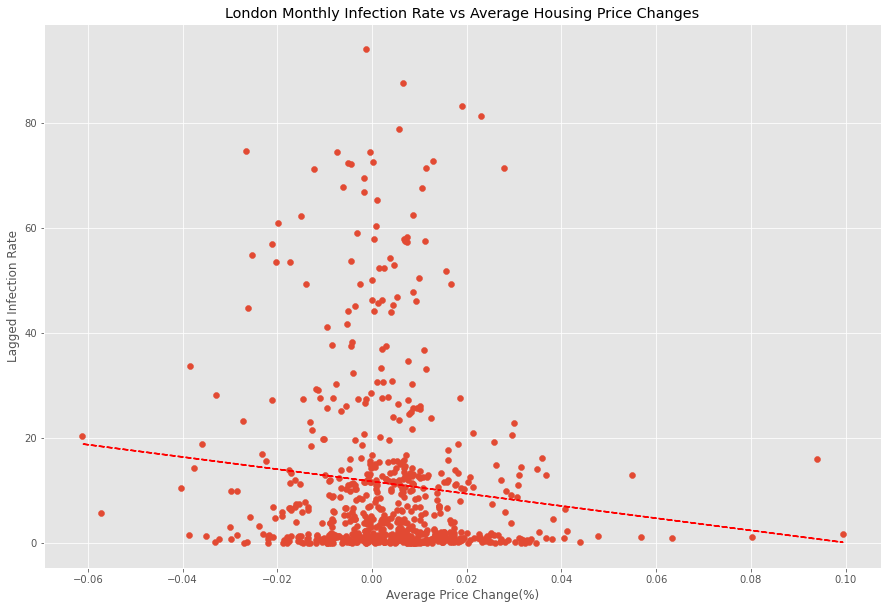

In [91]:
plt.figure(figsize=(15,10))
x = df['average_price_change']
y = df['lag_infection_rate']
plt.scatter(x, y)
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.title('London Monthly Infection Rate vs Average Housing Price Changes')
plt.xlabel("Average Price Change(%)")
plt.ylabel("Lagged Infection Rate") 
plt.show()

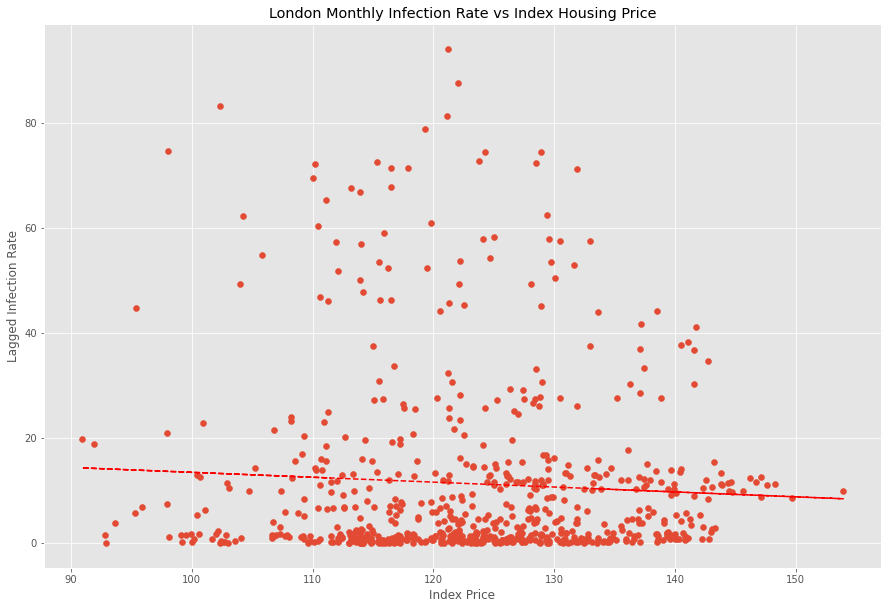

In [92]:
plt.figure(figsize=(15,10))
x = df['index_price']
y = df['lag_infection_rate']
plt.scatter(x, y)
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.title('London Monthly Infection Rate vs Index Housing Price')
plt.xlabel("Index Price")
plt.ylabel("Lagged Infection Rate")
plt.show()

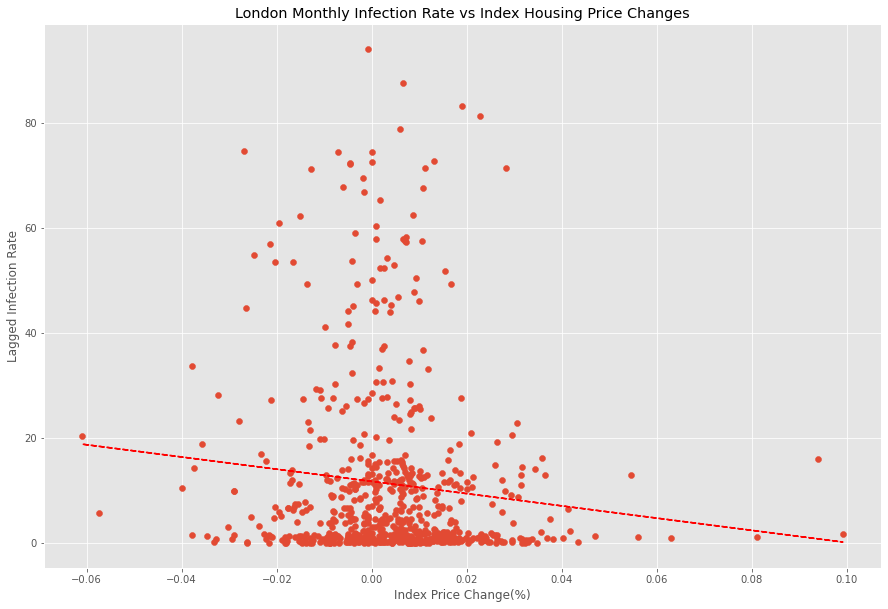

In [93]:
plt.figure(figsize=(15,10))
x = df['index_price_change']
y = df['lag_infection_rate']
plt.scatter(x, y)
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.title('London Monthly Infection Rate vs Index Housing Price Changes')
plt.xlabel("Index Price Change(%)")
plt.ylabel("Lagged Infection Rate")
plt.show()

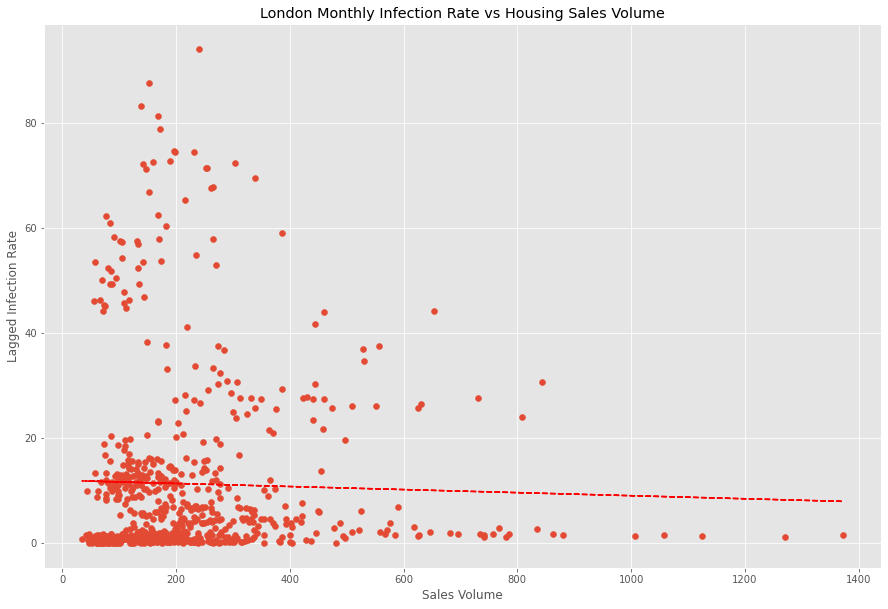

In [94]:
plt.figure(figsize=(15,10))
x = df['sales_volume']
y = df['lag_infection_rate']
plt.scatter(x, y)
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.title('London Monthly Infection Rate vs Housing Sales Volume')
plt.xlabel("Sales Volume")
plt.ylabel("Lagged Infection Rate")
plt.show()

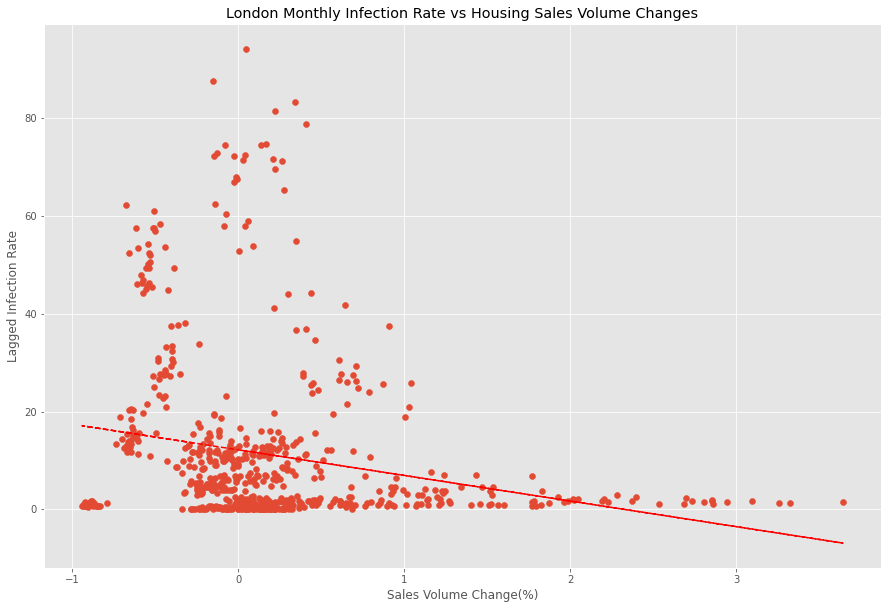

In [95]:
plt.figure(figsize=(15,10))
x = df['sales_volume_change']
y = df['lag_infection_rate']
plt.scatter(x, y)
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.title('London Monthly Infection Rate vs Housing Sales Volume Changes')
plt.xlabel("Sales Volume Change(%)")
plt.ylabel("Lagged Infection Rate")
plt.show()

### Regression

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 693 entries, 3 to 695
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Time                  693 non-null    object 
 1   year                  693 non-null    object 
 2   month                 693 non-null    object 
 3   new_cases             693 non-null    int64  
 4   area                  693 non-null    object 
 5   area_id               693 non-null    object 
 6   infection_rate        693 non-null    float64
 7   total_cases           693 non-null    int64  
 8   gcse_score            693 non-null    float64
 9   green_space           693 non-null    float64
 10  average_price         693 non-null    float64
 11  average_price_change  693 non-null    float64
 12  index_price           693 non-null    float64
 13  index_price_change    693 non-null    float64
 14  sales_volume          693 non-null    float64
 15  sales_volume_change   6

In [97]:
df2=df.drop(['Time','year','month','area','area_id'], axis=1)
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 693 entries, 3 to 695
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   new_cases             693 non-null    int64  
 1   infection_rate        693 non-null    float64
 2   total_cases           693 non-null    int64  
 3   gcse_score            693 non-null    float64
 4   green_space           693 non-null    float64
 5   average_price         693 non-null    float64
 6   average_price_change  693 non-null    float64
 7   index_price           693 non-null    float64
 8   index_price_change    693 non-null    float64
 9   sales_volume          693 non-null    float64
 10  sales_volume_change   693 non-null    float64
 11  lag_infection_rate    693 non-null    float64
dtypes: float64(10), int64(2)
memory usage: 70.4 KB


Text(0.5, 1.05, 'Correlation Matrix')

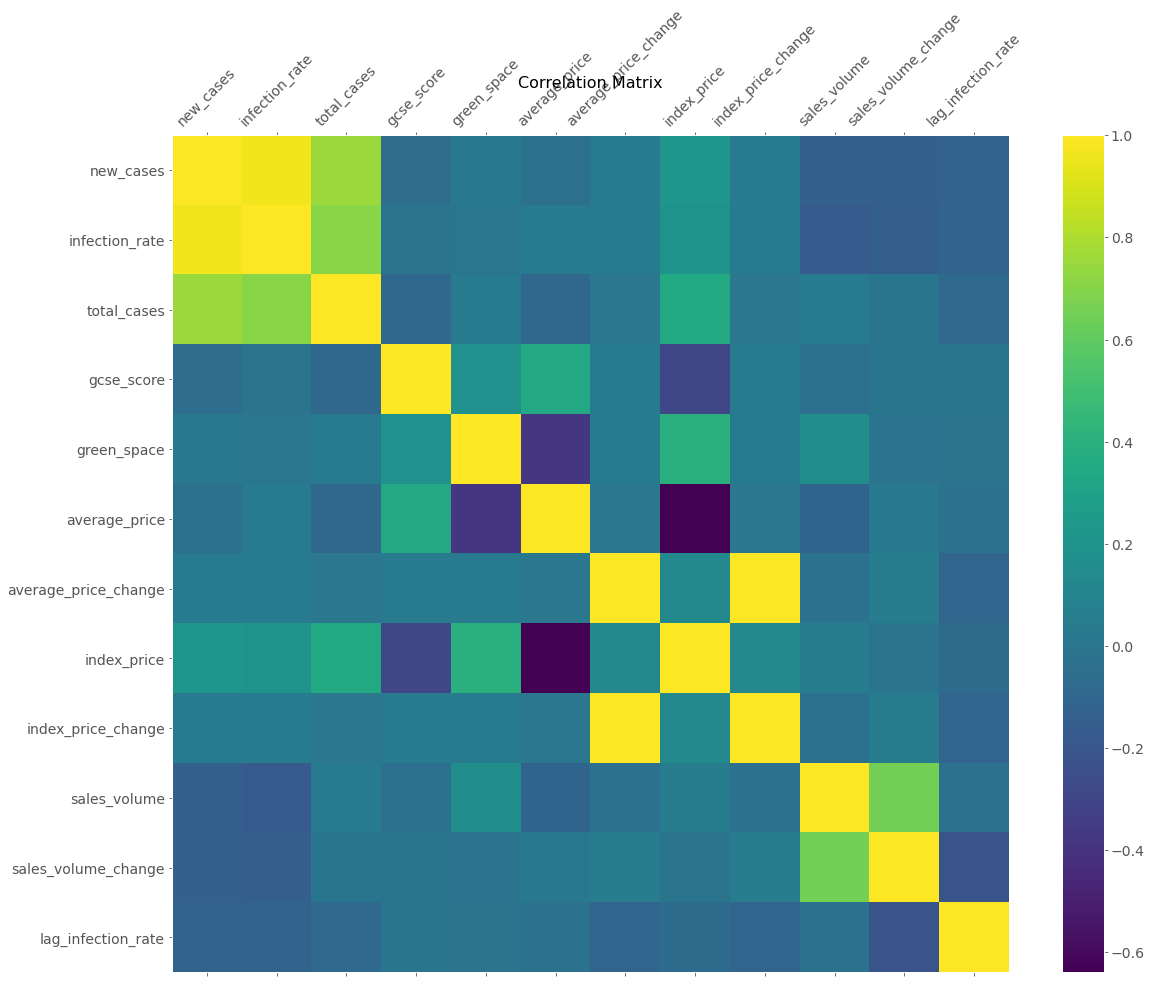

In [98]:
plt.rcParams["axes.grid"] = False
f = plt.figure(figsize=(19, 15))
plt.matshow(df2.corr(), fignum=f.number)
plt.xticks(range(df2.shape[1]), df2.columns, fontsize=14, rotation=45)
plt.yticks(range(df2.shape[1]), df2.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)

plt.title('Correlation Matrix', fontsize=16)

#### Creating Dummy Varibles

In [99]:
df['year_index']=df.year.map({'2020':1,'2021':2,'2022':3})
df['area_index']=df.area_id.map({'E09000002':2,'E09000003':2,'E09000004':2,'E09000005':2,'E09000006':2,'E09000007':1,'E09000008':2,'E09000009':2
                              ,'E09000010':2,'E09000011':1,'E09000012':1,'E09000013':1,'E09000014':2,'E09000015':2,'E09000016':2,'E09000017':2
                             ,'E09000018':2,'E09000019':1,'E09000020':1,'E09000021':2,'E09000022':1,'E09000023':1,'E09000024':2,'E09000025':2
                             ,'E09000026':2,'E09000027':2,'E09000028':1,'E09000029':2,'E09000030':1,'E09000031':2,'E09000032':1,'E09000033':1
                             })
df.head()

,Time,year,month,new_cases,area,area_id,infection_rate,total_cases,gcse_score,green_space,average_price,average_price_change,index_price,index_price_change,sales_volume,sales_volume_change,lag_infection_rate,year_index,area_index
3,2020/05,2020,05,118,Barking & Dagenham,E09000002,0.5391,666,49.7000,33.6000,"293,816.0000",0.0007,133.5000,0.0007,48.0000,0.0213,0.0000,1,2.0000
4,2020/06,2020,06,38,Barking & Dagenham,E09000002,0.1736,704,49.7000,33.6000,"300,526.0000",0.0228,136.6000,0.0232,91.0000,0.8958,0.7583,1,2.0000
5,2020/07,2020,07,58,Barking & Dagenham,E09000002,0.2650,762,49.7000,33.6000,"304,556.0000",0.0134,138.4000,0.0132,86.0000,-0.0549,1.7451,1,2.0000
6,2020/08,2020,08,120,Barking & Dagenham,E09000002,0.5482,882,49.7000,33.6000,"304,924.0000",0.0012,138.6000,0.0014,103.0000,0.1977,0.5391,1,2.0000
7,2020/09,2020,09,413,Barking & Dagenham,E09000002,1.8867,1295,49.7000,33.6000,"301,702.0000",-0.0106,137.1000,-0.0108,119.0000,0.1553,0.1736,1,2.0000


### Regression for Average Price

In [100]:
dataset = df.loc[:,['average_price', 'lag_infection_rate', 'gcse_score','green_space']]
model_data = sm.formula.ols(formula='average_price~lag_infection_rate+gcse_score+green_space+C(year_index)+C(area_index)', data=df).fit()
model_data.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          average_price   R-squared:                       0.577
Model:                            OLS   Adj. R-squared:                  0.564
Method:                 Least Squares   F-statistic:                     43.37
Date:                Mon, 08 Aug 2022   Prob (F-statistic):           4.79e-28
Time:                        22:34:38   Log-Likelihood:                -2024.7
No. Observations:                 165   AIC:                             4061.
Df Residuals:                     159   BIC:                             4080.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept          -5.221e+05    6.6e+04     -7.908      0.000   -6.52e+05   -3.92e+05
C(year_index)[T.2]  2.061e+04   8393.263      2.456      0.015    4033.619    3.72e+04
C(year_index)[T.3]  3.767e+04   2.08e+04      1.811      0.072   -3415.926    7.88e+04
lag_infection_rate   -69.0614    254.811     -0.271      0.787    -572.312     434.190
gcse_score           1.88e+04   1303.752     14.419      0.000    1.62e+04    2.14e+04
green_space        -1558.3397    416.180     -3.744      0.000   -2380.293    -736.386
==============================================================================
Omnibus:                       45.440   Durbin-Watson:                   0.074
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.907
Skew:                          -0.607   Prob(JB):                     0.000129
Kurtosis:                       1.936   Cond. No.                     1.06e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.06e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Splitting data into random training and testing subsets

In [101]:
df_average_price=df2.drop(['average_price_change','index_price','index_price_change','sales_volume','sales_volume_change','new_cases','total_cases','infection_rate'], axis=1)
df_average_price.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 693 entries, 3 to 695
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   gcse_score          693 non-null    float64
 1   green_space         693 non-null    float64
 2   average_price       693 non-null    float64
 3   lag_infection_rate  693 non-null    float64
dtypes: float64(4)
memory usage: 27.1 KB


In [102]:
random_state_split = 100
train_x, test_x, train_y, test_y = train_test_split(df_average_price.drop(['average_price'], axis = 1), df_average_price.average_price, random_state=random_state_split)

In [103]:
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

print(train_x.index.identical(train_y.index))
print(test_x.index.identical(test_y.index))

(519, 3)
(519,)
(174, 3)
(174,)
True
True


#### Variance Inflation Factor(VIF)

In [104]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from statsmodels.tools.tools import add_constant

def drop_column_using_vif_(df_average_price, list_var_not_to_remove=None, thresh=5):
    '''
    Calculates VIF each feature in a pandas dataframe, and repeatedly drop the columns with the highest VIF
    A constant must be added to variance_inflation_factor or the results will be incorrect

    :param df_average_price: the pandas dataframe containing only the predictor features, not the response variable
    :param list_var_not_to_remove: the list of variables that should not be removed even though it has a high VIF. For example, dummy (or indicator) variables represent a categorical variable with three or more categories.
    :param thresh: the max VIF value before the feature is removed from the dataframe
    :return: dataframe with multicollinear features removed
    '''
    while True:
        # adding a constatnt item to the data
        df_average_price_with_const = add_constant(df_average_price)

        vif_df_average_price = pd.Series([variance_inflation_factor(df_average_price_with_const.values, i) 
               for i in range(df_average_price_with_const.shape[1])], name= "VIF",
              index=df_average_price_with_const.columns).to_frame()

        # drop the const as const should not be removed
        vif_df_average_price = vif_df_average_price.drop('const')
        
        # drop the variables that should not be removed
        if list_var_not_to_remove is not None:
            vif_df_average_price = vif_df_average_price.drop(list_var_not_to_remove)
            
        print('Max VIF:', vif_df_average_price.VIF.max())
        
        # if the largest VIF is above the thresh, remove a variable with the largest VIF
        if vif_df_average_price.VIF.max() > thresh:
            # If there are multiple variables with the maximum VIF, choose the first one
            index_to_drop = vif_df_average_price.index[vif_df_average_price.VIF == vif_df_average_price.VIF.max()].tolist()[0]
            print('Dropping: {}'.format(index_to_drop))
            df_average_price = df_average_price.drop(columns = index_to_drop)
        else:
            # No VIF is above threshold. Exit the loop
            break

    return df_average_price

train_x_VIF = drop_column_using_vif_(train_x, thresh=10)
print("The columns remaining after VIF selection are:")
print(train_x_VIF.columns)

Max VIF: 1.035096510852538
The columns remaining after VIF selection are:
Index(['gcse_score', 'green_space', 'lag_infection_rate'], dtype='object')


#### Linear regression model

In [105]:
lr = LinearRegression()
lr.fit(X=train_x_VIF, y=train_y)

LinearRegression()

In [106]:
print('Constant term: ', lr.intercept_)
df_coef_lr_VIF = pd.DataFrame({"var": train_x_VIF.columns.values, "coef":lr.coef_})
print(df_coef_lr_VIF)

Constant term:  -630530.8993859924
                  var                                     coef
0          gcse_score                              25,948.9386
1         green_space                              -7,224.3556
2  lag_infection_rate                                 -39.1712


In [107]:
print('R2:')
lr.score(X=train_x_VIF, y=train_y)

R2:


0.3421291379568855

In [108]:
regressor_OLS = sm.OLS(endog=train_y, exog=sm.add_constant(train_x_VIF)).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          average_price   R-squared:                       0.342
Model:                            OLS   Adj. R-squared:                  0.338
Method:                 Least Squares   F-statistic:                     89.28
Date:                Mon, 08 Aug 2022   Prob (F-statistic):           1.58e-46
Time:                        22:34:38   Log-Likelihood:                -6938.6
No. Observations:                 519   AIC:                         1.389e+04
Df Residuals:                     515   BIC:                         1.390e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -6.305e+05   1.09e+05     -5.802      0.000   -8.44e+05   -4.17e+05
gcse_score          2.595e+04   2077.132     12.493      0.000    2.19e+04       3e+04
green_space        -7224.3556    569.373    -12.688      0.000   -8342.936   -6105.775
lag_infection_rate   -39.1712    394.149     -0.099      0.921    -813.508     735.166
==============================================================================
Omnibus:                      198.015   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              924.319
Skew:                           1.648   Prob(JB):                    1.93e-201
Kurtosis:                       8.646   Cond. No.                     1.01e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.01e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [109]:
# select the same columns from test_x as train_x_VIF
test_x_VIF = test_x[train_x_VIF.columns]

# using the model.score function to get the R2 on the testing data
lr.score(X=test_x_VIF, y=test_y)

0.2673763762864515

#### Lasso

In [110]:
lasso_model = sklearn.linear_model.Lasso(max_iter=10e7, normalize=True)
lasso_model.fit(X=train_x, y=train_y)

Lasso(max_iter=100000000.0, normalize=True)

In [111]:
lasso_model.score(X=train_x, y=train_y)

0.3421290891102834

In [112]:
df_coef_lasso = pd.DataFrame({"var": train_x.columns.values, "coef":lasso_model.coef_})
print(df_coef_lasso)

                  var                                     coef
0          gcse_score                              25,940.6134
1         green_space                              -7,222.0771
2  lag_infection_rate                                 -37.8705


(-1.25, 4.25, -94146.4635454449, 53893.56204724364)

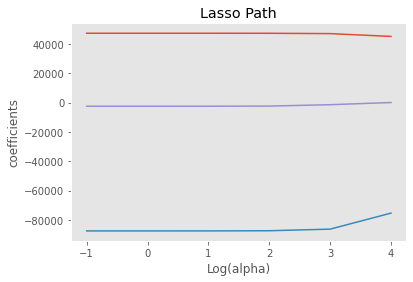

In [113]:
from itertools import cycle
from sklearn.linear_model import lasso_path

train_x_standard = train_x/train_x.std(axis=0)
list_alphas = [.1, .5, 1, 10, 100, 1000, 10000]

# alphas_lasso, coefs_lasso, _ = lasso_path(predictors_bike_rental, response_bike_rental, alphas = [.1, .5, 1, 10, 100], fit_intercept=False)
alphas_lasso, coefs_lasso, _ = lasso_path(train_x_standard, train_y.values.reshape(-1),alphas = list_alphas, fit_intercept=False)
# print(alphas_lasso.shape)
# print(coefs_lasso.shape)

log_alphas_lasso = np.log10(alphas_lasso)
for coef_l in coefs_lasso:
    l1 = plt.plot(log_alphas_lasso, coef_l)

plt.xlabel('Log(alpha)')
plt.ylabel('coefficients')
plt.title('Lasso Path')
plt.axis('tight')

In [114]:
print(lasso_model.score(test_x, test_y))

0.2674132971156141


#### Regression Tree

In [115]:
from sklearn.tree import DecisionTreeRegressor
reg_tree = DecisionTreeRegressor(random_state=0)
# if you don't remember the meaning of random_state, check out the lastest clustering workshop on Moodle
reg_tree.fit(train_x, train_y)

DecisionTreeRegressor(random_state=0)

In [116]:
print("R2 on the training data:")
print(reg_tree.score(X=train_x, y=train_y))
print("R2 on the testing data:")
print(reg_tree.score(X=test_x, y=test_y))

R2 on the training data:
0.9998606913667003
R2 on the testing data:
0.9683547262052489


In [117]:
from sklearn.metrics import mean_squared_error
print("RMSE on the training data:")
print(mean_squared_error(train_y, reg_tree.predict(train_x), squared=False))
print("RMSE on the testing data:")
print(mean_squared_error(test_y, reg_tree.predict(test_x), squared=False))

RMSE on the training data:
2253.3345404222005
RMSE on the testing data:
30661.8550145133


In [118]:
print("Depth of the regression tree: {}".format(reg_tree.get_depth()))
print("Number of nodes of this tree: {}".format(reg_tree.get_n_leaves()))

Depth of the regression tree: 17
Number of nodes of this tree: 517


                                                 Importance
Feature                                                    
green_space                                          1.0631
gcse_score                                           0.8857
lag_infection_rate                                   0.0034


D:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.ensemble.forest module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)


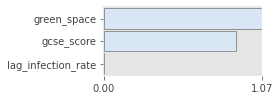

In [119]:
import rfpimp
imp = rfpimp.importances(reg_tree, test_x, test_y) # permutation
print(imp)
viz = rfpimp.plot_importances(imp)
viz.view()

#### Model comparison

In [120]:
# create a list of models
list_name_models = ['LR_VIF', 'LR_LASSO', 'CART']
# use the models from above
list_reg_models = [lr, lasso_model, reg_tree]

dict_models = dict()

for name, model in zip(list_name_models, list_reg_models):
    if name == 'LR_VIF':
        dict_models[name] = [model.score(train_x_VIF, train_y), model.score(test_x_VIF, test_y)]
    else:
        dict_models[name] = [model.score(train_x, train_y), model.score(test_x, test_y)]

# transform dict_models to dataframe
df_models = pd.DataFrame.from_dict(dict_models, orient='index', columns=['R2_train_data', 'R2_test_data'])
print(df_models)

                                    R2_train_data  \
LR_VIF                                     0.3421   
LR_LASSO                                   0.3421   
CART                                       0.9999   

                                     R2_test_data  
LR_VIF                                     0.2674  
LR_LASSO                                   0.2674  
CART                                       0.9684  


### Regression for Index Price

In [121]:
dataset = df.loc[:,['index_price', 'lag_infection_rate', 'gcse_score','green_space']]
model_data = sm.formula.ols(formula='index_price~lag_infection_rate+gcse_score+green_space+C(year_index)+C(area_index)', data=df).fit()
model_data.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            index_price   R-squared:                       0.541
Model:                            OLS   Adj. R-squared:                  0.526
Method:                 Least Squares   F-statistic:                     37.41
Date:                Mon, 08 Aug 2022   Prob (F-statistic):           3.11e-25
Time:                        22:34:39   Log-Likelihood:                -551.89
No. Observations:                 165   AIC:                             1116.
Df Residuals:                     159   BIC:                             1134.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept            222.8183      8.771     25.405      0.000     205.496     240.141
C(year_index)[T.2]     6.9442      1.115      6.227      0.000       4.742       9.147
C(year_index)[T.3]    12.2446      2.764      4.430      0.000       6.786      17.703
lag_infection_rate    -0.0520      0.034     -1.536      0.126      -0.119       0.015
gcse_score            -1.9023      0.173    -10.982      0.000      -2.244      -1.560
green_space            0.0583      0.055      1.054      0.293      -0.051       0.168
==============================================================================
Omnibus:                       25.175   Durbin-Watson:                   0.206
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                9.036
Skew:                           0.313   Prob(JB):                       0.0109
Kurtosis:                       2.040   Cond. No.                     1.06e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.06e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Splitting data into random training and testing subsets

In [122]:
df_index_price=df2.drop(['average_price_change','average_price','index_price_change','sales_volume','sales_volume_change','new_cases','total_cases','infection_rate'], axis=1)
df_index_price.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 693 entries, 3 to 695
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   gcse_score          693 non-null    float64
 1   green_space         693 non-null    float64
 2   index_price         693 non-null    float64
 3   lag_infection_rate  693 non-null    float64
dtypes: float64(4)
memory usage: 27.1 KB


In [123]:
random_state_split = 100
train_x, test_x, train_y, test_y = train_test_split(df_index_price.drop(['index_price'], axis = 1), df_index_price.index_price, random_state=random_state_split)

In [124]:
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

print(train_x.index.identical(train_y.index))
print(test_x.index.identical(test_y.index))

(519, 3)
(519,)
(174, 3)
(174,)
True
True


#### Variance Inflation Factor(VIF)

In [125]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from statsmodels.tools.tools import add_constant

def drop_column_using_vif_(df_index_price, list_var_not_to_remove=None, thresh=5):
    '''
    Calculates VIF each feature in a pandas dataframe, and repeatedly drop the columns with the highest VIF
    A constant must be added to variance_inflation_factor or the results will be incorrect

    :param df_index_price: the pandas dataframe containing only the predictor features, not the response variable
    :param list_var_not_to_remove: the list of variables that should not be removed even though it has a high VIF. For example, dummy (or indicator) variables represent a categorical variable with three or more categories.
    :param thresh: the max VIF value before the feature is removed from the dataframe
    :return: dataframe with multicollinear features removed
    '''
    while True:
        # adding a constatnt item to the data
        df_index_price_with_const = add_constant(df_index_price)

        vif_df_index_price = pd.Series([variance_inflation_factor(df_index_price_with_const.values, i) 
               for i in range(df_index_price_with_const.shape[1])], name= "VIF",
              index=df_index_price_with_const.columns).to_frame()

        # drop the const as const should not be removed
        vif_df_index_price = vif_df_index_price.drop('const')
        
        # drop the variables that should not be removed
        if list_var_not_to_remove is not None:
            vif_df_index_price = vif_df_index_price.drop(list_var_not_to_remove)
            
        print('Max VIF:', vif_df_index_price.VIF.max())
        
        # if the largest VIF is above the thresh, remove a variable with the largest VIF
        if vif_df_index_price.VIF.max() > thresh:
            # If there are multiple variables with the maximum VIF, choose the first one
            index_to_drop = vif_df_index_price.index[vif_df_index_price.VIF == vif_df_index_price.VIF.max()].tolist()[0]
            print('Dropping: {}'.format(index_to_drop))
            df_index_price = df_index_price.drop(columns = index_to_drop)
        else:
            # No VIF is above threshold. Exit the loop
            break

    return df_index_price

train_x_VIF = drop_column_using_vif_(train_x, thresh=10)
print("The columns remaining after VIF selection are:")
print(train_x_VIF.columns)

Max VIF: 1.035096510852538
The columns remaining after VIF selection are:
Index(['gcse_score', 'green_space', 'lag_infection_rate'], dtype='object')


#### Linear regression model

In [126]:
lr = LinearRegression()
lr.fit(X=train_x_VIF, y=train_y)

LinearRegression()

In [127]:
print('Constant term: ', lr.intercept_)
df_coef_lr_VIF = pd.DataFrame({"var": train_x_VIF.columns.values, "coef":lr.coef_})
print(df_coef_lr_VIF)

Constant term:  179.69946202731424
                  var                                     coef
0          gcse_score                                  -1.3083
1         green_space                                   0.4441
2  lag_infection_rate                                  -0.0468


In [128]:
print('R2:')
lr.score(X=train_x_VIF, y=train_y)

R2:


0.31489436691591155

In [129]:
regressor_OLS = sm.OLS(endog=train_y, exog=sm.add_constant(train_x_VIF)).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            index_price   R-squared:                       0.315
Model:                            OLS   Adj. R-squared:                  0.311
Method:                 Least Squares   F-statistic:                     78.90
Date:                Mon, 08 Aug 2022   Prob (F-statistic):           5.21e-42
Time:                        22:34:39   Log-Likelihood:                -1897.4
No. Observations:                 519   AIC:                             3803.
Df Residuals:                     515   BIC:                             3820.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                179.6995      6.573     27.341      0.000     166.787     192.612
gcse_score            -1.3083      0.126    -10.415      0.000      -1.555      -1.062
green_space            0.4441      0.034     12.898      0.000       0.376       0.512
lag_infection_rate    -0.0468      0.024     -1.964      0.050      -0.094    1.04e-05
==============================================================================
Omnibus:                       19.848   Durbin-Watson:                   1.864
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.044
Skew:                           0.476   Prob(JB):                     2.69e-05
Kurtosis:                       2.739   Cond. No.                     1.01e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.01e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [130]:
# select the same columns from test_x as train_x_VIF
test_x_VIF = test_x[train_x_VIF.columns]

# using the model.score function to get the R2 on the testing data
lr.score(X=test_x_VIF, y=test_y)

0.24615815254171736

#### Lasso

In [131]:
lasso_model = sklearn.linear_model.Lasso(max_iter=10e7, normalize=True)
lasso_model.fit(X=train_x, y=train_y)

Lasso(max_iter=100000000.0, normalize=True)

In [132]:
lasso_model.score(X=train_x, y=train_y)

0.0

In [133]:
df_coef_lasso = pd.DataFrame({"var": train_x.columns.values, "coef":lasso_model.coef_})
print(df_coef_lasso)

                  var                                     coef
0          gcse_score                                  -0.0000
1         green_space                                   0.0000
2  lag_infection_rate                                  -0.0000


(-1.25, 4.25, -0.5775736131621464, 8.13023456201479)

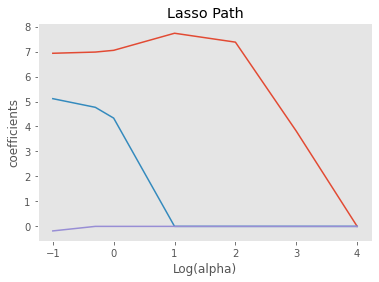

In [134]:
from itertools import cycle
from sklearn.linear_model import lasso_path

train_x_standard = train_x/train_x.std(axis=0)
list_alphas = [.1, .5, 1, 10, 100, 1000, 10000]

# alphas_lasso, coefs_lasso, _ = lasso_path(predictors_bike_rental, response_bike_rental, alphas = [.1, .5, 1, 10, 100], fit_intercept=False)
alphas_lasso, coefs_lasso, _ = lasso_path(train_x_standard, train_y.values.reshape(-1),alphas = list_alphas, fit_intercept=False)
# print(alphas_lasso.shape)
# print(coefs_lasso.shape)

log_alphas_lasso = np.log10(alphas_lasso)
for coef_l in coefs_lasso:
    l1 = plt.plot(log_alphas_lasso, coef_l)

plt.xlabel('Log(alpha)')
plt.ylabel('coefficients')
plt.title('Lasso Path')
plt.axis('tight')

In [135]:
print(lasso_model.score(test_x, test_y))

-0.039495377721828095


### Regression Tree

In [136]:
from sklearn.tree import DecisionTreeRegressor
reg_tree = DecisionTreeRegressor(random_state=0)
# if you don't remember the meaning of random_state, check out the lastest clustering workshop on Moodle
reg_tree.fit(train_x, train_y)

DecisionTreeRegressor(random_state=0)

In [137]:
print("R2 on the training data:")
print(reg_tree.score(X=train_x, y=train_y))
print("R2 on the testing data:")
print(reg_tree.score(X=test_x, y=test_y))

R2 on the training data:
0.9988671276926884
R2 on the testing data:
0.728238584382483


In [138]:
from sklearn.metrics import mean_squared_error
print("RMSE on the training data:")
print(mean_squared_error(train_y, reg_tree.predict(train_x), squared=False))
print("RMSE on the testing data:")
print(mean_squared_error(test_y, reg_tree.predict(test_x), squared=False))

RMSE on the training data:
0.3808139543435037
RMSE on the testing data:
5.507077473474528


In [139]:
from sklearn.metrics import mean_squared_error
print("RMSE on the training data:")
print(mean_squared_error(train_y, reg_tree.predict(train_x), squared=False))
print("RMSE on the testing data:")
print(mean_squared_error(test_y, reg_tree.predict(test_x), squared=False))

RMSE on the training data:
0.3808139543435037
RMSE on the testing data:
5.507077473474528


In [140]:
print("Depth of the regression tree: {}".format(reg_tree.get_depth()))
print("Number of nodes of this tree: {}".format(reg_tree.get_n_leaves()))

Depth of the regression tree: 19
Number of nodes of this tree: 512


                                                 Importance
Feature                                                    
green_space                                          1.8244
gcse_score                                           0.7268
lag_infection_rate                                   0.0209


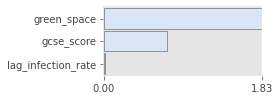

In [141]:
import rfpimp
imp = rfpimp.importances(reg_tree, test_x, test_y) # permutation
print(imp)
viz = rfpimp.plot_importances(imp)
viz.view()

In [142]:
# create a list of models
list_name_models = ['LR_VIF', 'LR_LASSO', 'CART']
# use the models from above
list_reg_models = [lr, lasso_model, reg_tree]

dict_models = dict()

for name, model in zip(list_name_models, list_reg_models):
    if name == 'LR_VIF':
        dict_models[name] = [model.score(train_x_VIF, train_y), model.score(test_x_VIF, test_y)]
    else:
        dict_models[name] = [model.score(train_x, train_y), model.score(test_x, test_y)]

# transform dict_models to dataframe
df_models = pd.DataFrame.from_dict(dict_models, orient='index', columns=['R2_train_data', 'R2_test_data'])
print(df_models)

                                    R2_train_data  \
LR_VIF                                     0.3149   
LR_LASSO                                   0.0000   
CART                                       0.9989   

                                     R2_test_data  
LR_VIF                                     0.2462  
LR_LASSO                                  -0.0395  
CART                                       0.7282  


### Regression for Sales Volume

In [143]:
dataset = df.loc[:,['sales_volume', 'lag_infection_rate', 'gcse_score','green_space']]
model_data = sm.formula.ols(formula='sales_volume~lag_infection_rate+gcse_score+green_space+C(year_index)+C(area_index)', data=df).fit()
model_data.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           sales_volume   R-squared:                       0.205
Model:                            OLS   Adj. R-squared:                  0.180
Method:                 Least Squares   F-statistic:                     8.196
Date:                Mon, 08 Aug 2022   Prob (F-statistic):           6.58e-07
Time:                        22:34:40   Log-Likelihood:                -1081.1
No. Observations:                 165   AIC:                             2174.
Df Residuals:                     159   BIC:                             2193.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             45.3341    216.770      0.209      0.835    -382.785     473.453
C(year_index)[T.2]    91.9983     27.561      3.338      0.001      37.566     146.431
C(year_index)[T.3]   -94.6835     68.310     -1.386      0.168    -229.595      40.228
lag_infection_rate     0.0570      0.837      0.068      0.946      -1.596       1.710
gcse_score            -1.1341      4.281     -0.265      0.791      -9.589       7.321
green_space            6.5174      1.367      4.769      0.000       3.818       9.216
==============================================================================
Omnibus:                       84.623   Durbin-Watson:                   1.925
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              368.930
Skew:                           1.955   Prob(JB):                     7.72e-81
Kurtosis:                       9.195   Cond. No.                     1.06e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.06e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Splitting data into random training and testing subsets

In [144]:
df_sales_volume=df2.drop(['average_price_change','index_price','index_price_change','average_price','sales_volume_change','new_cases','total_cases','infection_rate'], axis=1)
df_sales_volume.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 693 entries, 3 to 695
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   gcse_score          693 non-null    float64
 1   green_space         693 non-null    float64
 2   sales_volume        693 non-null    float64
 3   lag_infection_rate  693 non-null    float64
dtypes: float64(4)
memory usage: 27.1 KB


In [145]:
random_state_split = 100
train_x, test_x, train_y, test_y = train_test_split(df_sales_volume.drop(['sales_volume'], axis = 1), df_sales_volume.sales_volume, random_state=random_state_split)

In [146]:
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

print(train_x.index.identical(train_y.index))
print(test_x.index.identical(test_y.index))

(519, 3)
(519,)
(174, 3)
(174,)
True
True


#### Variance Inflation Factor(VIF)

In [147]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from statsmodels.tools.tools import add_constant

def drop_column_using_vif_(df_sales_volume, list_var_not_to_remove=None, thresh=5):
    '''
    Calculates VIF each feature in a pandas dataframe, and repeatedly drop the columns with the highest VIF
    A constant must be added to variance_inflation_factor or the results will be incorrect

    :param df_sales_volume: the pandas dataframe containing only the predictor features, not the response variable
    :param list_var_not_to_remove: the list of variables that should not be removed even though it has a high VIF. For example, dummy (or indicator) variables represent a categorical variable with three or more categories.
    :param thresh: the max VIF value before the feature is removed from the dataframe
    :return: dataframe with multicollinear features removed
    '''
    while True:
        # adding a constatnt item to the data
        df_sales_volume_with_const = add_constant(df_sales_volume)

        vif_df_sales_volume = pd.Series([variance_inflation_factor(df_sales_volume_with_const.values, i) 
               for i in range(df_sales_volume_with_const.shape[1])], name= "VIF",
              index=df_sales_volume_with_const.columns).to_frame()

        # drop the const as const should not be removed
        vif_df_sales_volume = vif_df_sales_volume.drop('const')
        
        # drop the variables that should not be removed
        if list_var_not_to_remove is not None:
            vif_df_sales_volume = vif_df_sales_volume.drop(list_var_not_to_remove)
            
        print('Max VIF:', vif_df_sales_volume.VIF.max())
        
        # if the largest VIF is above the thresh, remove a variable with the largest VIF
        if vif_df_sales_volume.VIF.max() > thresh:
            # If there are multiple variables with the maximum VIF, choose the first one
            index_to_drop = vif_df_sales_volume.index[vif_df_sales_volume.VIF == vif_df_sales_volume.VIF.max()].tolist()[0]
            print('Dropping: {}'.format(index_to_drop))
            df_sales_volume = df_sales_volume.drop(columns = index_to_drop)
        else:
            # No VIF is above threshold. Exit the loop
            break

    return df_sales_volume

train_x_VIF = drop_column_using_vif_(train_x, thresh=10)
print("The columns remaining after VIF selection are:")
print(train_x_VIF.columns)

Max VIF: 1.035096510852538
The columns remaining after VIF selection are:
Index(['gcse_score', 'green_space', 'lag_infection_rate'], dtype='object')


#### Linear regression model

In [148]:
lr = LinearRegression()
lr.fit(X=train_x_VIF, y=train_y)

LinearRegression()

In [149]:
print('Constant term: ', lr.intercept_)
df_coef_lr_VIF = pd.DataFrame({"var": train_x_VIF.columns.values, "coef":lr.coef_})
print(df_coef_lr_VIF)

Constant term:  358.5484053930832
                  var                                     coef
0          gcse_score                                  -3.6333
1         green_space                                   1.8152
2  lag_infection_rate                                  -0.1783


In [150]:
print('R2:')
lr.score(X=train_x_VIF, y=train_y)

R2:


0.021510440538859754

In [151]:
regressor_OLS = sm.OLS(endog=train_y, exog=sm.add_constant(train_x_VIF)).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           sales_volume   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     3.774
Date:                Mon, 08 Aug 2022   Prob (F-statistic):             0.0106
Time:                        22:34:40   Log-Likelihood:                -3363.0
No. Observations:                 519   AIC:                             6734.
Df Residuals:                     515   BIC:                             6751.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                358.5484    110.691      3.239      0.001     141.087     576.009
gcse_score            -3.6333      2.116     -1.717      0.087      -7.790       0.523
green_space            1.8152      0.580      3.130      0.002       0.676       2.954
lag_infection_rate    -0.1783      0.401     -0.444      0.657      -0.967       0.610
==============================================================================
Omnibus:                      322.343   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3034.983
Skew:                           2.638   Prob(JB):                         0.00
Kurtosis:                      13.607   Cond. No.                     1.01e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.01e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [152]:
# select the same columns from test_x as train_x_VIF
test_x_VIF = test_x[train_x_VIF.columns]

# using the model.score function to get the R2 on the testing data
lr.score(X=test_x_VIF, y=test_y)

0.05637690221488001

#### Lasso

In [153]:
lasso_model = sklearn.linear_model.Lasso(max_iter=10e7, normalize=True)
lasso_model.fit(X=train_x, y=train_y)

Lasso(max_iter=100000000.0, normalize=True)

In [154]:
lasso_model.score(X=train_x, y=train_y)

0.0

In [155]:
df_coef_lasso = pd.DataFrame({"var": train_x.columns.values, "coef":lasso_model.coef_})
print(df_coef_lasso)

                  var                                     coef
0          gcse_score                                  -0.0000
1         green_space                                   0.0000
2  lag_infection_rate                                  -0.0000


(-1.25, 4.25, -3.1164570474650874, 22.802862330009212)

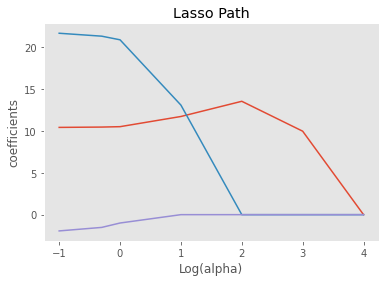

In [156]:
from itertools import cycle
from sklearn.linear_model import lasso_path

train_x_standard = train_x/train_x.std(axis=0)
list_alphas = [.1, .5, 1, 10, 100, 1000, 10000]

# alphas_lasso, coefs_lasso, _ = lasso_path(predictors_bike_rental, response_bike_rental, alphas = [.1, .5, 1, 10, 100], fit_intercept=False)
alphas_lasso, coefs_lasso, _ = lasso_path(train_x_standard, train_y.values.reshape(-1),alphas = list_alphas, fit_intercept=False)
# print(alphas_lasso.shape)
# print(coefs_lasso.shape)

log_alphas_lasso = np.log10(alphas_lasso)
for coef_l in coefs_lasso:
    l1 = plt.plot(log_alphas_lasso, coef_l)

plt.xlabel('Log(alpha)')
plt.ylabel('coefficients')
plt.title('Lasso Path')
plt.axis('tight')

In [157]:
print(lasso_model.score(test_x, test_y))

-0.006907339961518266


#### Regression Tree

In [158]:
from sklearn.tree import DecisionTreeRegressor
reg_tree = DecisionTreeRegressor(random_state=0)
# if you don't remember the meaning of random_state, check out the lastest clustering workshop on Moodle
reg_tree.fit(train_x, train_y)

DecisionTreeRegressor(random_state=0)

In [159]:
print("R2 on the training data:")
print(reg_tree.score(X=train_x, y=train_y))
print("R2 on the testing data:")
print(reg_tree.score(X=test_x, y=test_y))

R2 on the training data:
0.994258835485521
R2 on the testing data:
-0.3494285847392422


In [160]:
from sklearn.metrics import mean_squared_error
print("RMSE on the training data:")
print(mean_squared_error(train_y, reg_tree.predict(train_x), squared=False))
print("RMSE on the testing data:")
print(mean_squared_error(test_y, reg_tree.predict(test_x), squared=False))

RMSE on the training data:
12.080972794476706
RMSE on the testing data:
202.40211200115658


In [161]:
print("Depth of the regression tree: {}".format(reg_tree.get_depth()))
print("Number of nodes of this tree: {}".format(reg_tree.get_n_leaves()))

Depth of the regression tree: 20
Number of nodes of this tree: 513


                                                 Importance
Feature                                                    
gcse_score                                           0.2180
green_space                                          0.1786
lag_infection_rate                                   0.1162


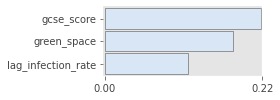

In [162]:
import rfpimp
imp = rfpimp.importances(reg_tree, test_x, test_y) # permutation
print(imp)
viz = rfpimp.plot_importances(imp)
viz.view()

#### Model comparison

In [163]:
# create a list of models
list_name_models = ['LR_VIF', 'LR_LASSO', 'CART']
# use the models from above
list_reg_models = [lr, lasso_model, reg_tree]

dict_models = dict()

for name, model in zip(list_name_models, list_reg_models):
    if name == 'LR_VIF':
        dict_models[name] = [model.score(train_x_VIF, train_y), model.score(test_x_VIF, test_y)]
    else:
        dict_models[name] = [model.score(train_x, train_y), model.score(test_x, test_y)]

# transform dict_models to dataframe
df_models = pd.DataFrame.from_dict(dict_models, orient='index', columns=['R2_train_data', 'R2_test_data'])
print(df_models)

                                    R2_train_data  \
LR_VIF                                     0.0215   
LR_LASSO                                   0.0000   
CART                                       0.9943   

                                     R2_test_data  
LR_VIF                                     0.0564  
LR_LASSO                                  -0.0069  
CART                                      -0.3494  
